# Advance Regression Problem Statement: Part 1

### Modelling house price based on regression with regularization

<a id="intro"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            1. Introduction
            </span>   
        </font>    
</h2>

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Problem Statement
            </span>   
        </font>    
</h3>

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Business Goal
            </span>   
        </font>    
</h3>

- We are required to model the price of houses with the available independent variables.
- This model will then be used by the management to understand how exactly the prices vary with the variables.
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 
- Further, the model will be a good way for management to understand the pricing dynamics of a new market.

<a id="intro"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            2. Setting Up Jupyter Notebbok
            </span>   
        </font>    
</h2>

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Supress Warnings
            </span>   
        </font>    
</h3>

In [7]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Imports Dependencies
            </span>   
        </font>    
</h3>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

from scipy import stats
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline
# setting up plot style 
style.use('seaborn-poster')
style.use('fivethirtyeight')

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Modifying Jupyter Views
            </span>   
        </font>    
</h3>

In [10]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

<a id="import"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            3. Reading & Understanding the data
            </span>   
        </font>    
</h2>

In [150]:
# Reading csv file from the working directory
houseDF = pd.read_csv("train.csv")

In [82]:
houseDF.head() # top 5 rows of the data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [83]:
houseDF.tail() # last 5 rows of the data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            6            5       1999          2000     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA      PConc       Gd       TA           No          Unf           0          Unf           0        953          953    GasA        Ex          Y      SBrkr       953       694             0       1647             0             0         2         1             3             1          TA             7        Typ           1          TA     Attchd       1999.0          RFn           2         460         TA         TA          Y           0           40              0          0            0         0    NaN    NaN         NaN        0       8    2007       WD        Normal     175000
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam     1Story            6            6       1978          1988     Gable  CompShg     Plywood     Plywood      Stone       119.0        TA        TA     CBlock       Gd       TA           No          ALQ         790          Rec         163        589         1542    GasA        TA          Y      SBrkr      2073         0             0       2073             1             0         2         0             3             1          TA             7       Min1           2          TA     Attchd       1978.0          Unf           2         500         TA         TA          Y         349            0              0          0            0         0    NaN  MnPrv         NaN        0       2    2010       WD        Normal     210000
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            9       1941          2006     Gable  CompShg     CemntBd     CmentBd       None         0.0        Ex        Gd      Stone       TA       Gd           No          GLQ         275          Unf           0        877         1152    GasA        Ex          Y      SBrkr      1188      1152             0       2340             0             0         2         0             4             1          Gd             9        Typ           2          Gd     Attchd       1941.0          RFn           1         252         TA         TA          Y           0           60              0          0            0         0    NaN  GdPrv        Shed     2500       5    2010       WD        Normal     266500
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl        NAmes       Norm       Norm     1Fam     1Story            5            6       1950          1996       Hip  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       TA       TA           Mn          GLQ          49          Rec        1029   

In [151]:
# Print data dimension
print(f"Shape of dataframe: {houseDF.shape}")

# Print data size
print(f"Size of dataframe: {houseDF.size}")

Shape of dataframe: (1460, 81)
Size of dataframe: 118260


- Here we have 1460 rows and 81 columns
- Total number of cell in the dataframe is 118260

In [18]:
houseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
# Statistical summary for numeric variabels
houseDF.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.00000

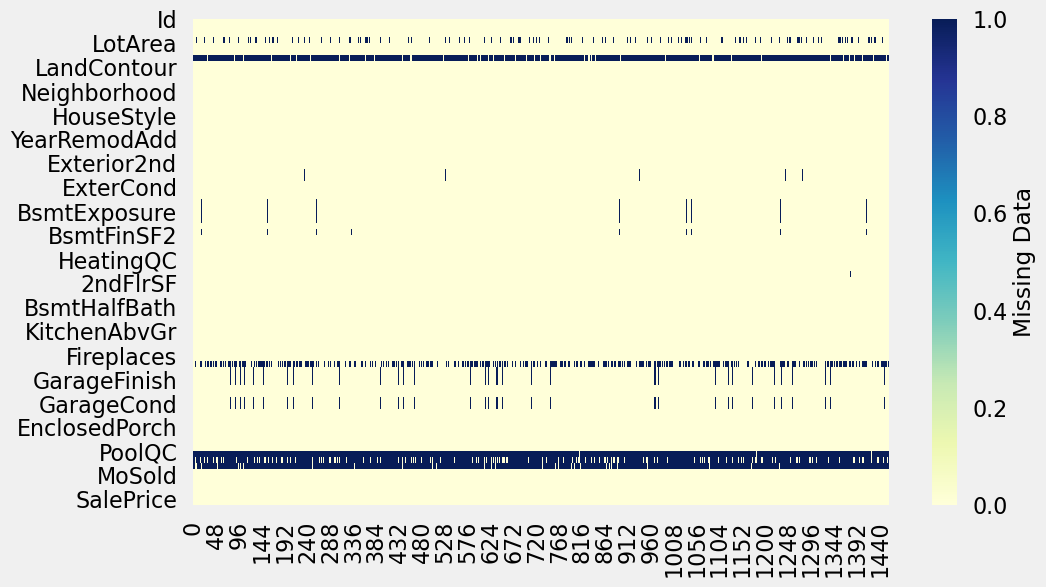

In [23]:
# Visualizing Null Value
plt.figure(figsize=(10,6))
sns.heatmap(houseDF.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.show()

In [20]:
# Checking sum of null values present in each feature
houseDF.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [30]:
# Unique category present in each category
houseDF.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [25]:
# Check for duplicates
houseDF.duplicated().sum()

0

- No duplicates present

<a id="clean"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            4. Data Cleansing & Manipulation
            </span>   
        </font>    
</h2>

- Typecasting the categorical variables as object type based on information in the data dictionary
- Furthermore, we broadly divide all variables into two types 
  - Categorical Variables 
  - Numeric Variables.

In [152]:
print ("shape of dataframe", houseDF.shape)

categorical_variables = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'TotRmsAbvGrd','Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
houseDF[categorical_variables] =  houseDF[categorical_variables].astype('object')
print ("number of categorical variables",len(categorical_variables))

numeric_variables = [col for col in houseDF.columns.to_list() if col not in categorical_variables]
print ("number of numeric variables",len(numeric_variables))

shape of dataframe (1460, 81)
number of categorical variables 47
number of numeric variables 34


In [153]:
# Dropping Id column, as it is not going to contribute in our analysis
houseDF.drop(['Id'], axis=1, inplace=True)

In [154]:
#updating the list numeric_variables
numeric_variables.remove('Id')

In [155]:
temp = houseDF.isnull().sum()    # storing the count of null values in each column in a temporary series
df_missing = temp.to_frame(name="CountofNull") # converting the series to a dataframe 
print ("A view of the variables with atleast 1 null value")
df_missing[df_missing['CountofNull']!=0]

A view of the variables with atleast 1 null value


CountofNull
LotFrontage           259
Alley                1369
MasVnrType              8
MasVnrArea              8
BsmtQual               37
BsmtCond               37
BsmtExposure           38
BsmtFinType1           37
BsmtFinType2           38
Electrical              1
FireplaceQu           690
GarageType             81
GarageYrBlt            81
GarageFinish           81
GarageQual             81
GarageCond             81
PoolQC               1453
Fence                1179
MiscFeature          1406

In [156]:
# Checking the percentage of Null values
df_missing_percent = pd.DataFrame((round(100*(houseDF.isnull().sum()/len(houseDF.index)), 2)), columns=['missing'])
df_missing_percent.sort_values(by=['missing'], ascending=False).head(20)

missing
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtCond         2.53
BsmtQual         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
MSSubClass       0.00

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observation: </b><br>
        Here, we can observe that out of 1460 records, 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', and 'Alley' have almost 50% or more null values. So, we proceed with dropping these columns.
    </span>    
</div>

In [157]:
houseDF = houseDF.drop(['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Alley'],axis=1) 
categorical_variables = [col for col in categorical_variables if col not in ['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Alley']] #updating catagorical variables
print (houseDF.shape)

(1460, 75)


In [158]:
# Checking the percentage of Null values
df_missing_percent = pd.DataFrame((round(100*(houseDF.isnull().sum()/len(houseDF.index)), 2)), columns=['missing'])
df_missing_percent.sort_values(by=['missing'], ascending=False).head(20)

missing
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
KitchenAbvGr     0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
BsmtHalfBath     0.00
BsmtFullBath     0.00

In [159]:
# Putting all the columns with null values in a list
lst_with_null = df_missing[df_missing['CountofNull']!=0].index.to_list() 

# Updating this list to remove the dropped columns
updated_lst_with_null = [ele for ele in lst_with_null if ele not in ['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Alley']]

null_var_data_types = houseDF.dtypes[updated_lst_with_null] 
print ("A view of the data types of the columns which have null values")
null_var_data_types

A view of the data types of the columns which have null values


LotFrontage     float64
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
             Null value imputation
            </span>   
        </font>    
</h3>

In [160]:
# Imputing missing values in the numeric 'LotFrontage' and 'MasVnrArea' columns with the median
houseDF['LotFrontage'].fillna(houseDF['LotFrontage'].median(), inplace=True)
houseDF['MasVnrArea'].fillna(houseDF['MasVnrArea'].median(), inplace=True)

In [161]:
# Imputing missing values in the catagorical columns with the mode
cat_val_null = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in cat_val_null:
    mode_value = houseDF[col].mode().iloc[0]
    houseDF[col].fillna(mode_value, inplace=True)

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
             Deriving Columns
            </span>   
        </font>    
</h3>

In [162]:
# Creating a new column 'HouseAge' which is the difference between 'YrSold' and 'YearBuilt'
houseDF['PropertyAge'] = houseDF['YrSold'] - houseDF['YearBuilt']

# upating the list 'numeric_variables'
numeric_variables.append('PropertyAge')

# Dropping the 'YrSold' and 'YearBuilt' columns as they are no longer needed
houseDF = houseDF.drop(['YrSold', 'YearBuilt'], axis=1)

numeric_variables.remove('YrSold')
numeric_variables.remove('YearBuilt')

# Addiitonally dropping 'GarageYrBlt' column as it is redundant
houseDF = houseDF.drop(['GarageYrBlt'], axis=1)
numeric_variables.remove('GarageYrBlt')

In [163]:
null_counts = houseDF.isnull().sum()
if null_counts.sum() == 0:
    print("No null values in the DataFrame.")
else:
    print("Null values still exist in the DataFrame.")
    print(null_counts)

No null values in the DataFrame.


<a id="clean"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            5. EDA (Exploratory Data Analysis)
            </span>   
        </font>    
</h2>

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
             Univariate, Bivariate and Multivariate Analysis
            </span>   
        </font>    
</h3>

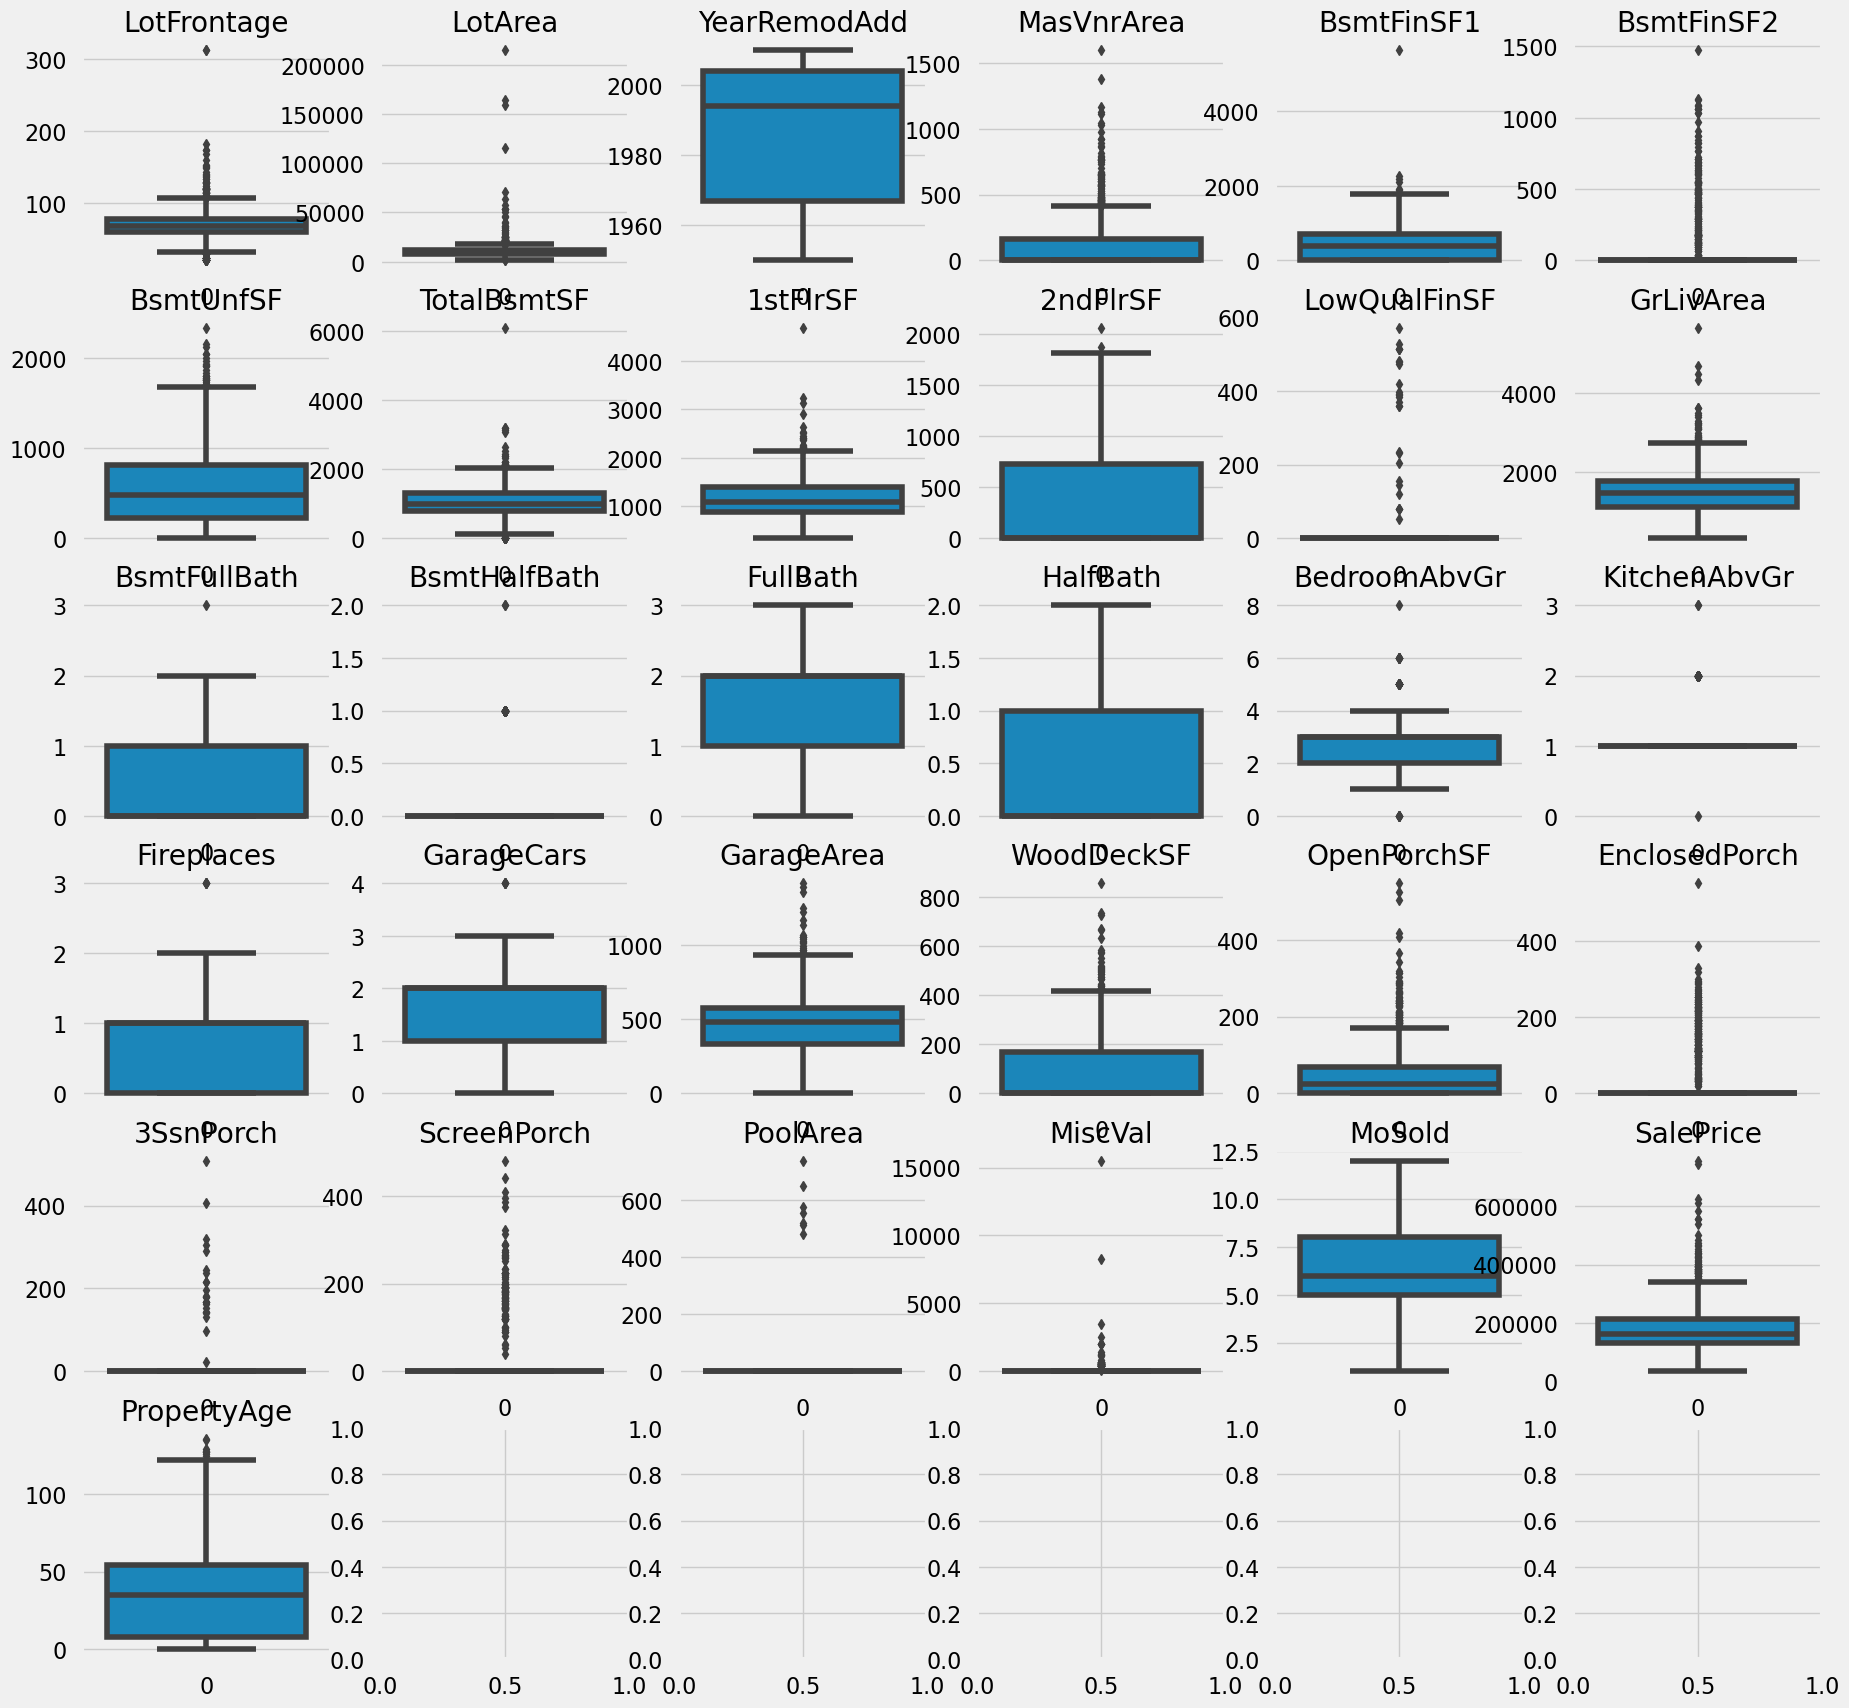

In [106]:
# Visualizing outliers through boxplots

# Setting up the subplots
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 20))

# Looping through the columns and plotting each continuous variable on a boxplot
for i, j in enumerate(numeric_variables):
    row = i // 6
    col = i % 6
    ax = axes[row][col]    
    sns.boxplot(houseDF[j], ax=ax)
    ax.set_title(j)

plt.show()

In [107]:
houseDF.describe()

LotFrontage        LotArea  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr   Fireplaces   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold      SalePrice  PropertyAge
count  1460.000000    1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000    1460.000000  1460.000000
mean     69.863699   10516.828082   1984.865753   103.117123   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575     0.613014     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  180921.195890    36.547945
std      22.027677    9981.264932     20.645407   180.731373   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338     0.644666     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626   79442.502883    30.250152
min      21.000000    1300.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000     0.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000   34900.000000     0.000000
25%      60.000000    7553.500000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000     0.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  129975.000000     8.000000
50%      69.000000    9478.500000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000     1.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  163000.000000    35.000000
75%      79.000000   11601.500000   2004.000000   164.250000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000     1.000000     2.000000   576.000000   168.000000    68.000000       0.000000     0.000000     0.000000     0.000000      0.000000     8.000000  214000.000000    54.000000
max     313.000000  215245.000000   2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  6110.000000  4692.000000  2065.000000    572.000000  5642.000000      3.000000      2.000000     3.000000     2.000000      8.000000      3.000000     3.000000     4.000000  1418.000000   857.000000   547.000000     552.000000   508.000000   480.000000   738.000000  15500.000000    12.000000  755000.000000   136.000000

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observation: </b><br>
        We can see outliers are present but since the dataset provided is already very small, further elimination of data to remove outliers would not be appropriate
    </span>    
</div>

In [109]:
# Checking the percentage of outliers for the numeric columns

for var in numeric_variables:
    # Calculate the IQR for the current variable
    Q1 = houseDF[var].quantile(0.25)
    Q3 = houseDF[var].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the percentiles of outliers for the current variable
    lower_percentile = (houseDF[var] < lower_bound).mean() * 100
    upper_percentile = (houseDF[var] > upper_bound).mean() * 100

    print(f"Percentile of outliers below the lower bound in {var}: {lower_percentile:.2f}%")
    print(f"Percentile of outliers above the upper bound in {var}: {upper_percentile:.2f}%")

Percentile of outliers below the lower bound in LotFrontage: 3.29%
Percentile of outliers above the upper bound in LotFrontage: 3.97%
Percentile of outliers below the lower bound in LotArea: 0.14%
Percentile of outliers above the upper bound in LotArea: 4.59%
Percentile of outliers below the lower bound in YearRemodAdd: 0.00%
Percentile of outliers above the upper bound in YearRemodAdd: 0.00%
Percentile of outliers below the lower bound in MasVnrArea: 0.00%
Percentile of outliers above the upper bound in MasVnrArea: 6.71%
Percentile of outliers below the lower bound in BsmtFinSF1: 0.00%
Percentile of outliers above the upper bound in BsmtFinSF1: 0.48%
Percentile of outliers below the lower bound in BsmtFinSF2: 0.00%
Percentile of outliers above the upper bound in BsmtFinSF2: 11.44%
Percentile of outliers below the lower bound in BsmtUnfSF: 0.00%
Percentile of outliers above the upper bound in BsmtUnfSF: 1.99%
Percentile of outliers below the lower bound in TotalBsmtSF: 2.53%
Percentile

In [110]:
# Checking the percentage of unique values for the numeric columns

for var in numeric_variables:
    unique_counts = houseDF[var].value_counts()
    num_unique_values = len(unique_counts)
    total_data_points = len(houseDF)
    unique_percent = (num_unique_values / total_data_points) * 100

    print(f"Unique values in '{var}': {num_unique_values}, Unique Percentage: {unique_percent:.2f}%")

Unique values in 'LotFrontage': 110, Unique Percentage: 7.53%
Unique values in 'LotArea': 1073, Unique Percentage: 73.49%
Unique values in 'YearRemodAdd': 61, Unique Percentage: 4.18%
Unique values in 'MasVnrArea': 327, Unique Percentage: 22.40%
Unique values in 'BsmtFinSF1': 637, Unique Percentage: 43.63%
Unique values in 'BsmtFinSF2': 144, Unique Percentage: 9.86%
Unique values in 'BsmtUnfSF': 780, Unique Percentage: 53.42%
Unique values in 'TotalBsmtSF': 721, Unique Percentage: 49.38%
Unique values in '1stFlrSF': 753, Unique Percentage: 51.58%
Unique values in '2ndFlrSF': 417, Unique Percentage: 28.56%
Unique values in 'LowQualFinSF': 24, Unique Percentage: 1.64%
Unique values in 'GrLivArea': 861, Unique Percentage: 58.97%
Unique values in 'BsmtFullBath': 4, Unique Percentage: 0.27%
Unique values in 'BsmtHalfBath': 3, Unique Percentage: 0.21%
Unique values in 'FullBath': 4, Unique Percentage: 0.27%
Unique values in 'HalfBath': 3, Unique Percentage: 0.21%
Unique values in 'BedroomAbv

In [ ]:
# Univariate analysis on categorical variables

for var in categorical_variables:
    # Frequency count
    freq_count = houseDF[var].value_counts()
    print(f"Frequency count for {var}:")
    print(freq_count)
    print()
    
    # Bar plot
    plt.figure()
    houseDF[var].value_counts().plot(kind='bar')
    plt.title(f"{var} Distribution")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
# Bivariate analysis
# Scatter plot: numeric vs numeric

for num_var1 in numeric_variables:
    for num_var2 in numeric_variables:
        if num_var1 != num_var2:
            plt.figure()
            sns.scatterplot(data=houseDF, x=num_var1, y=num_var2)
            plt.title(f"Scatter plot: {num_var1} vs {num_var2}")
            plt.show()

- Removed output to reduce the notebook size

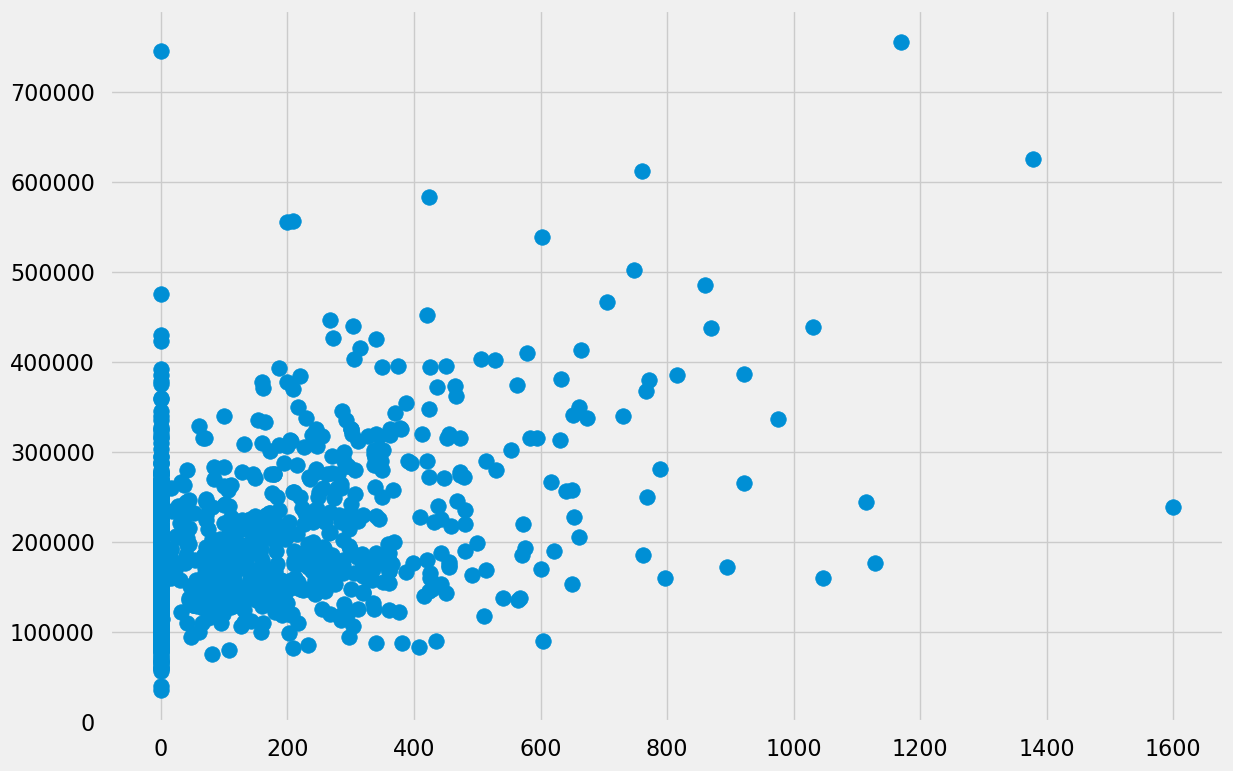

In [49]:
plt.scatter(x=houseDF.MasVnrArea, y=houseDF.SalePrice)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observation: </b><br>
        Based on the distribution we can say that masonry veneer area in square feet is alone not enough to determine the Sale price, other features should be considered for Sale price
    </span>    
</div>

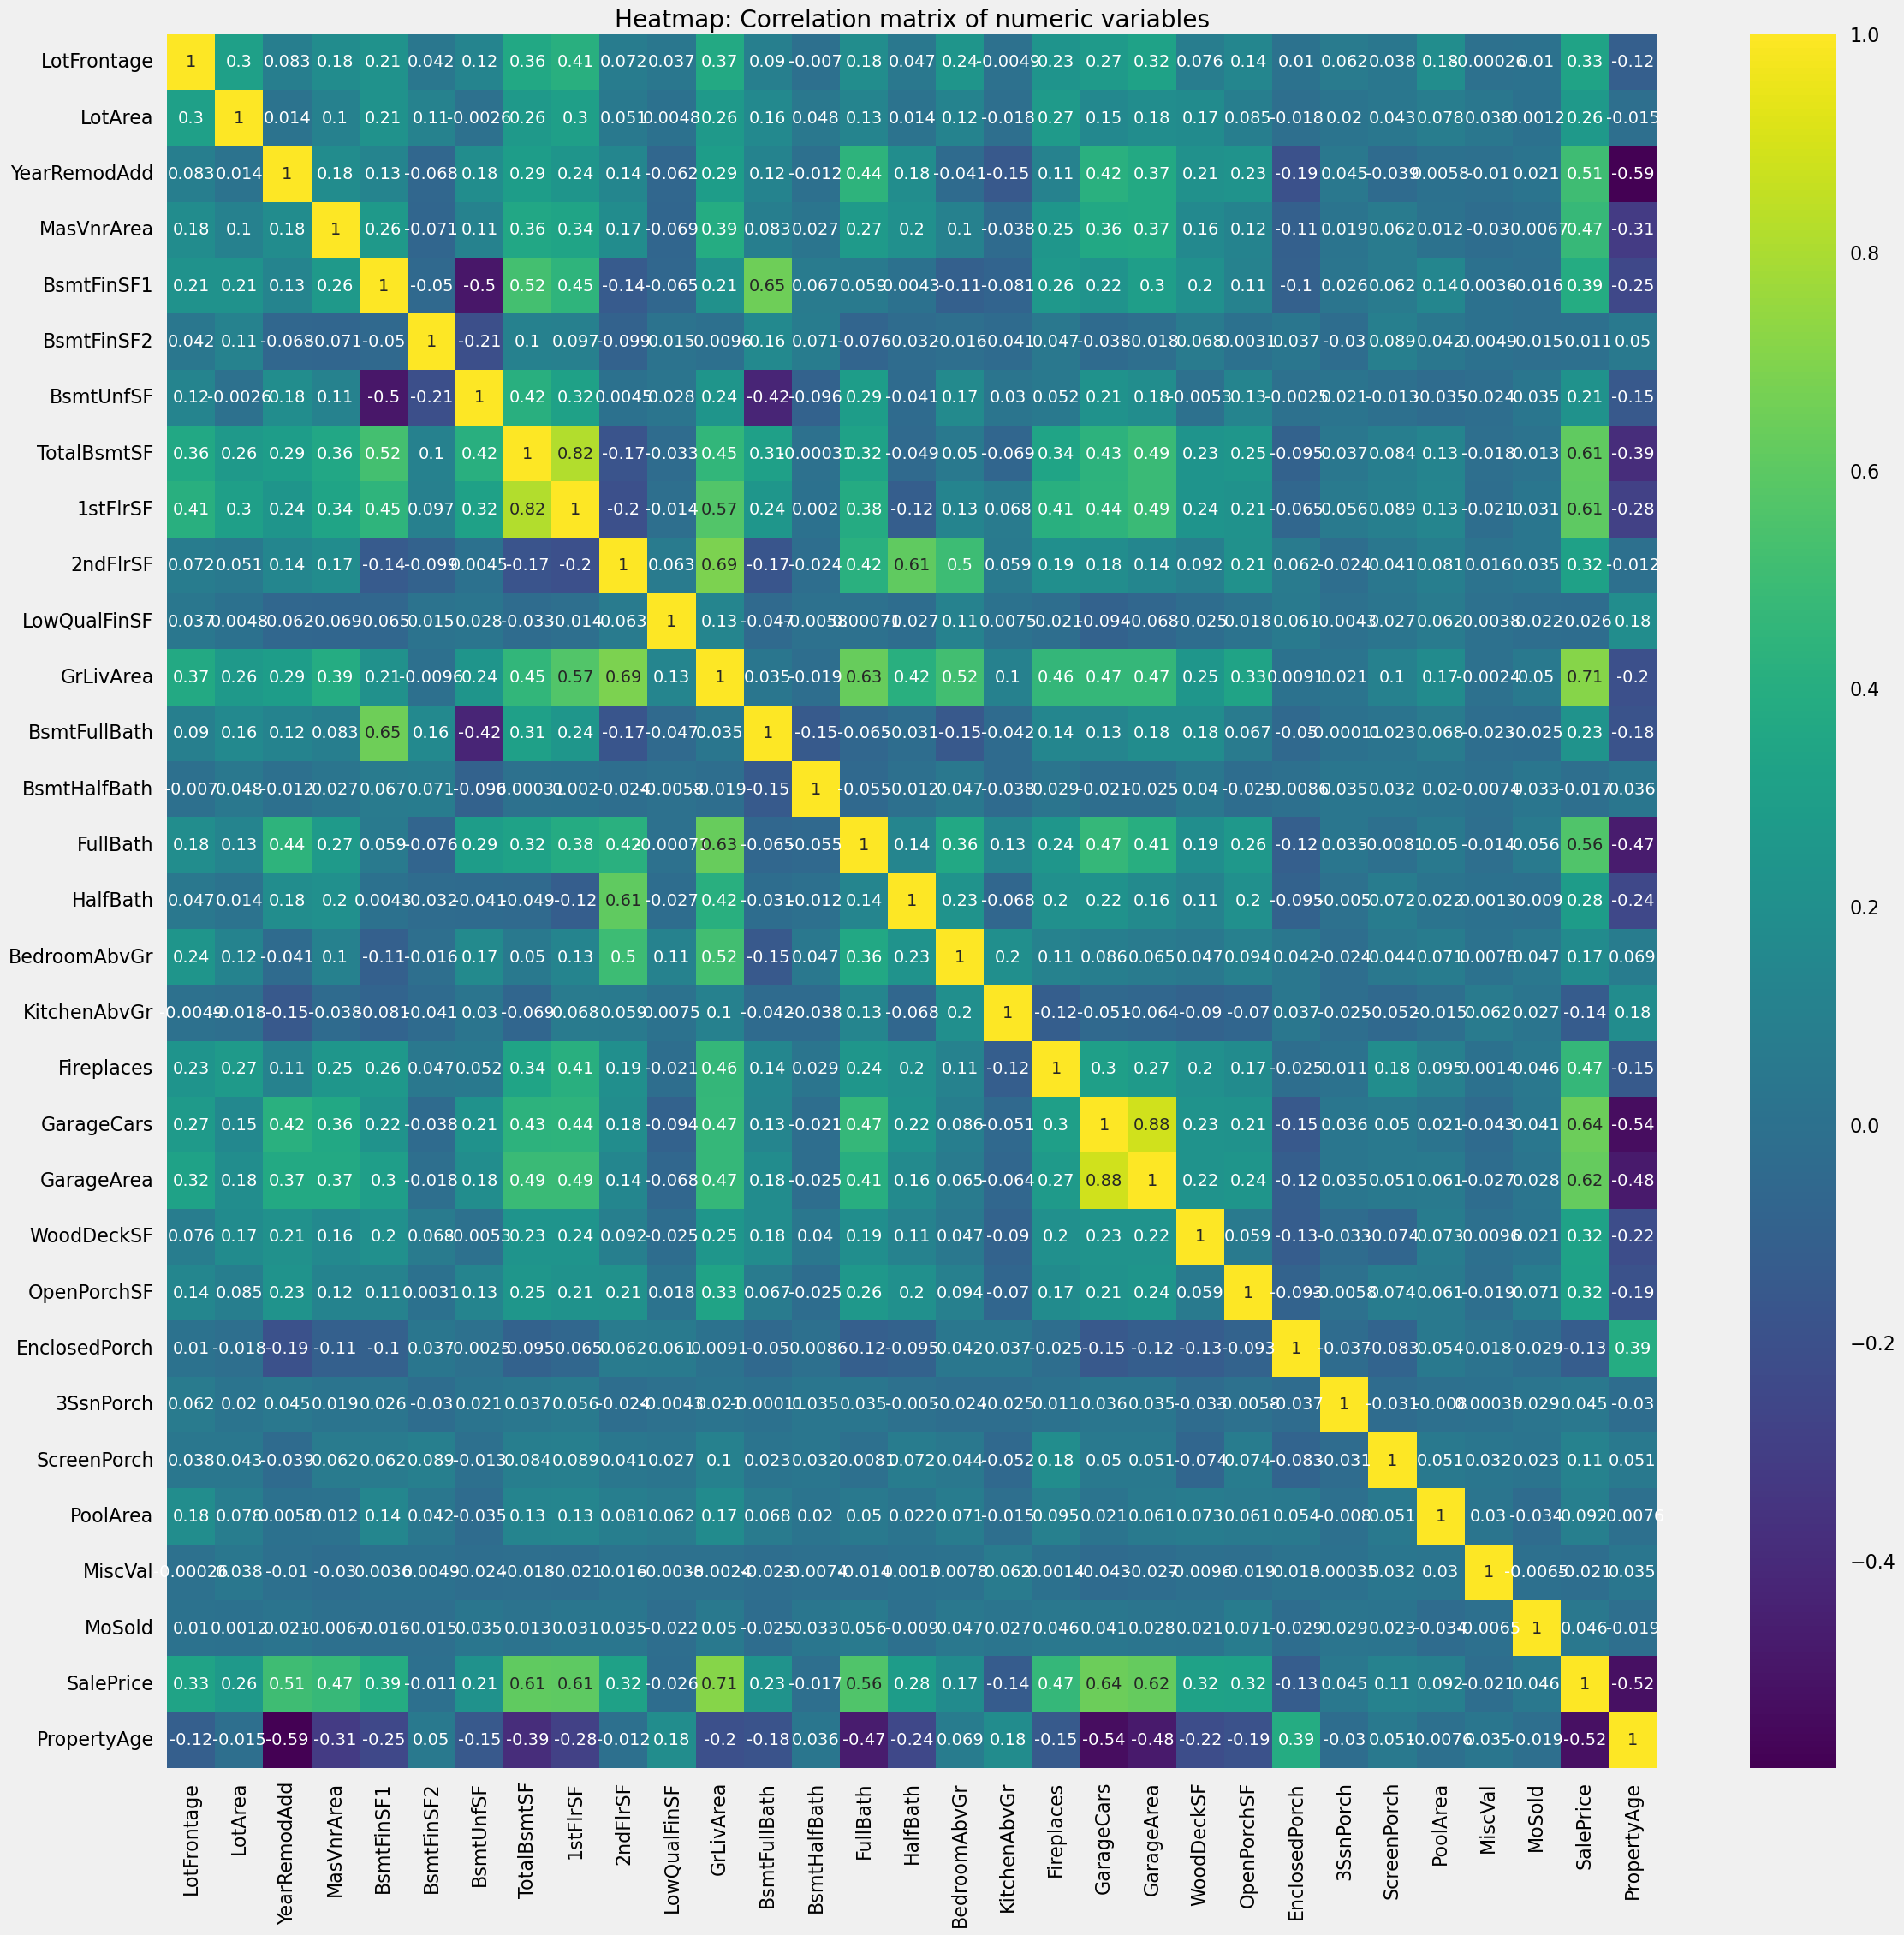

The top pairs of variables with the largest absolute correlations: 
 GarageArea    GarageCars      0.882475
1stFlrSF      TotalBsmtSF     0.819530
GrLivArea     SalePrice       0.708624
2ndFlrSF      GrLivArea       0.687501
BsmtFinSF1    BsmtFullBath    0.649212
GarageCars    SalePrice       0.640409
FullBath      GrLivArea       0.630012
GarageArea    SalePrice       0.623431
SalePrice     TotalBsmtSF     0.613581
2ndFlrSF      HalfBath        0.609707
1stFlrSF      SalePrice       0.605852
PropertyAge   YearRemodAdd    0.590360
1stFlrSF      GrLivArea       0.566024
FullBath      SalePrice       0.560664
GarageCars    PropertyAge     0.538727
PropertyAge   SalePrice       0.523350
BsmtFinSF1    TotalBsmtSF     0.522396
BedroomAbvGr  GrLivArea       0.521270
SalePrice     YearRemodAdd    0.507101
2ndFlrSF      BedroomAbvGr    0.502901
BsmtFinSF1    BsmtUnfSF       0.495251
1stFlrSF      GarageArea      0.489782
GarageArea    TotalBsmtSF     0.486665
              PropertyAge     0.47

In [114]:
# Bivariate analysis
# corelation analysis using heat map for numeric variables

# Subsetting the DataFrame for only numeric variables
numeric_df = houseDF[numeric_variables]

# Computing the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title("Heatmap: Correlation matrix of numeric variables")
plt.show()

# The following steps are performed to obtain the most corelated pairs

corr_abs_num = corr_matrix.abs() # to obtain the absolute correlation matrix

# Creating a multi-level index of all possible pairs of variables and their correlations
corr_pairs_num = corr_abs_num.unstack().sort_values(ascending=False)

# Excluding pairs with identical variables
corr_pairs_num = corr_pairs_num[(corr_pairs_num != 1) & (corr_pairs_num.index.get_level_values(0) != corr_pairs_num.index.get_level_values(1))]

# Removing duplicates by keeping only pairs with variables in lexicographical order
corr_pairs_num = corr_pairs_num[corr_pairs_num.index.to_series().apply(lambda x: x[0] < x[1])]

# Printing the top pairs of variables with the largest absolute correlations
print("The top pairs of variables with the largest absolute correlations: \n", corr_pairs_num.nlargest(35))

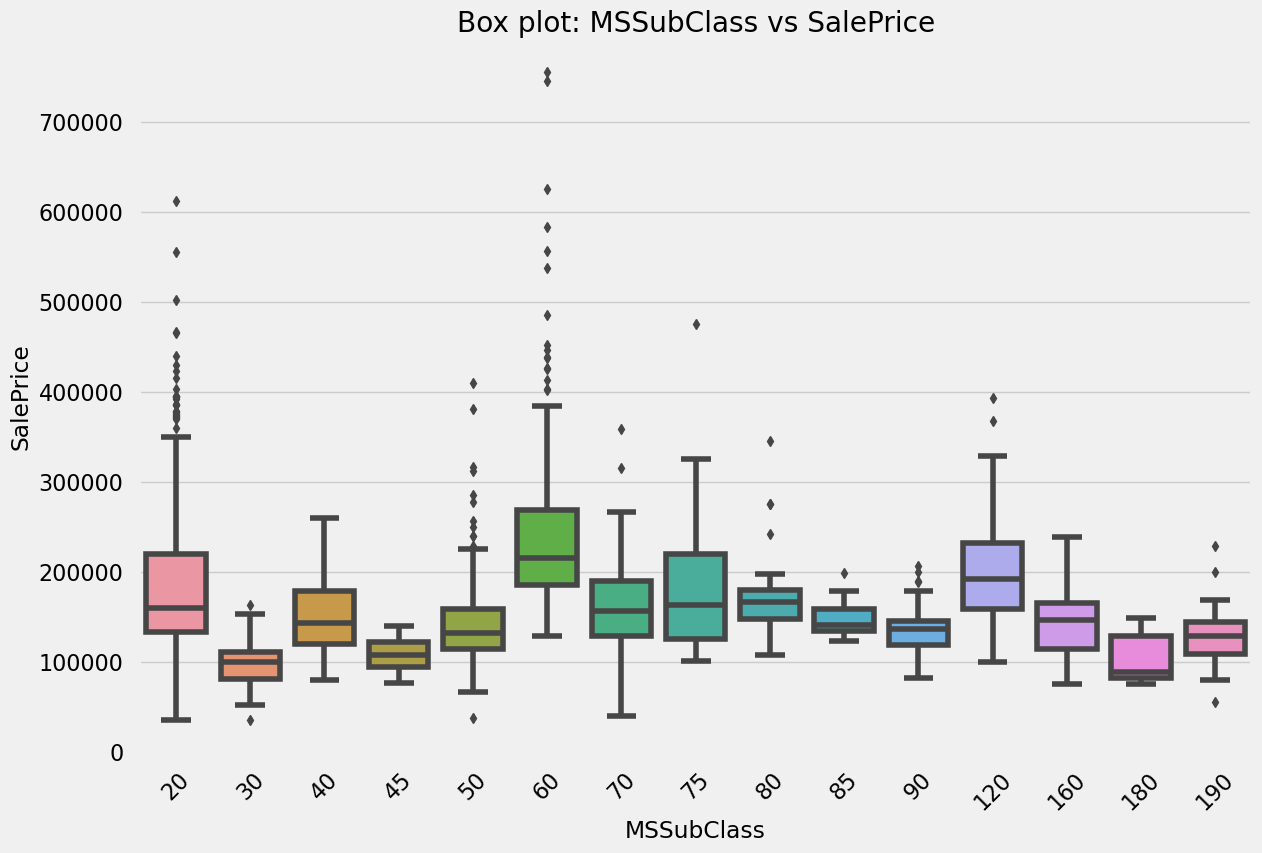

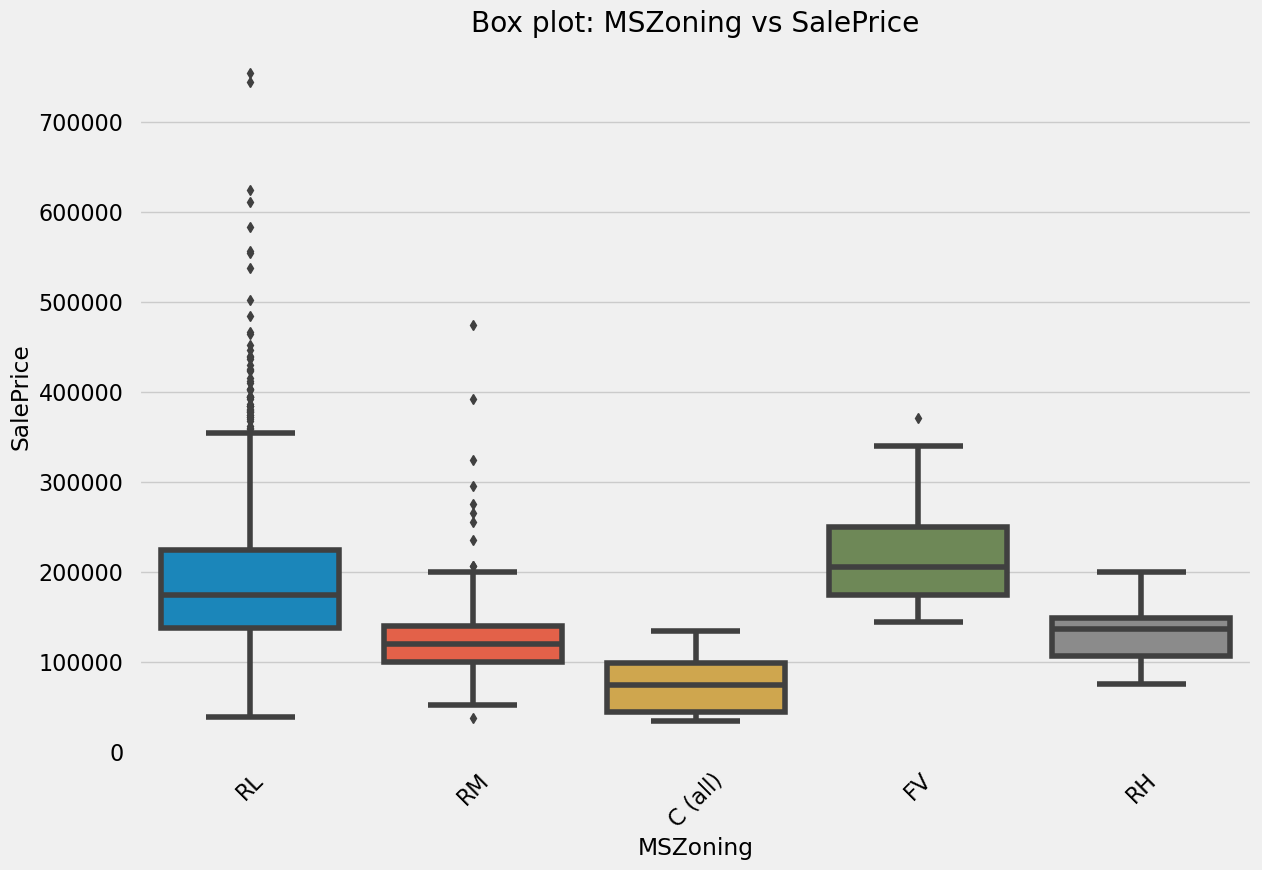

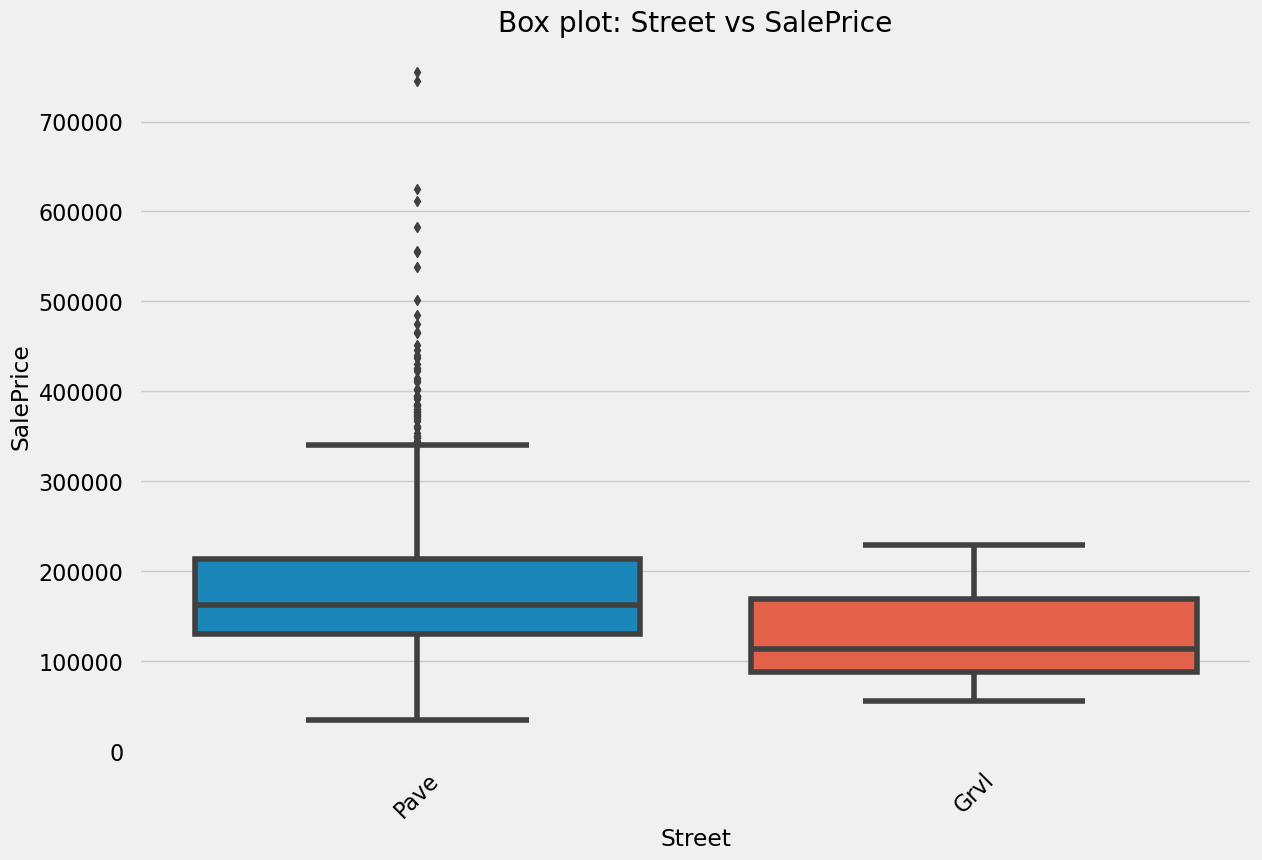

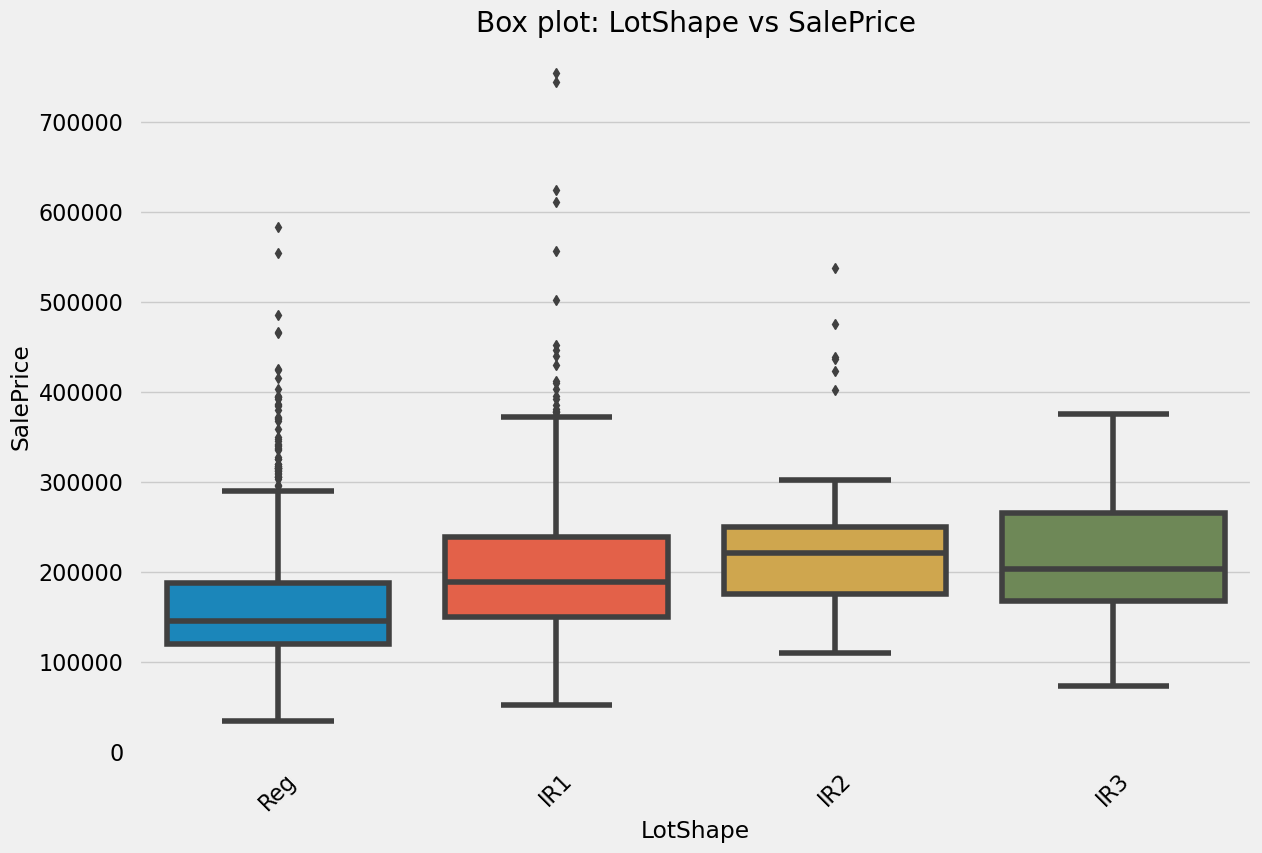

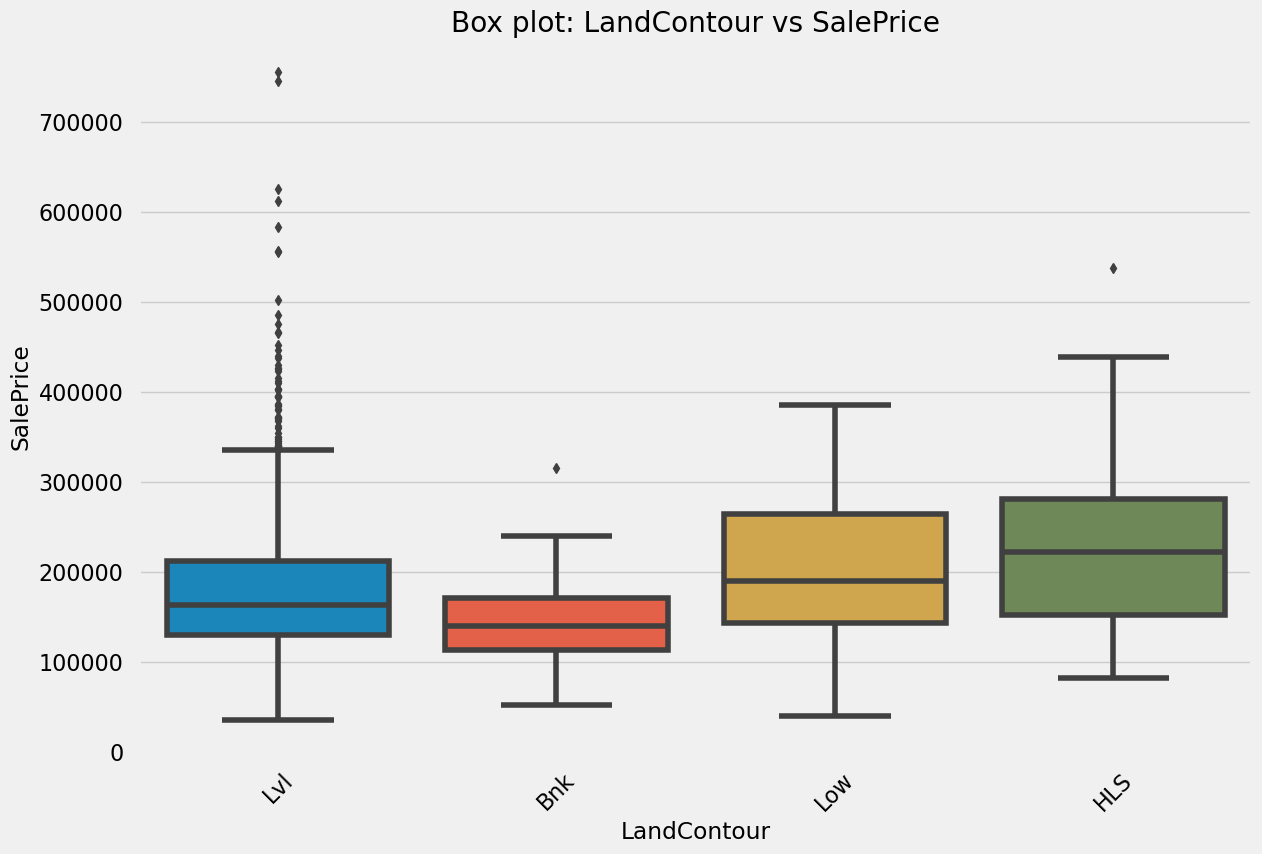

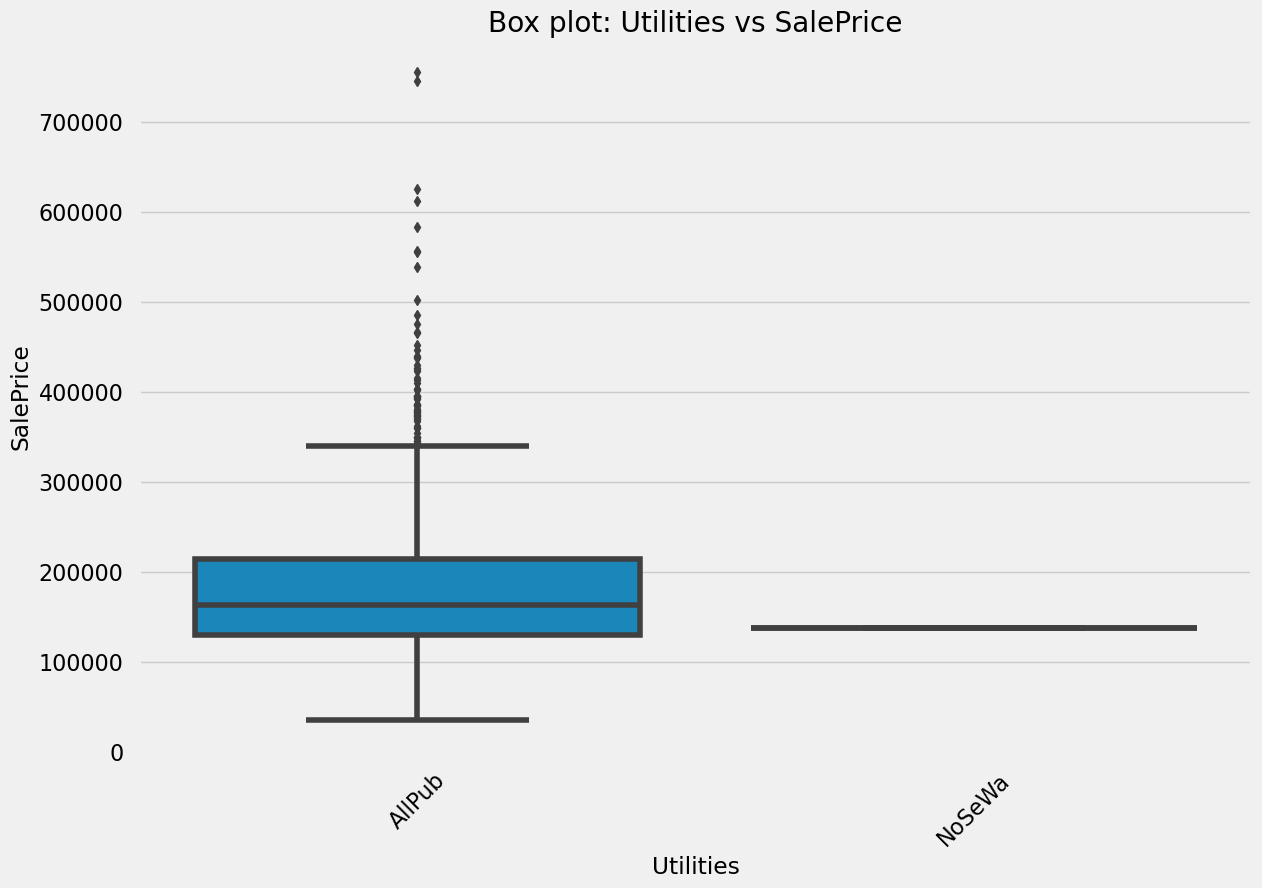

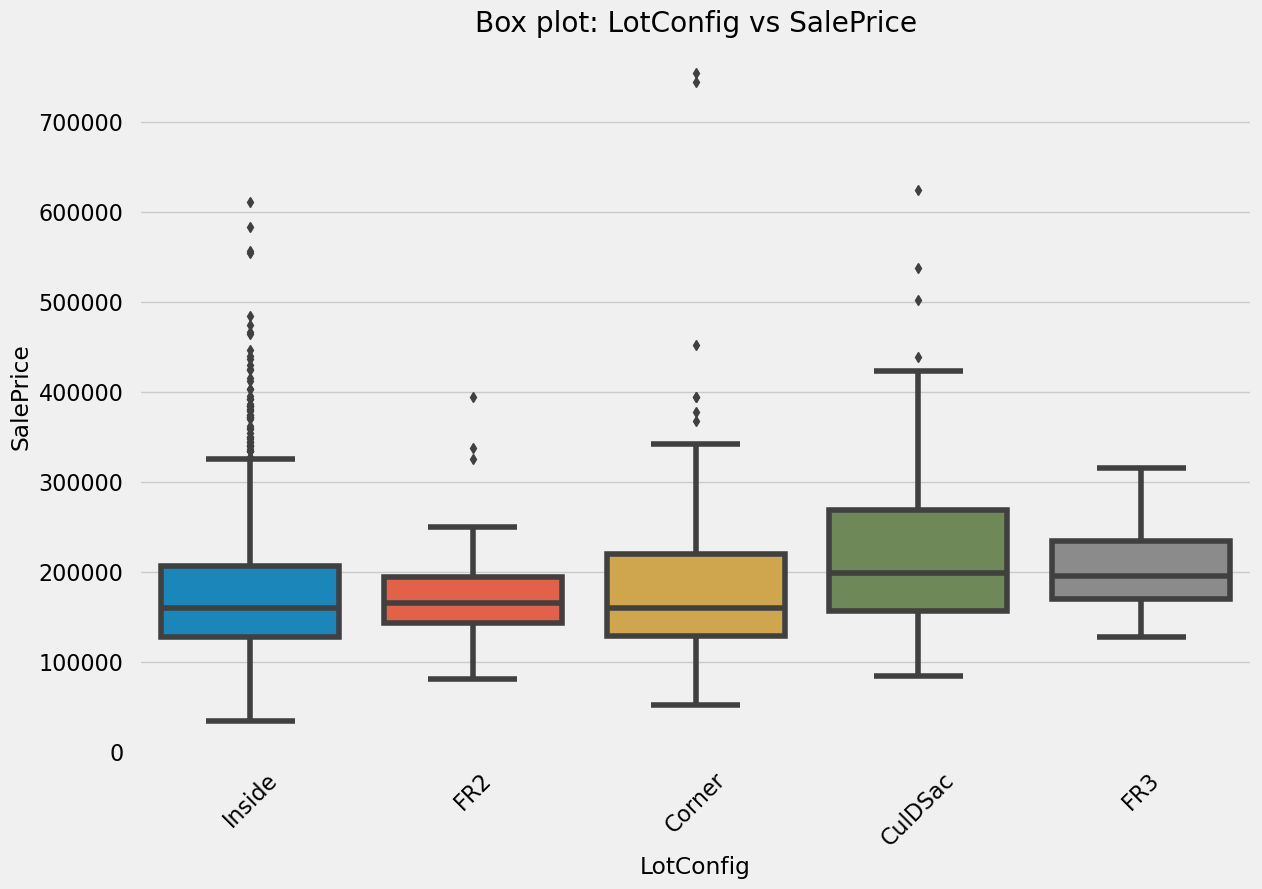

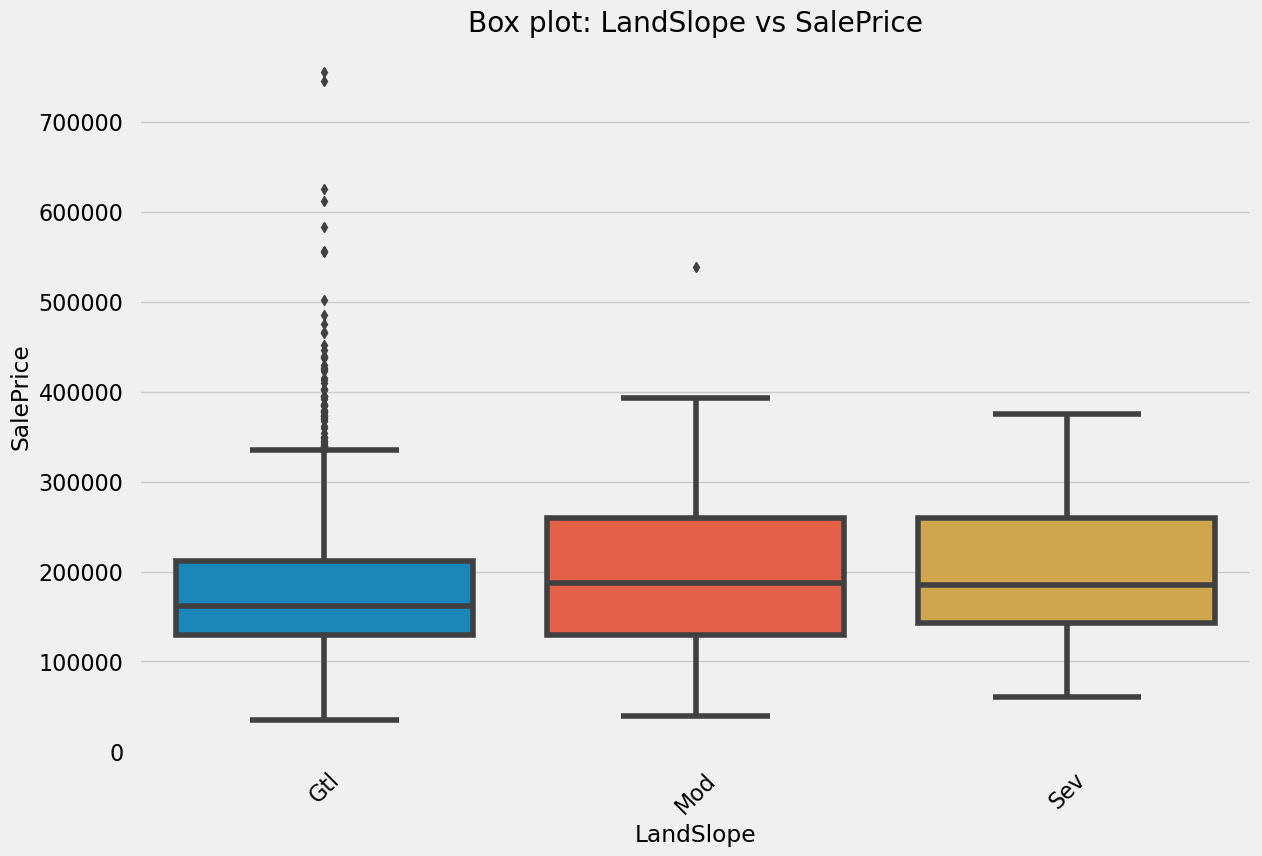

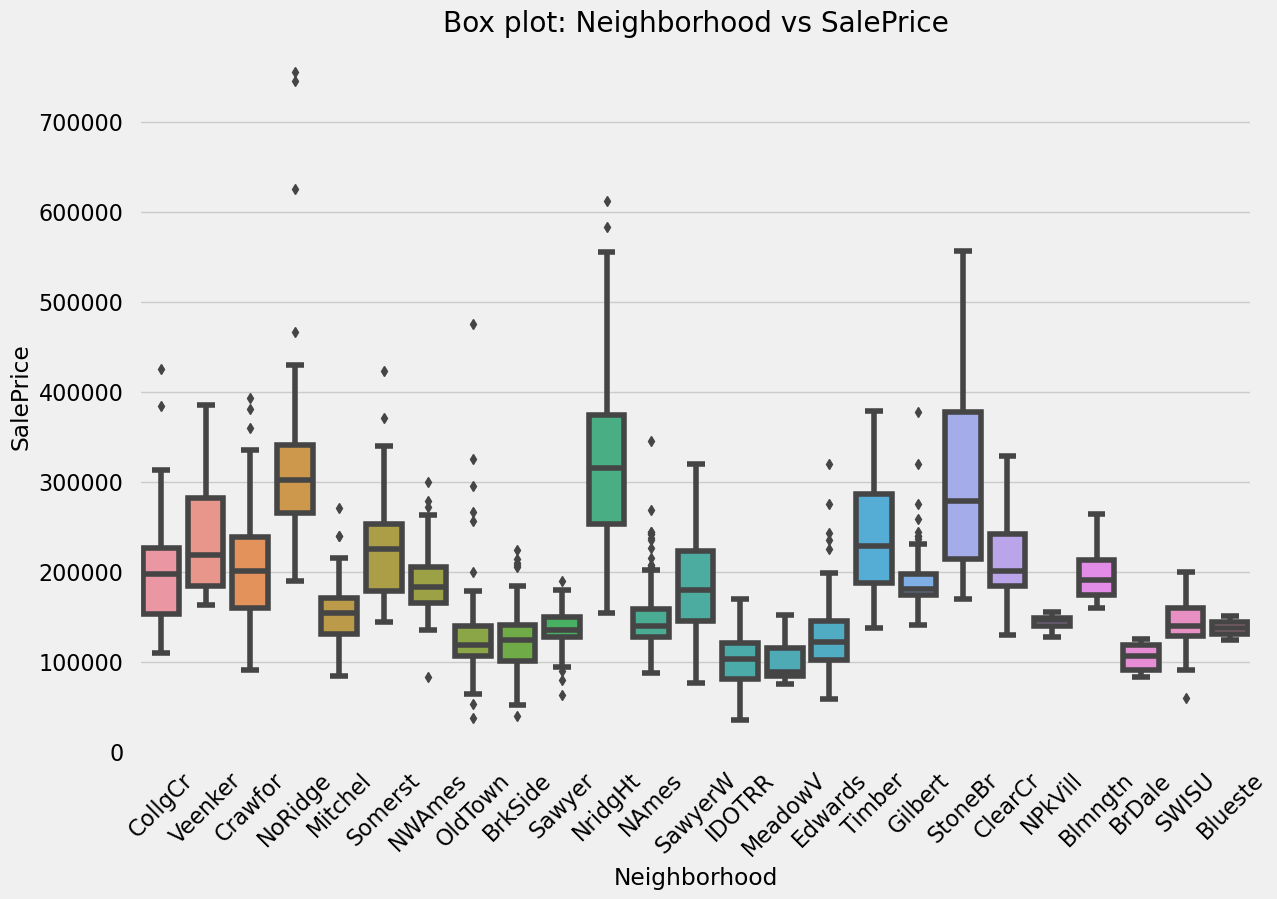

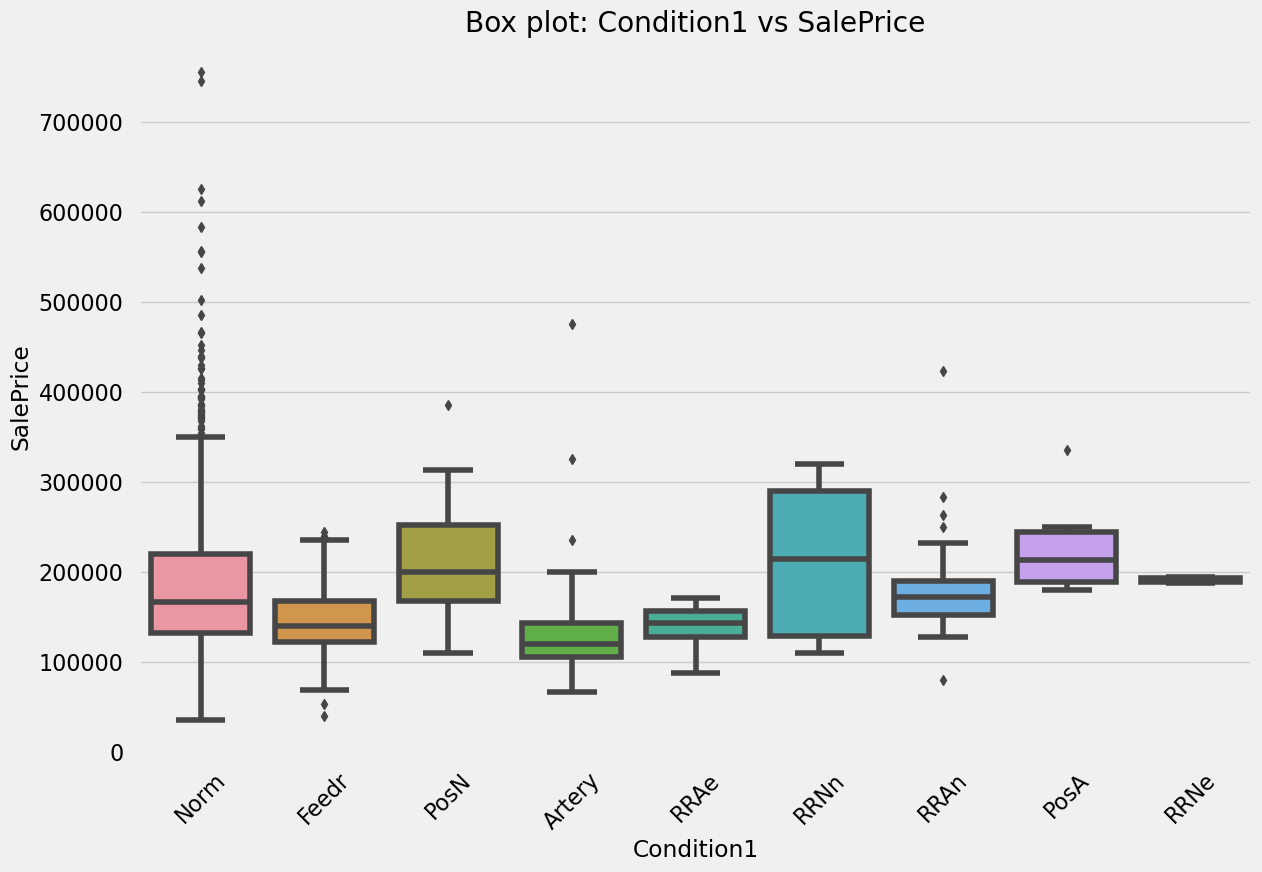

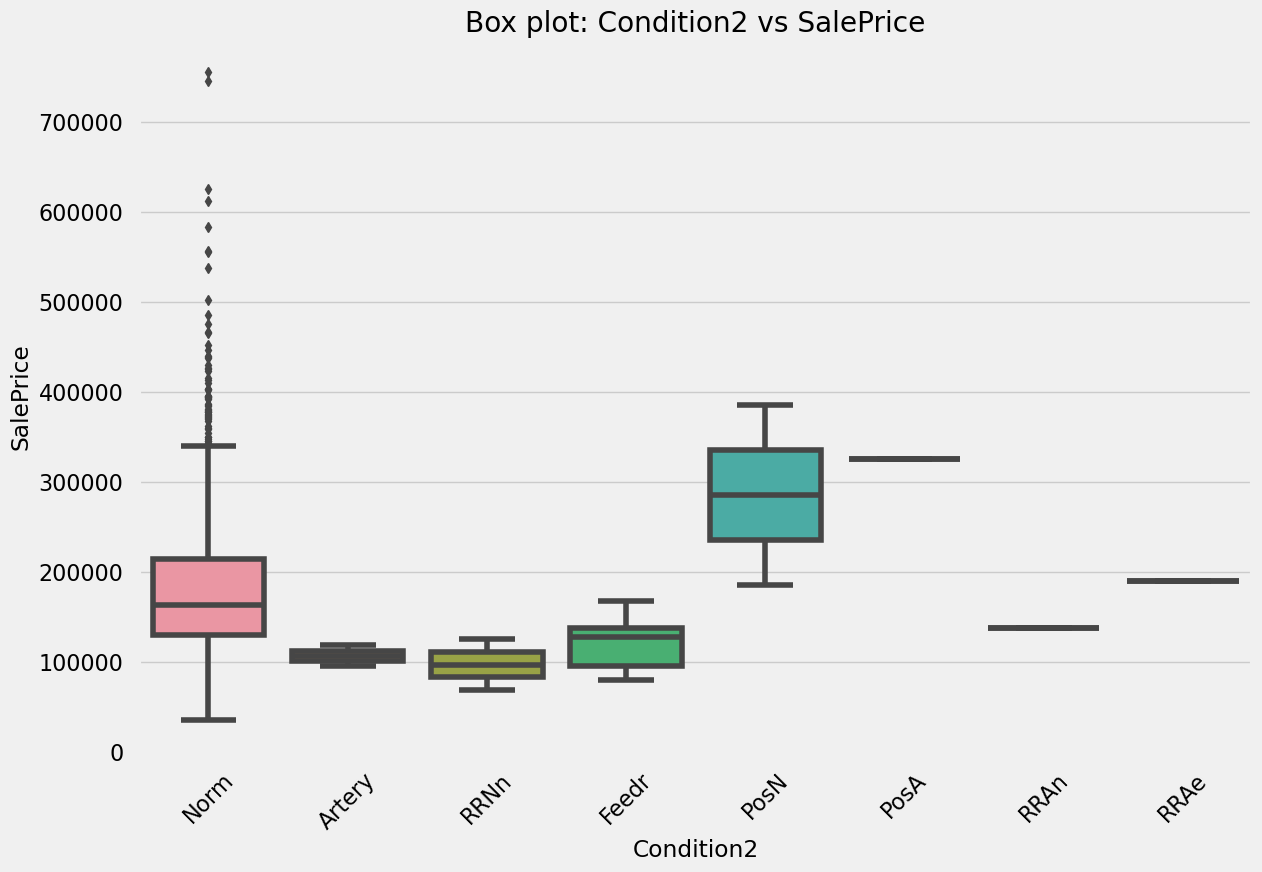

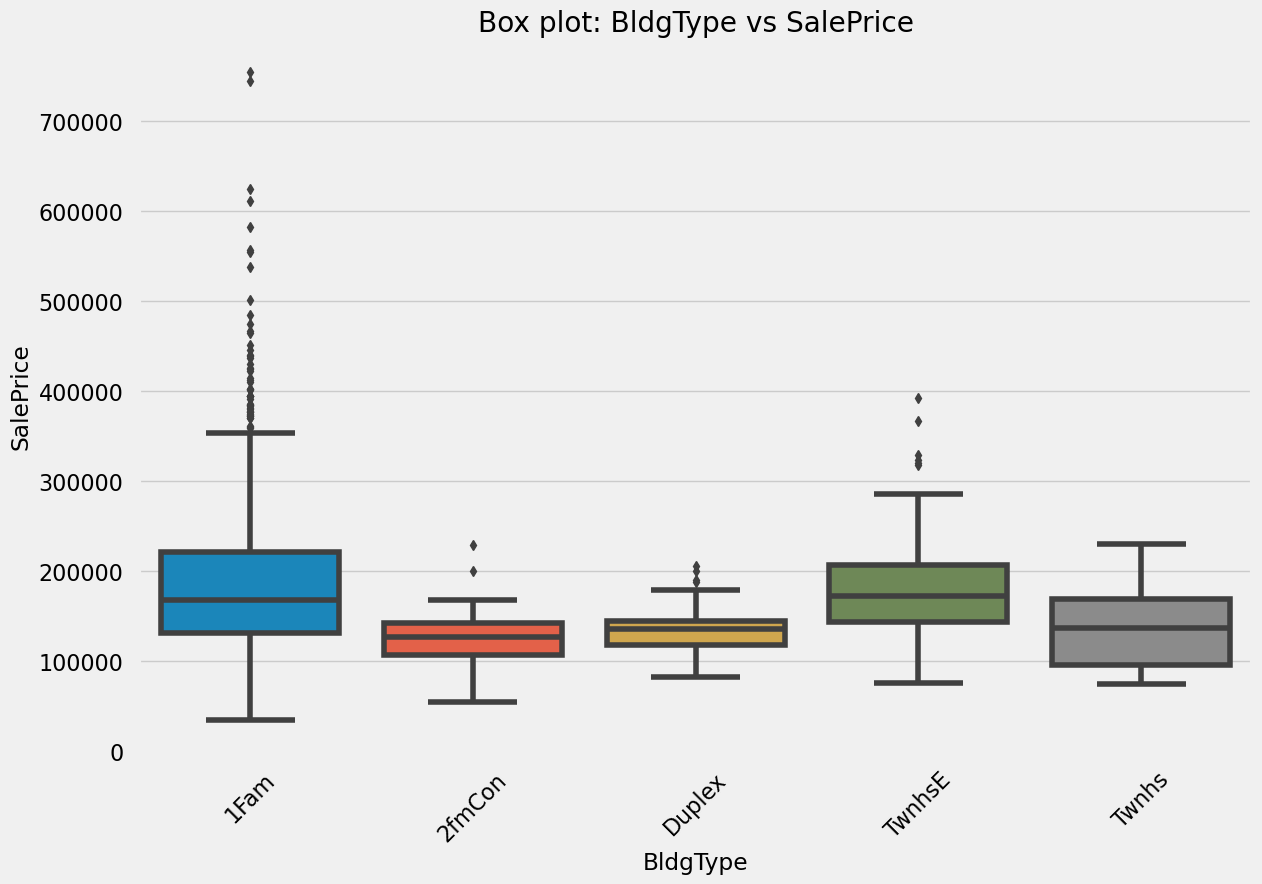

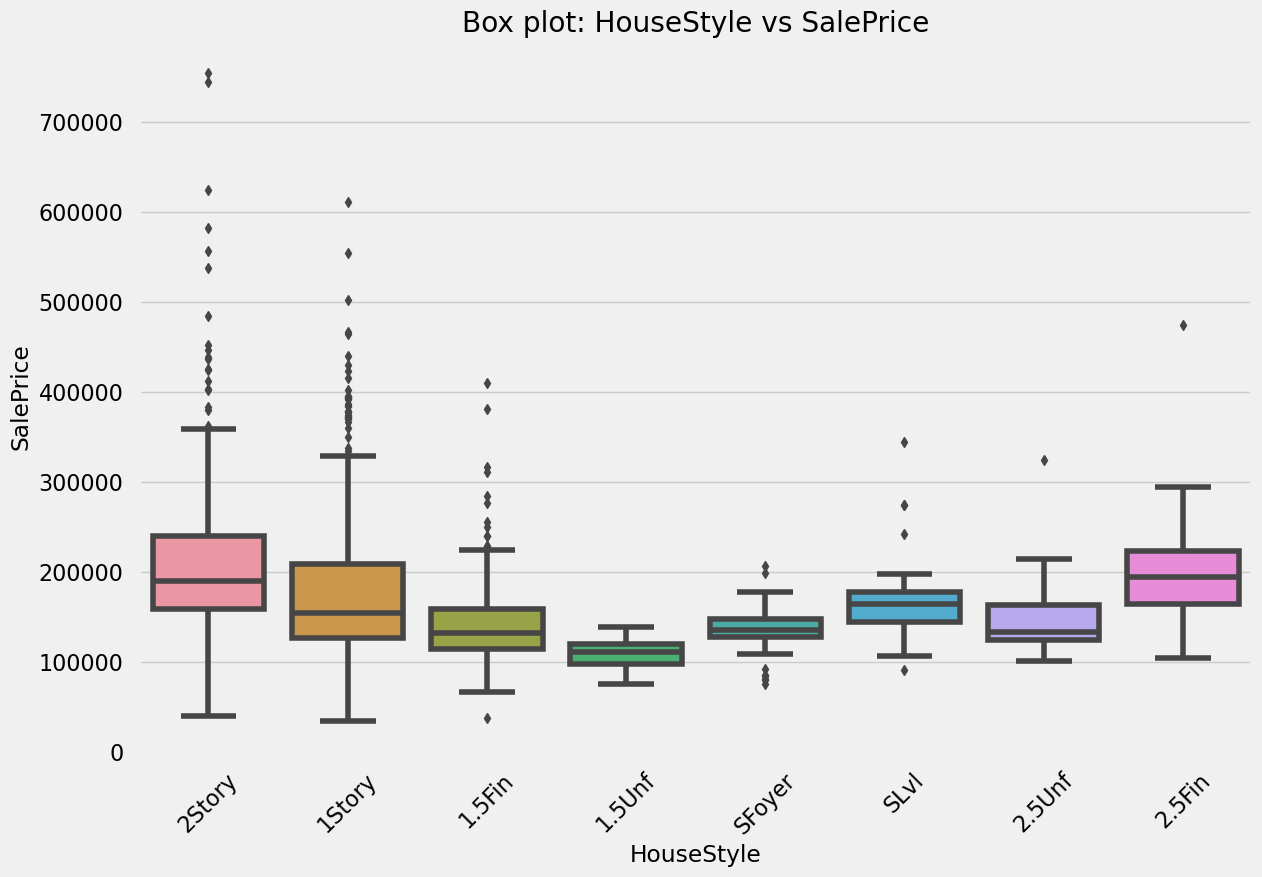

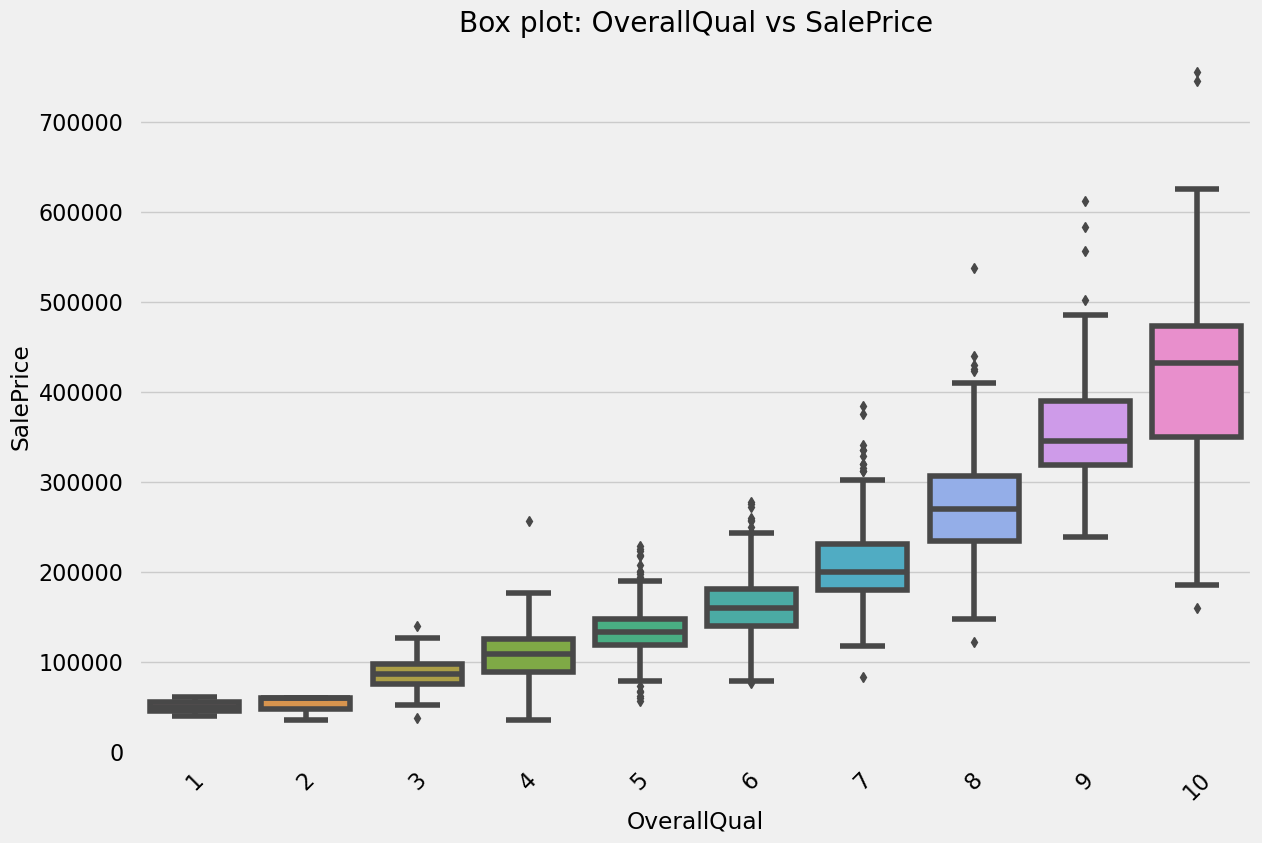

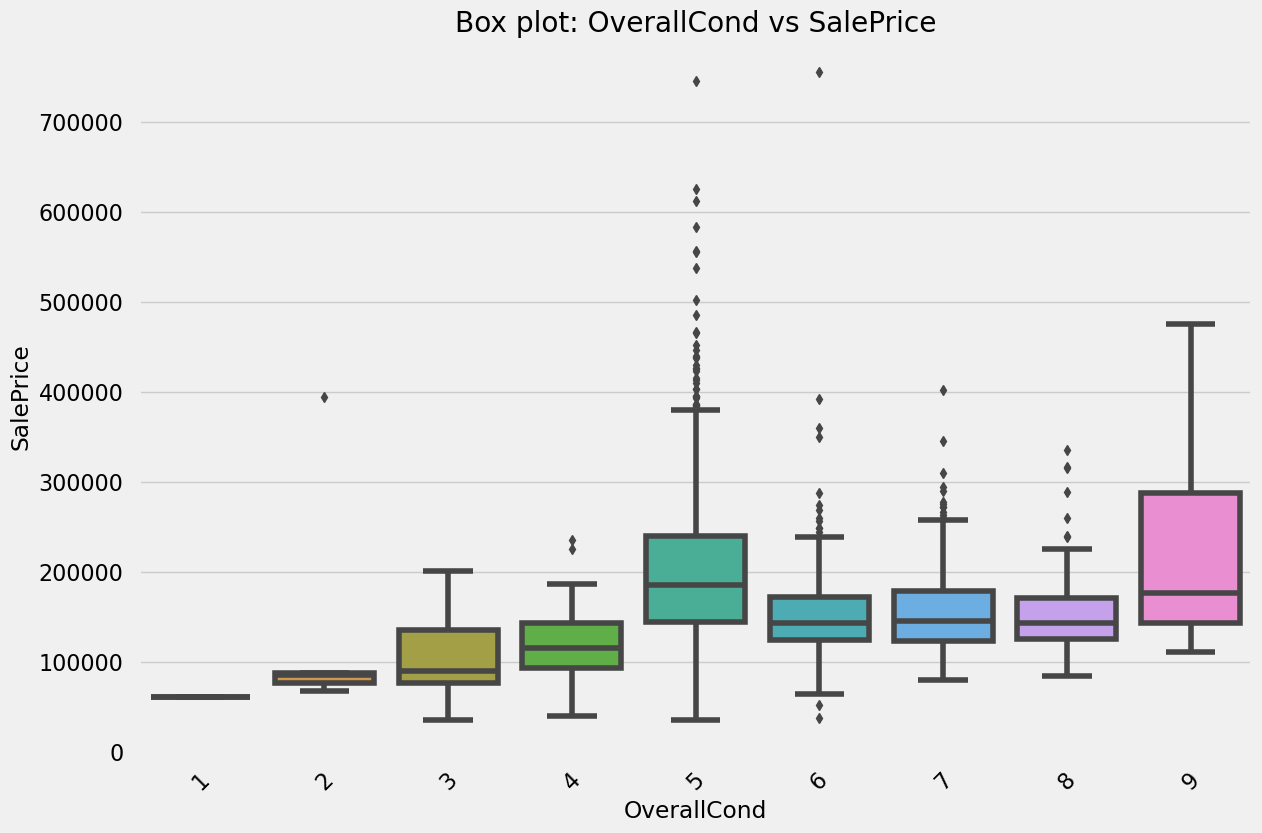

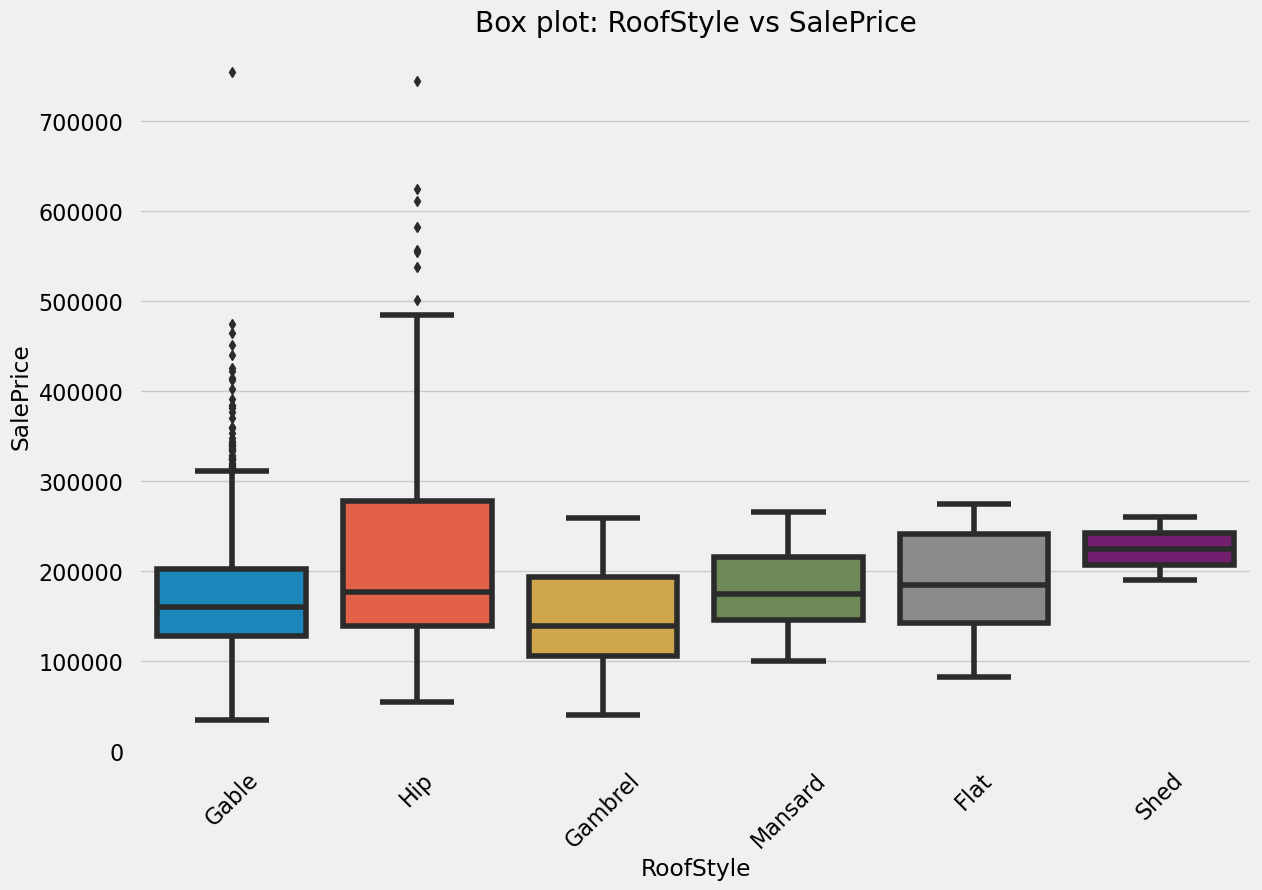

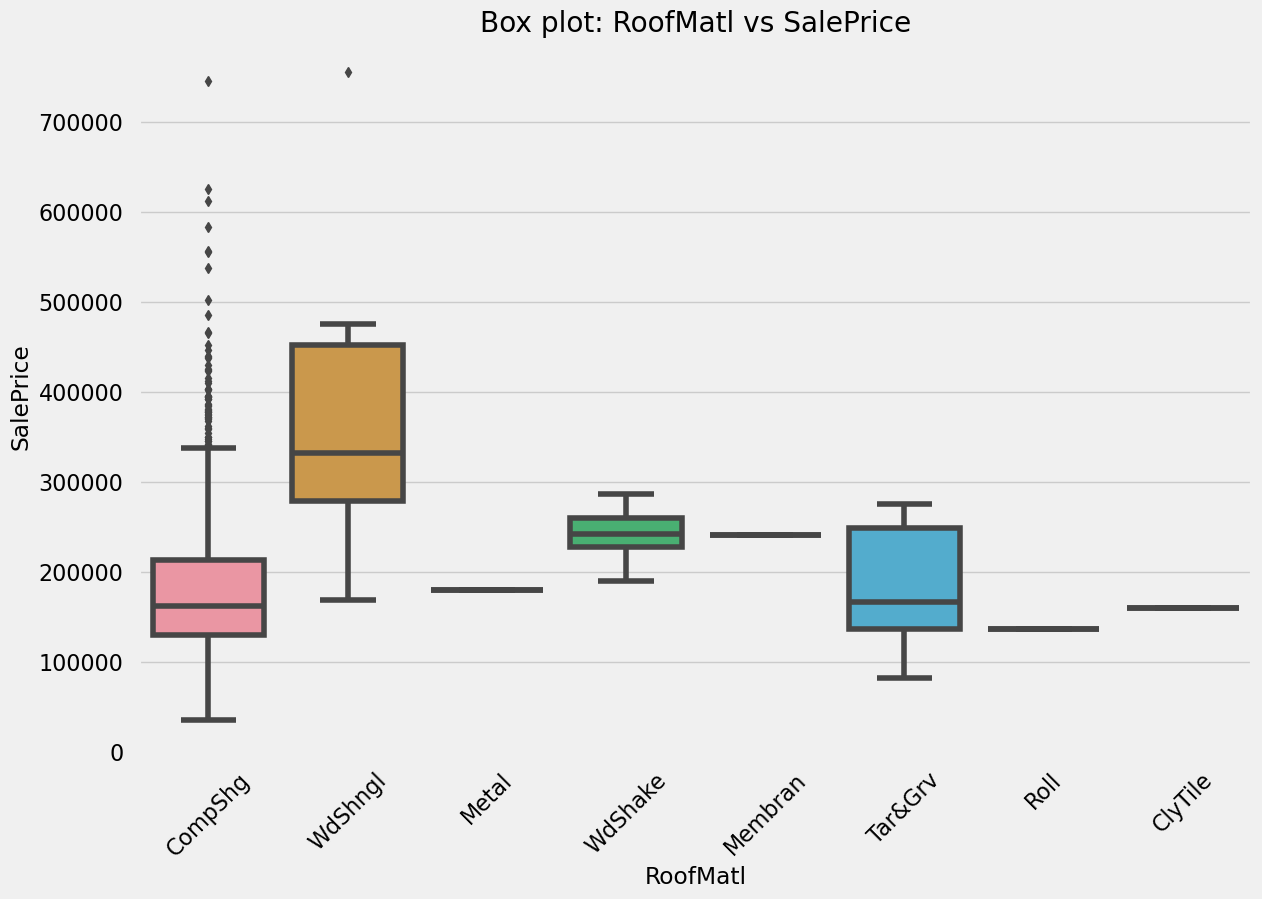

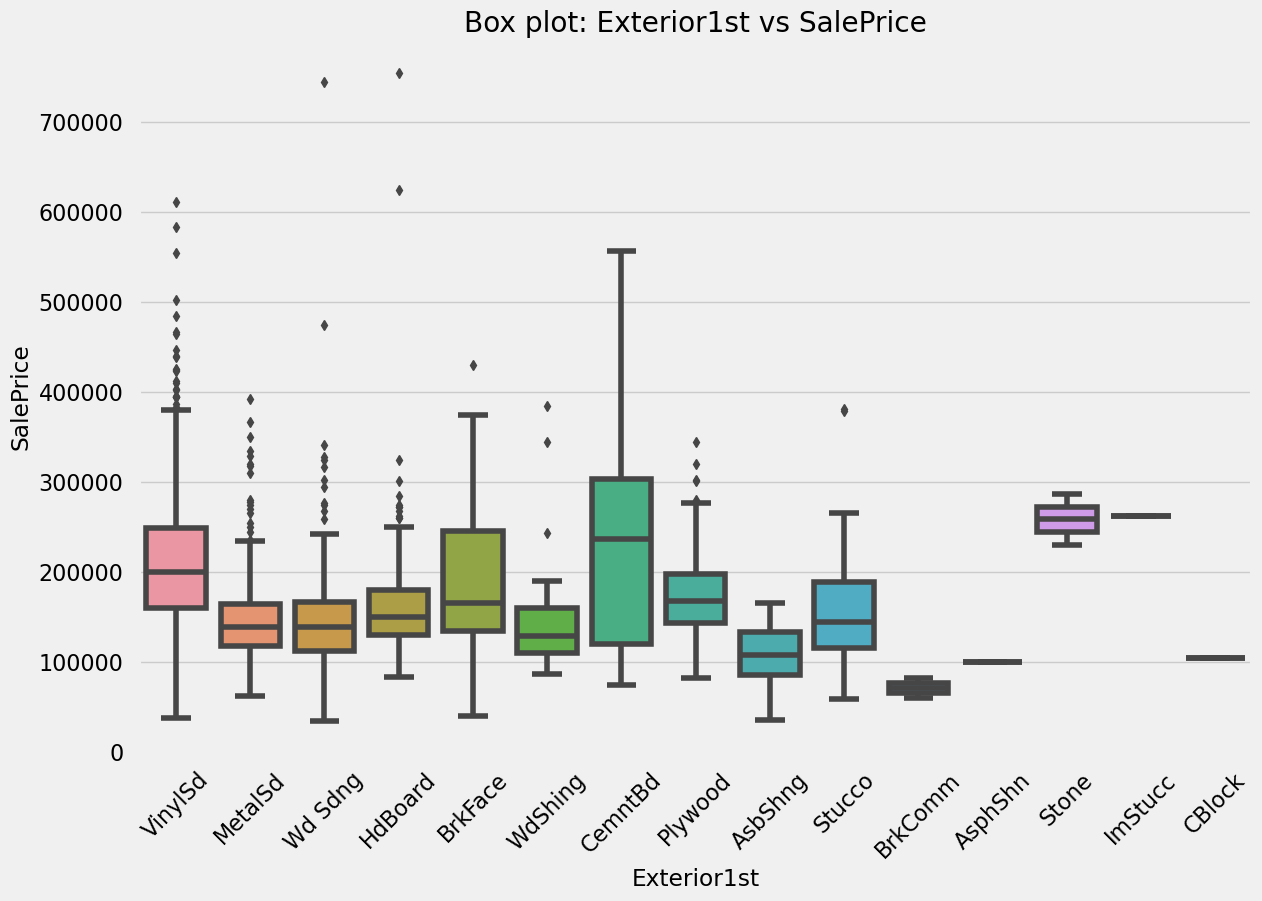

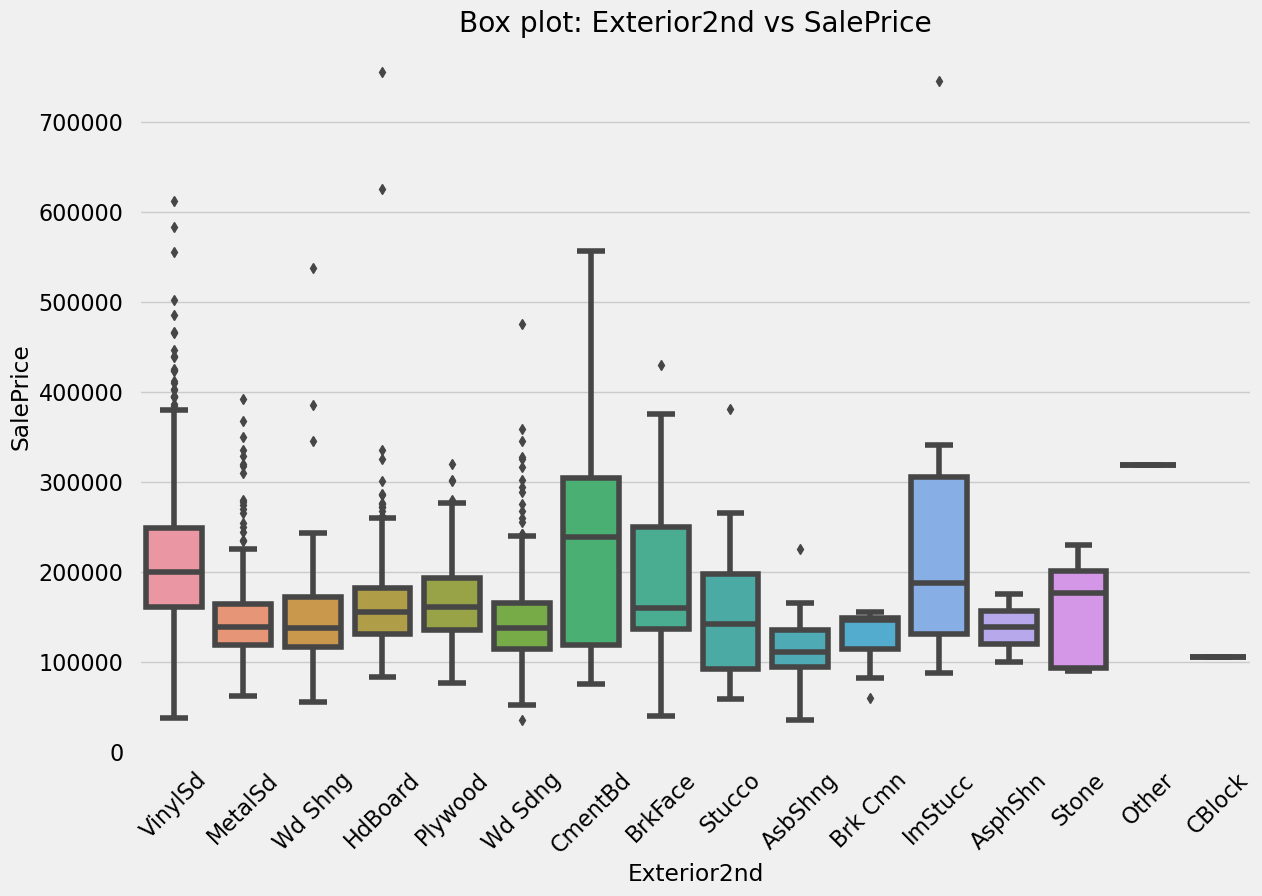

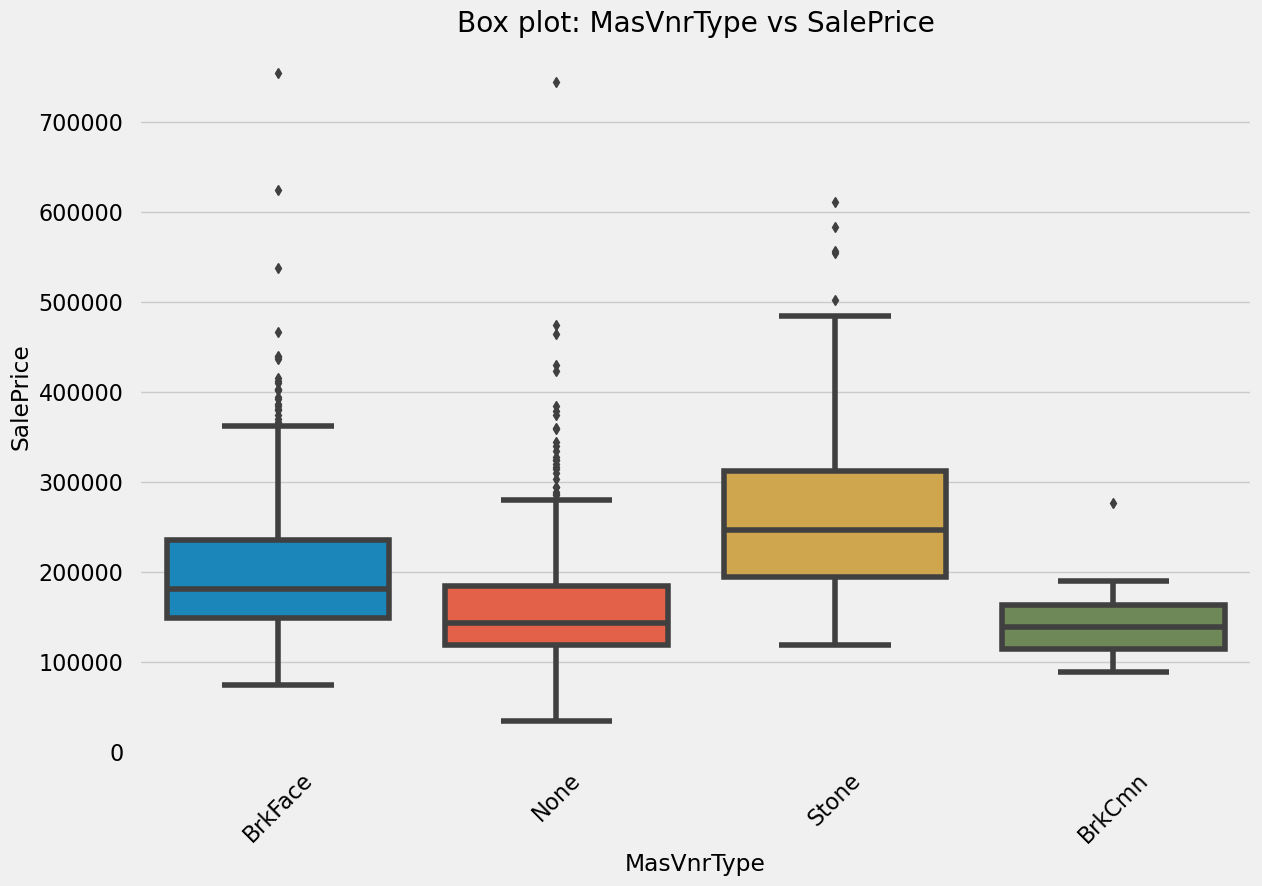

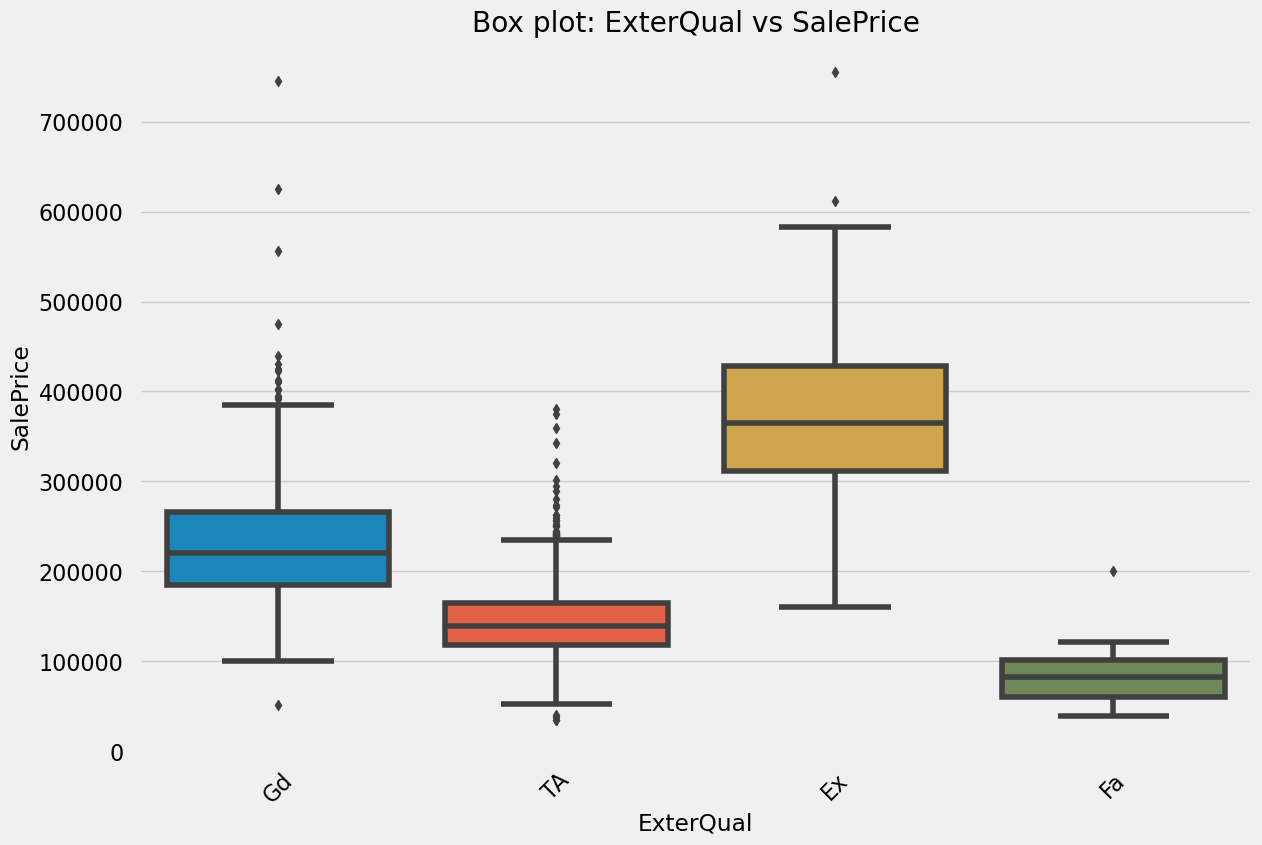

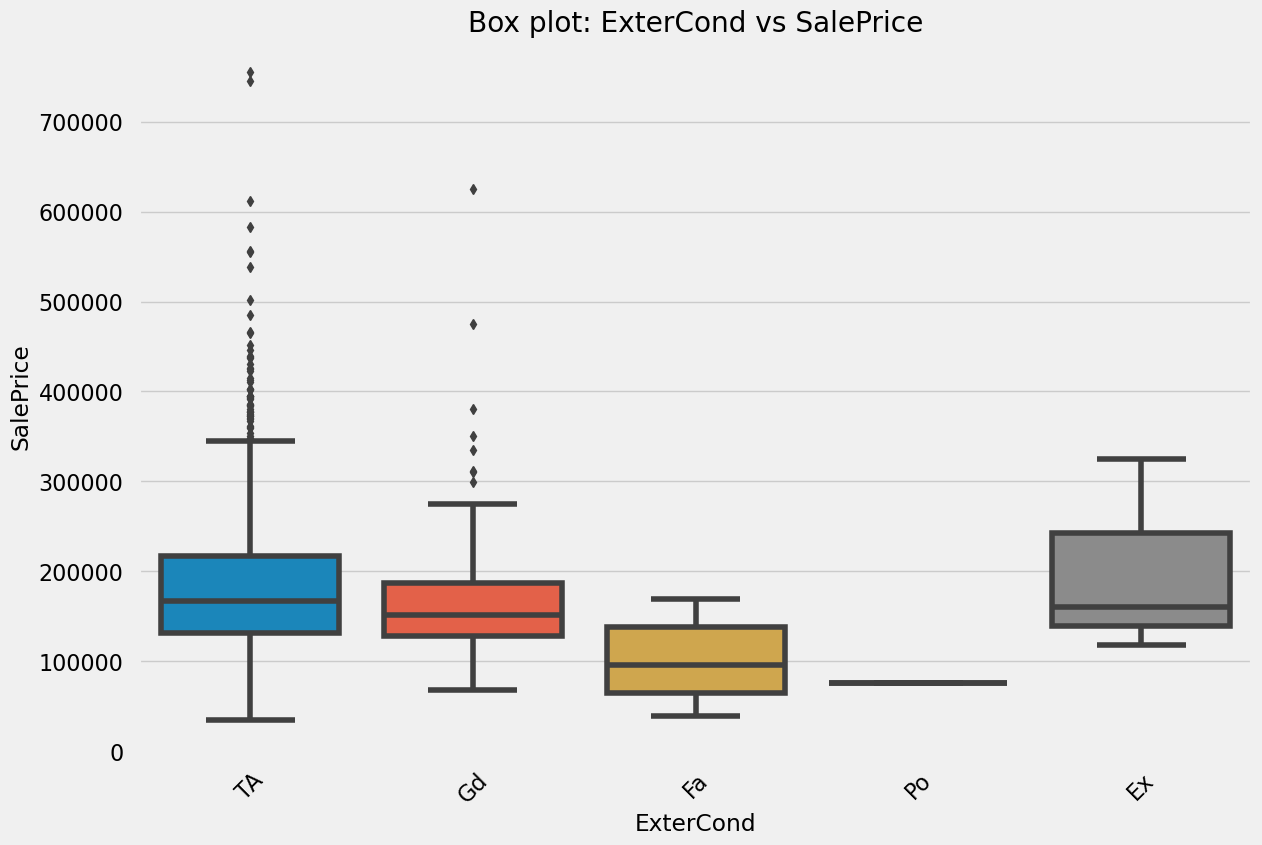

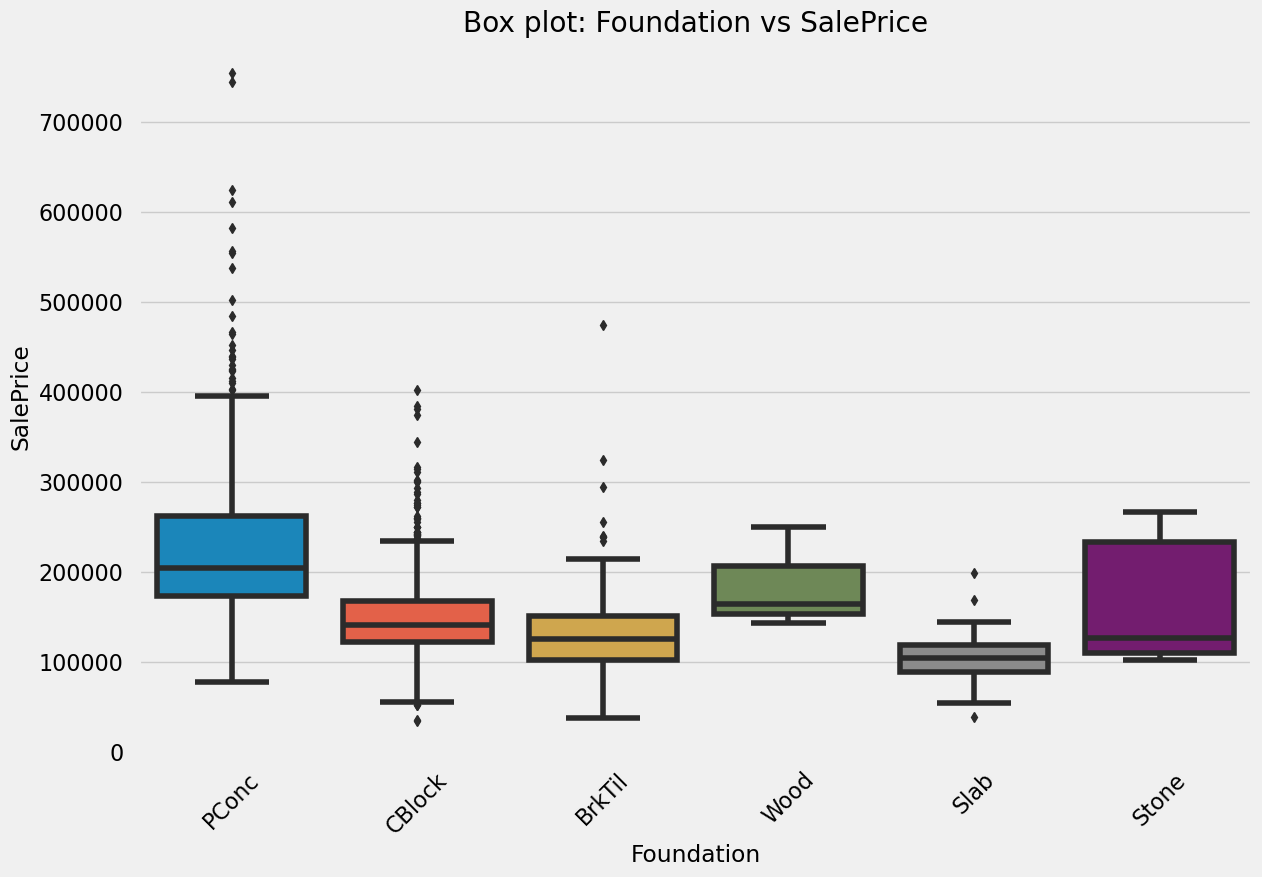

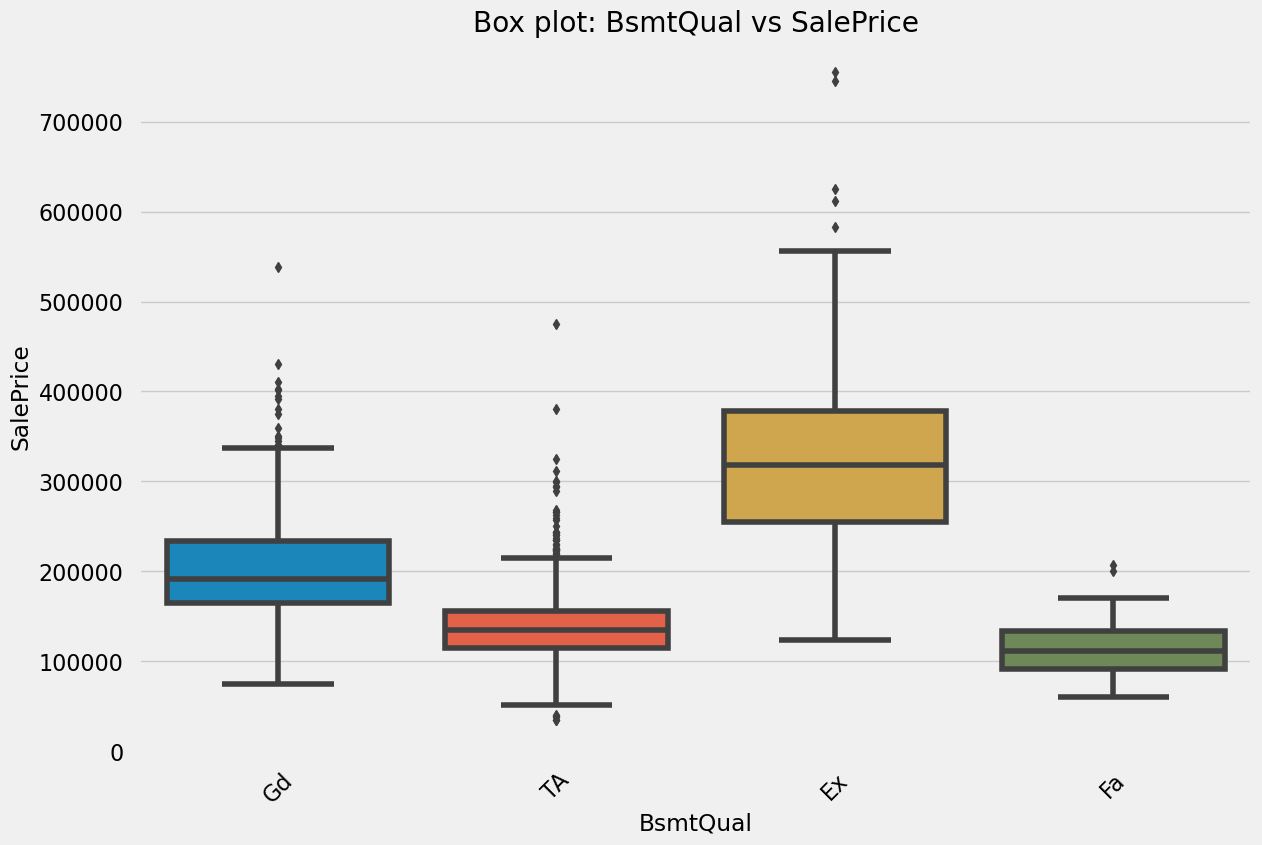

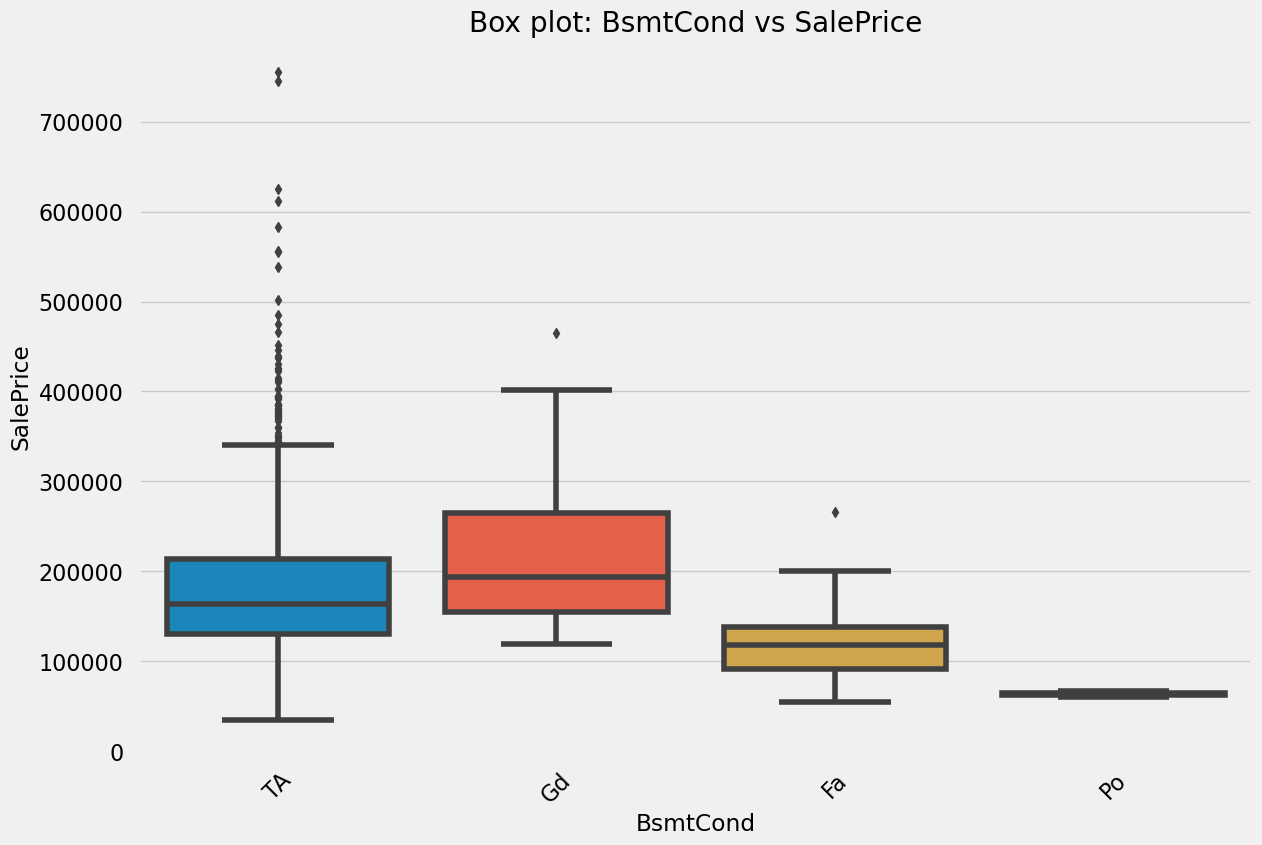

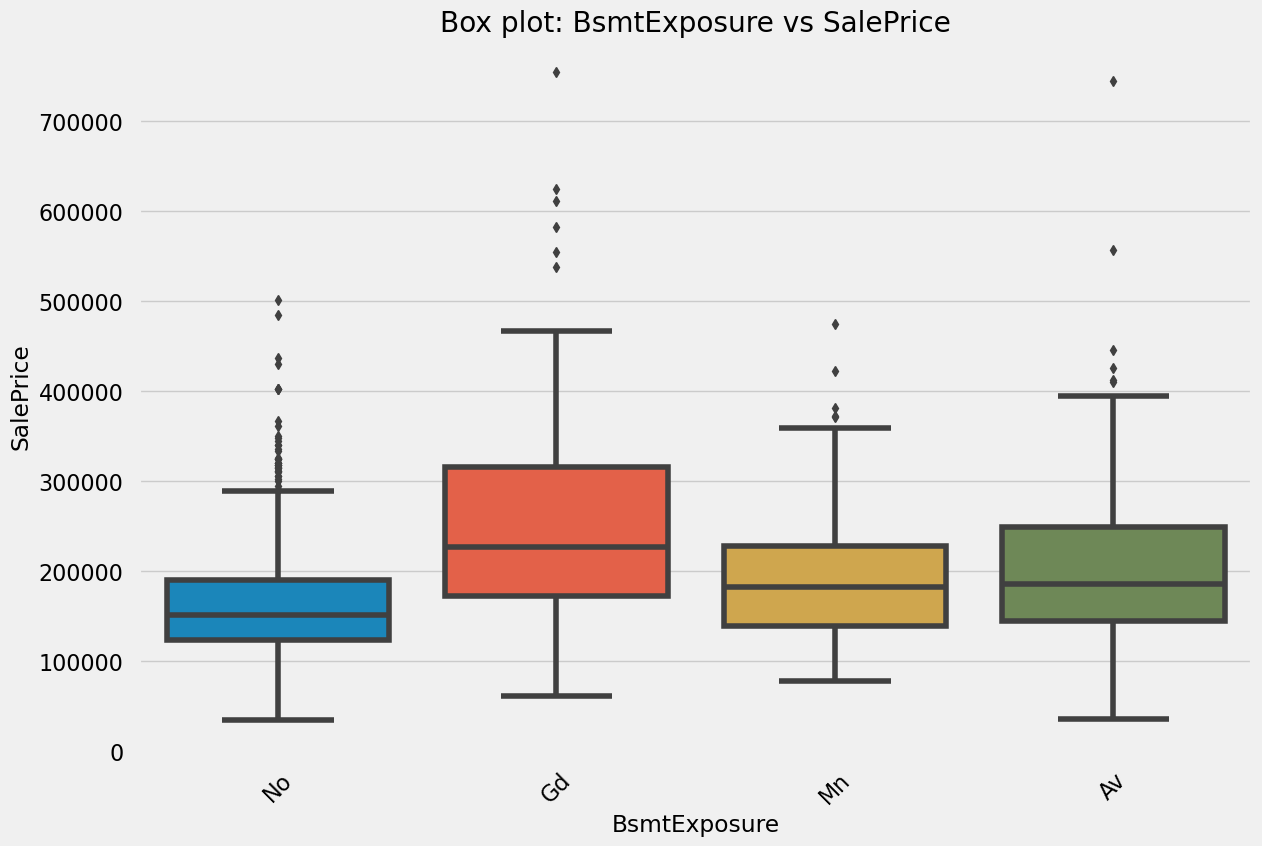

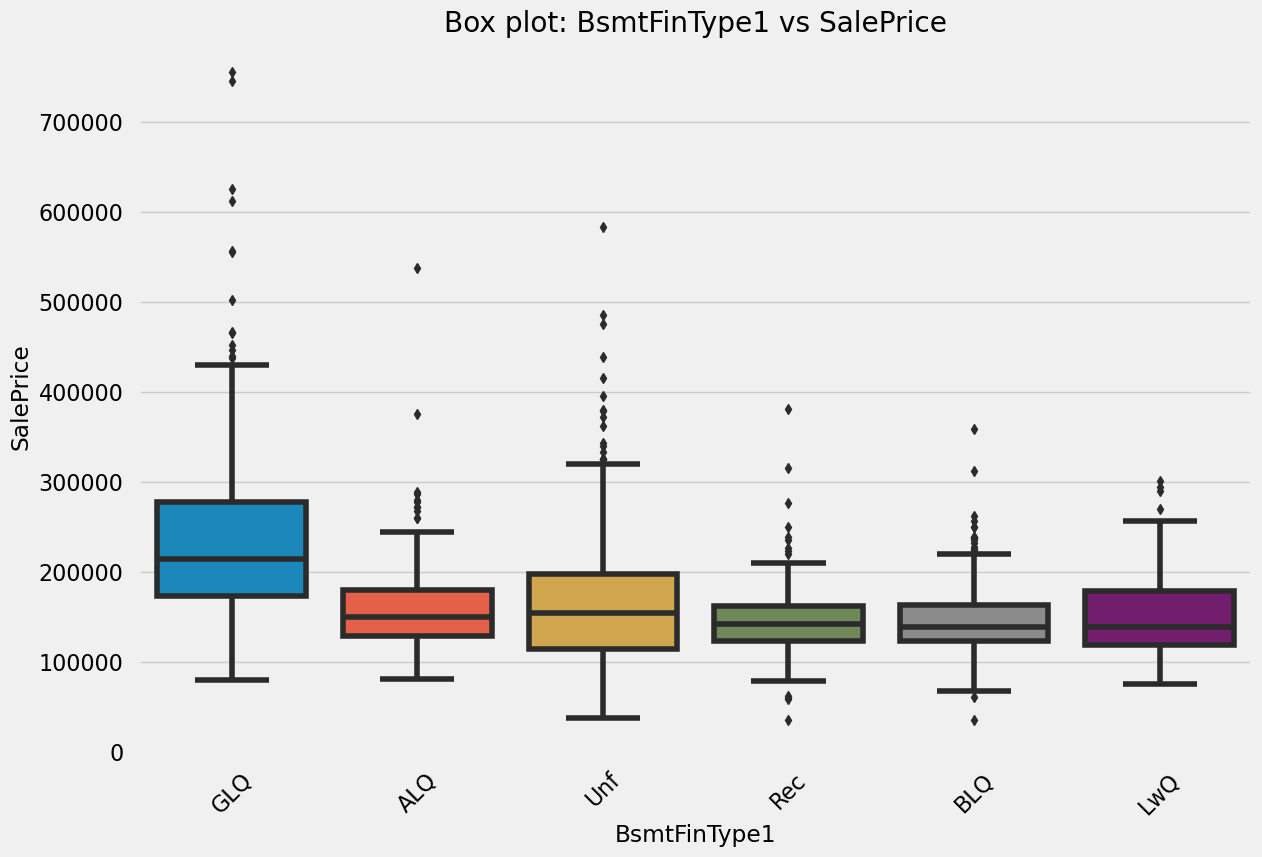

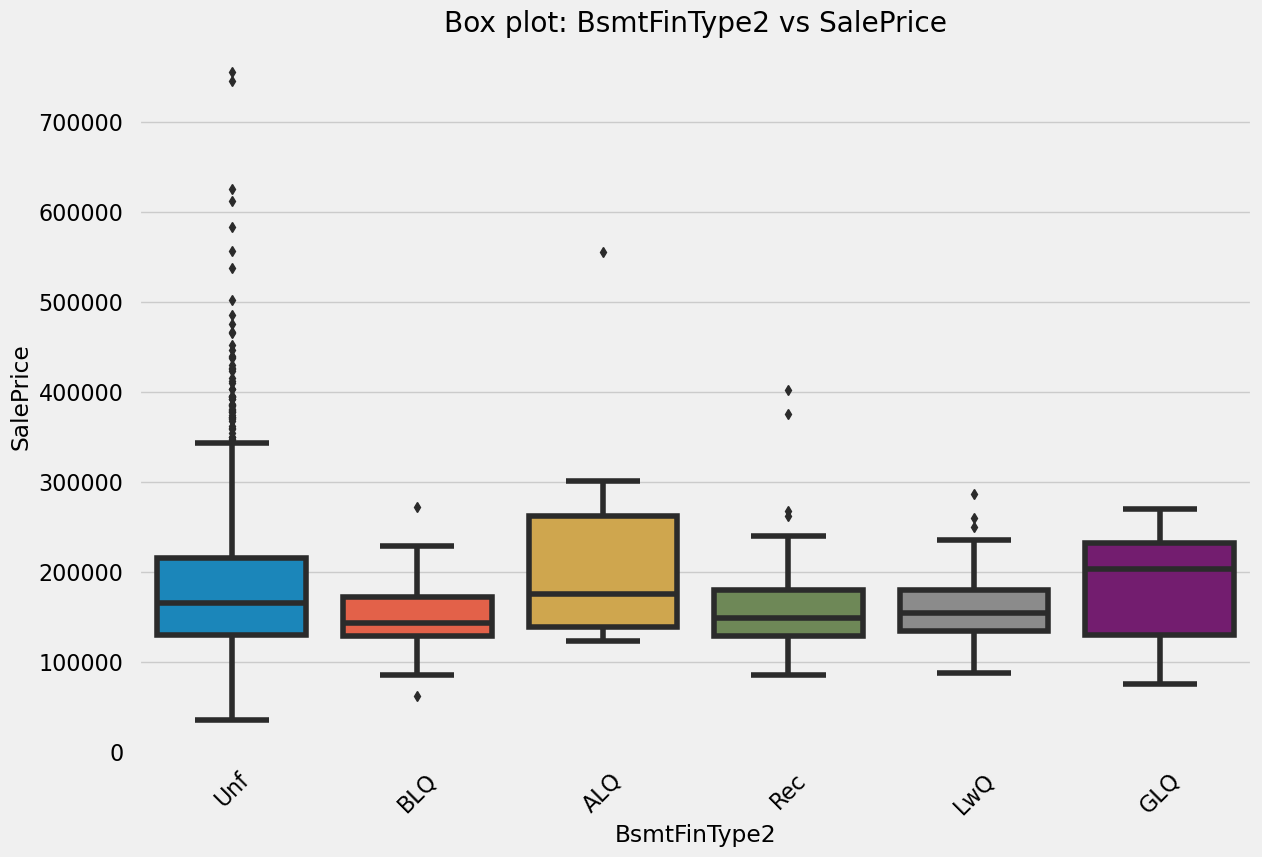

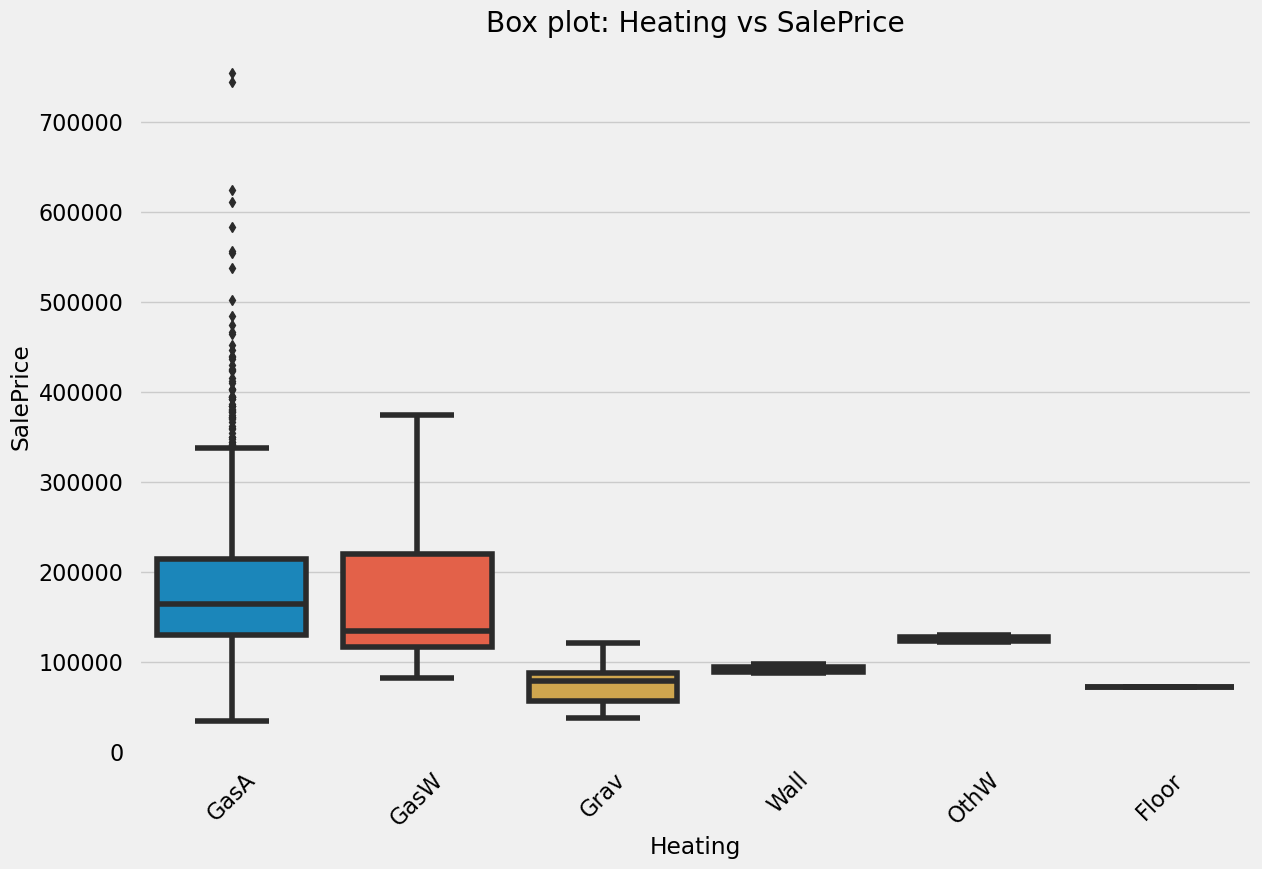

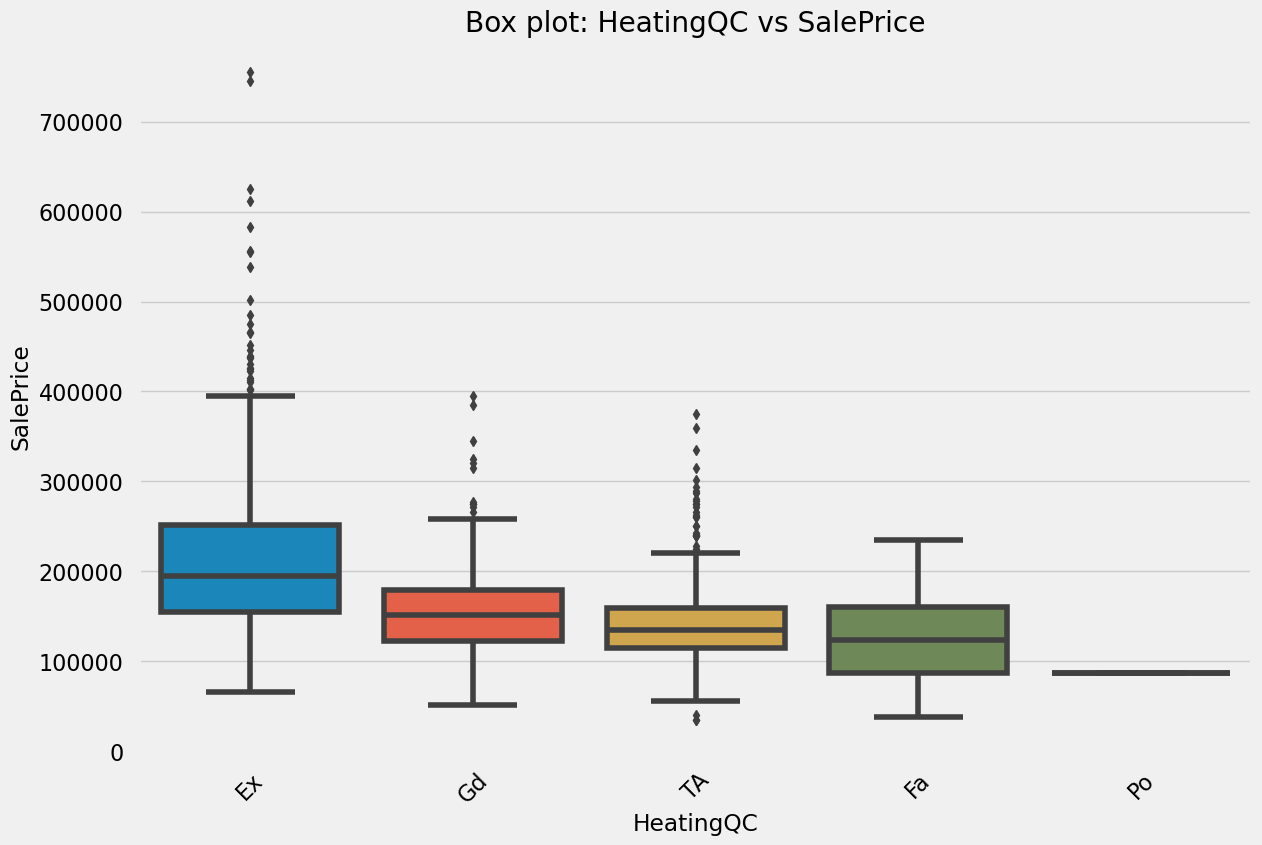

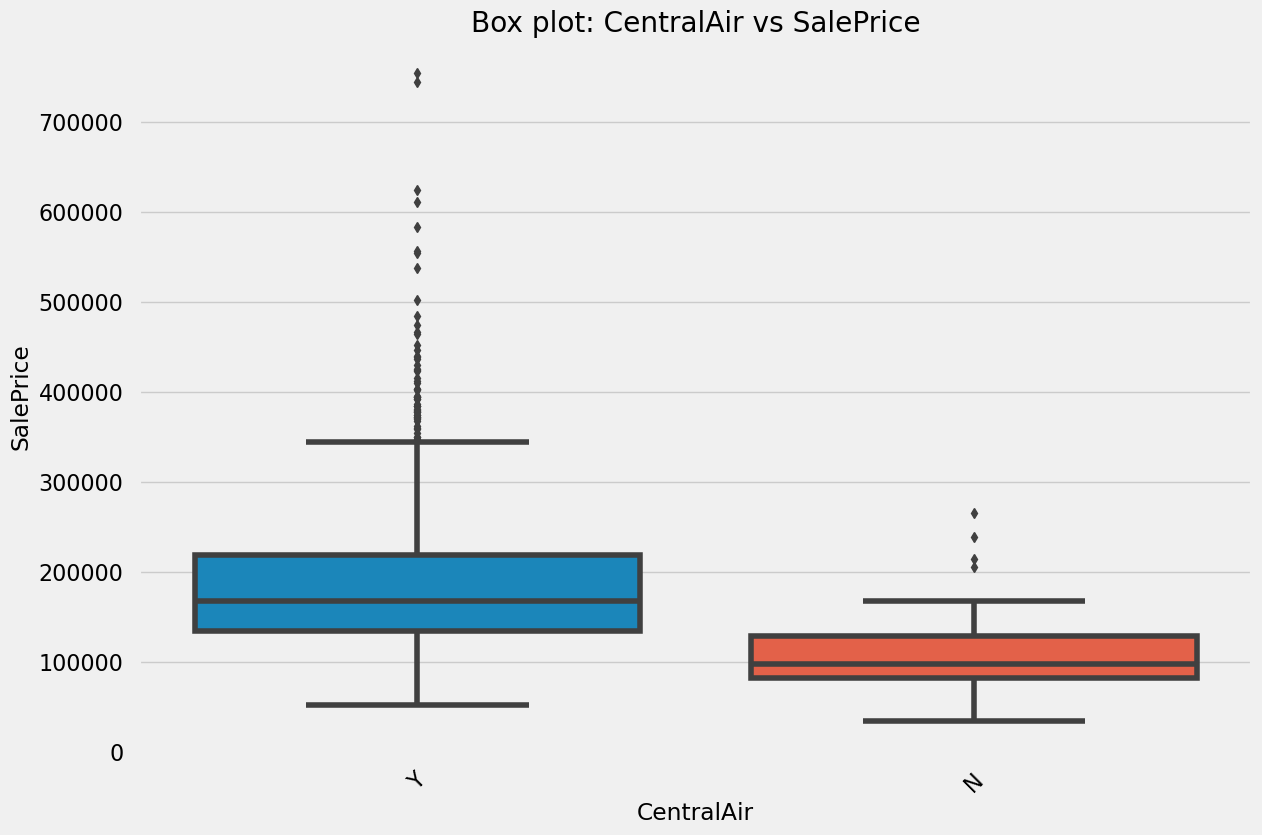

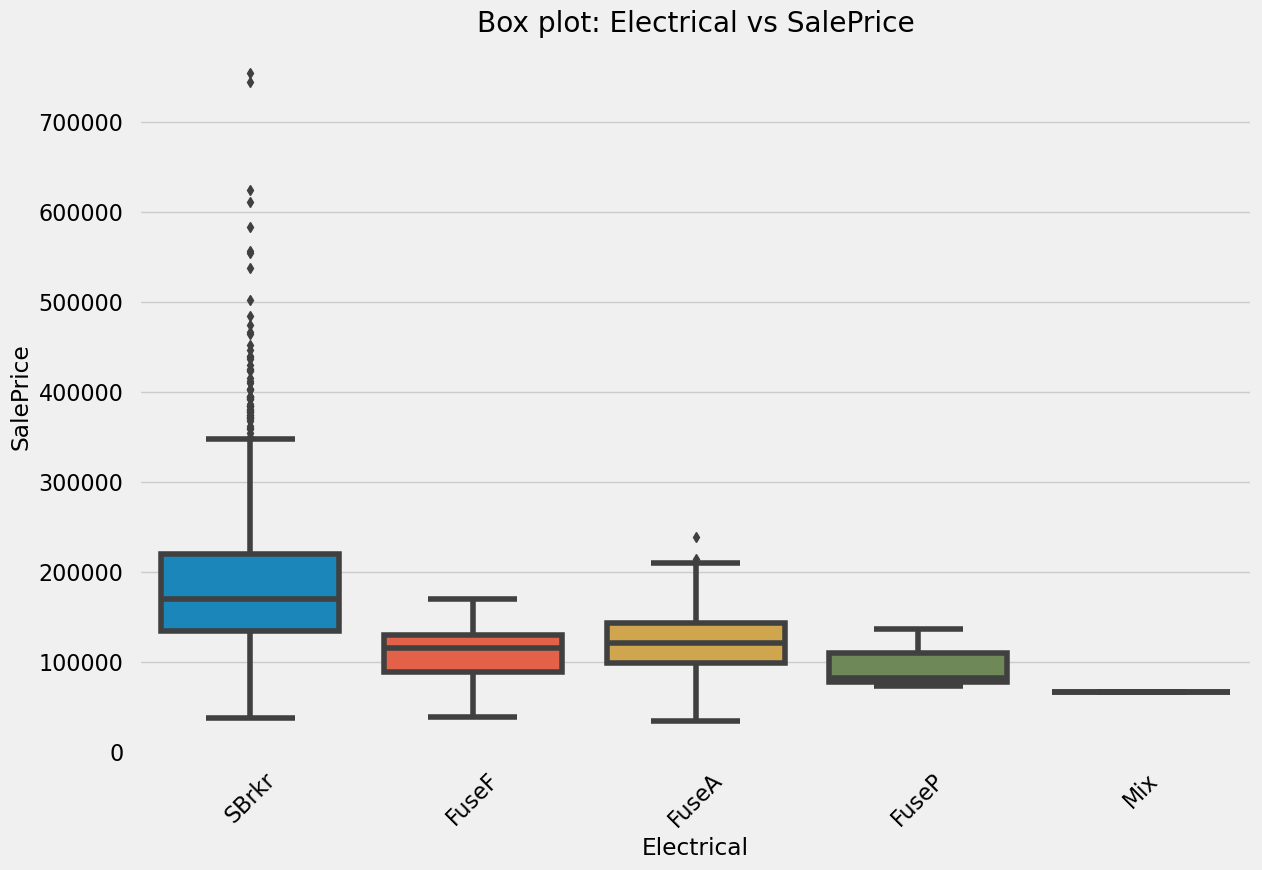

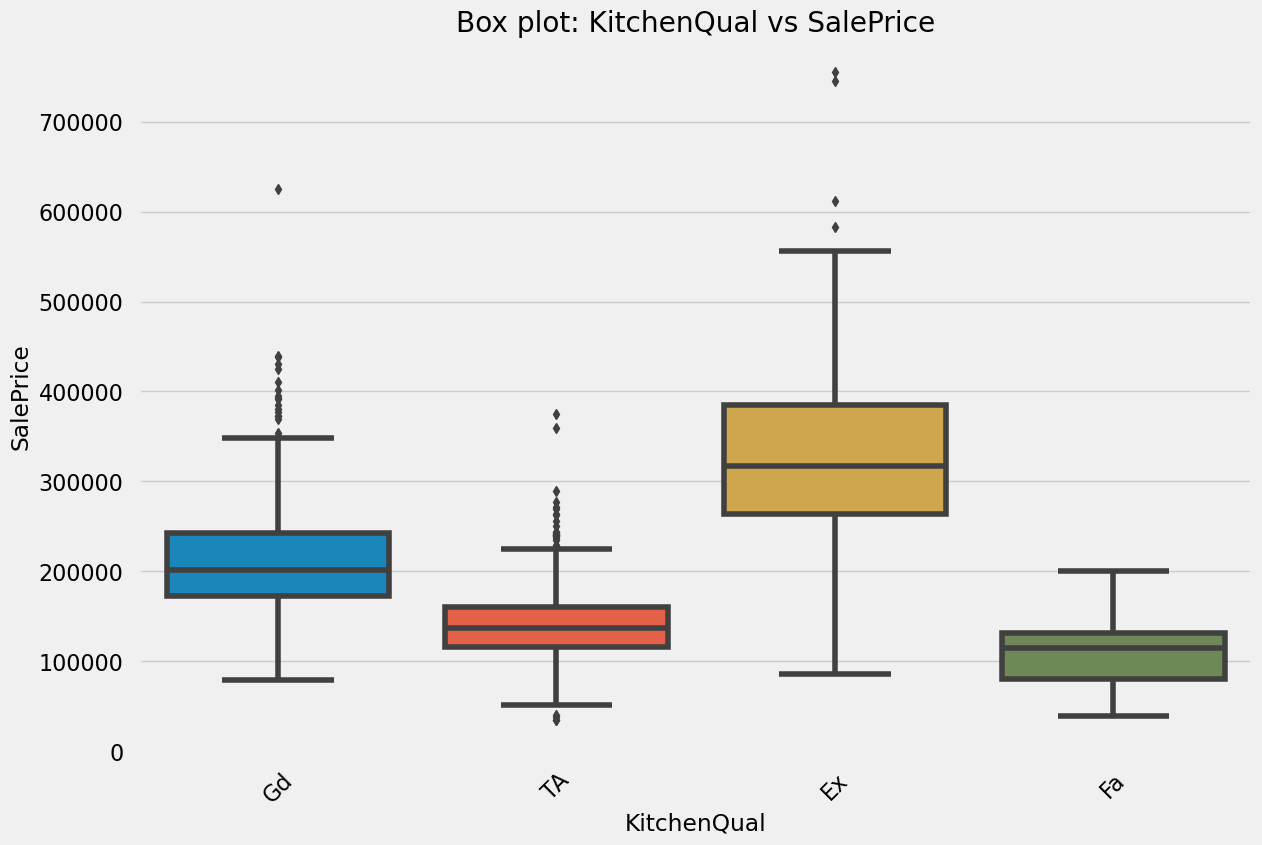

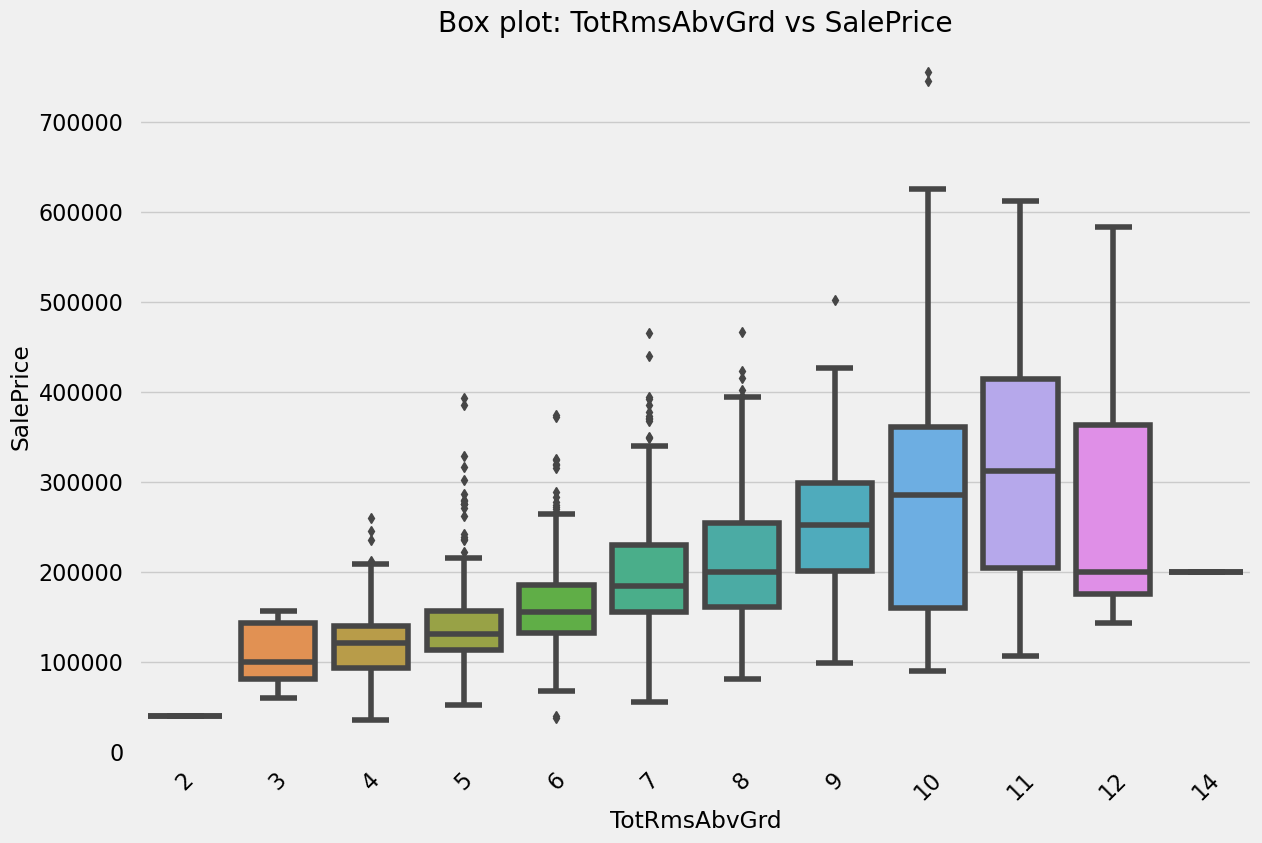

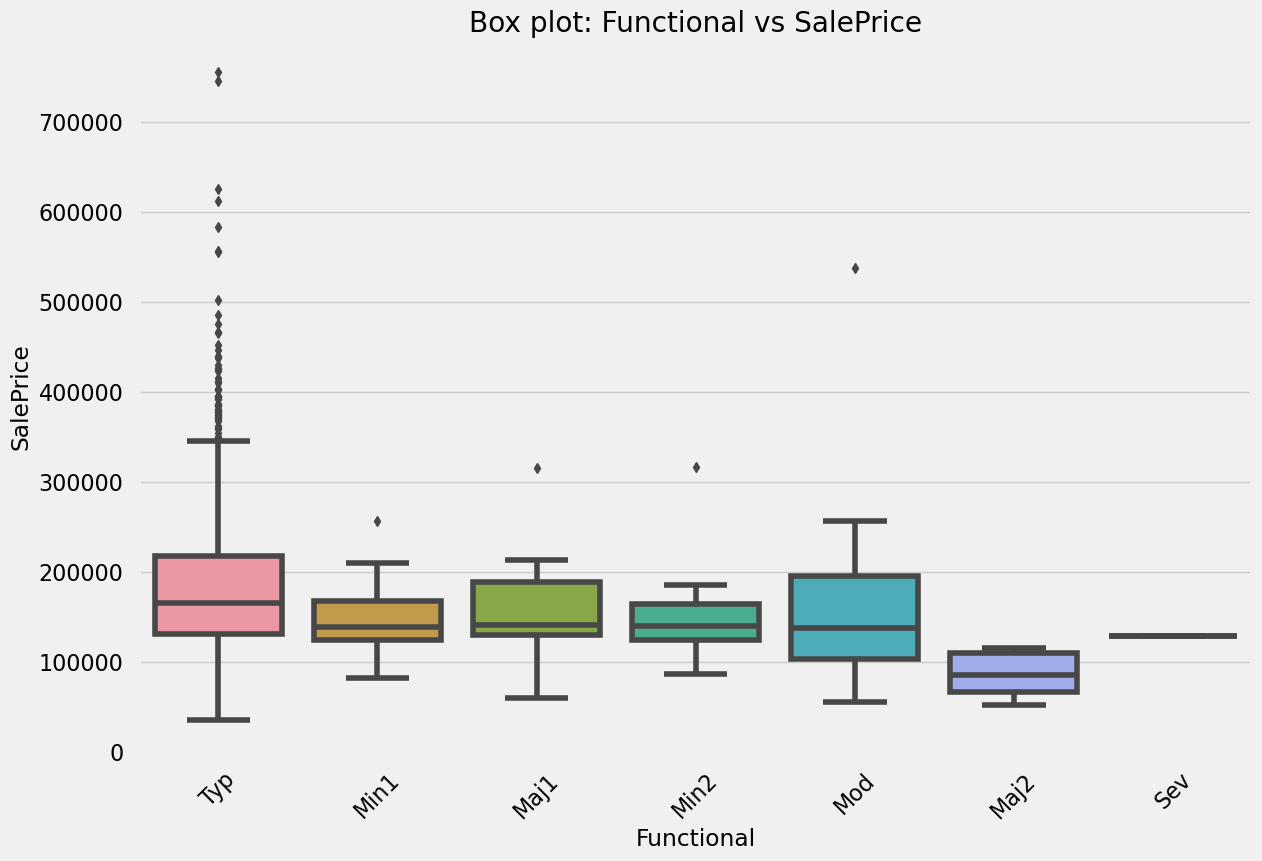

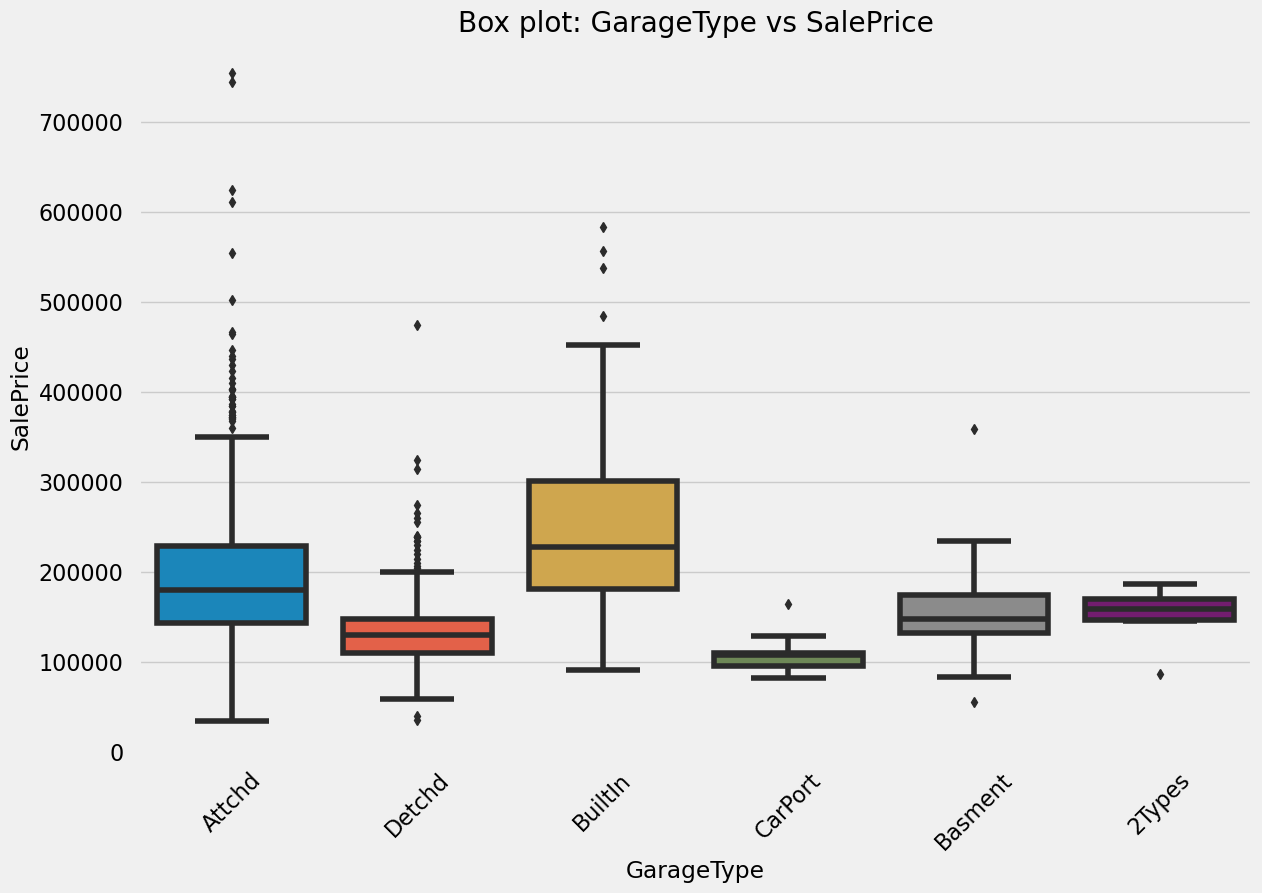

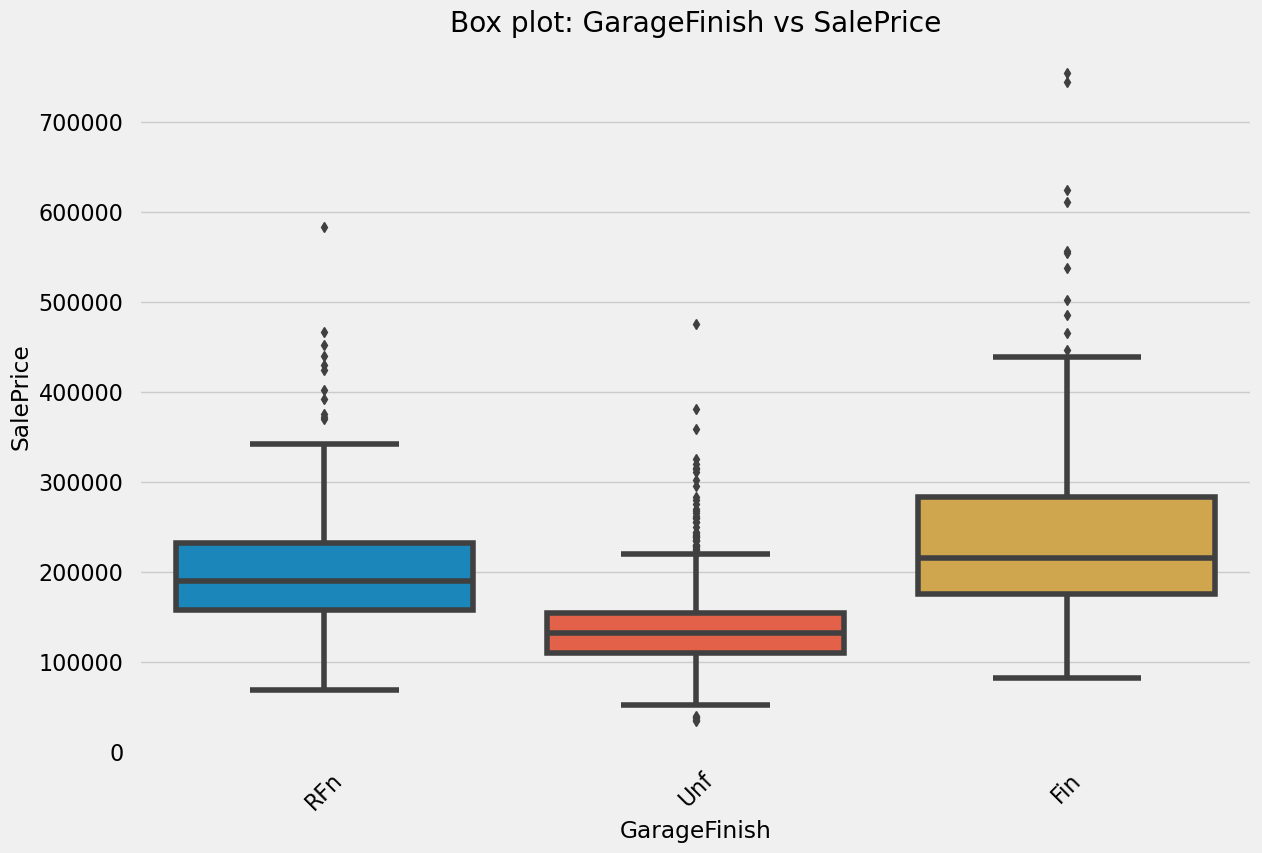

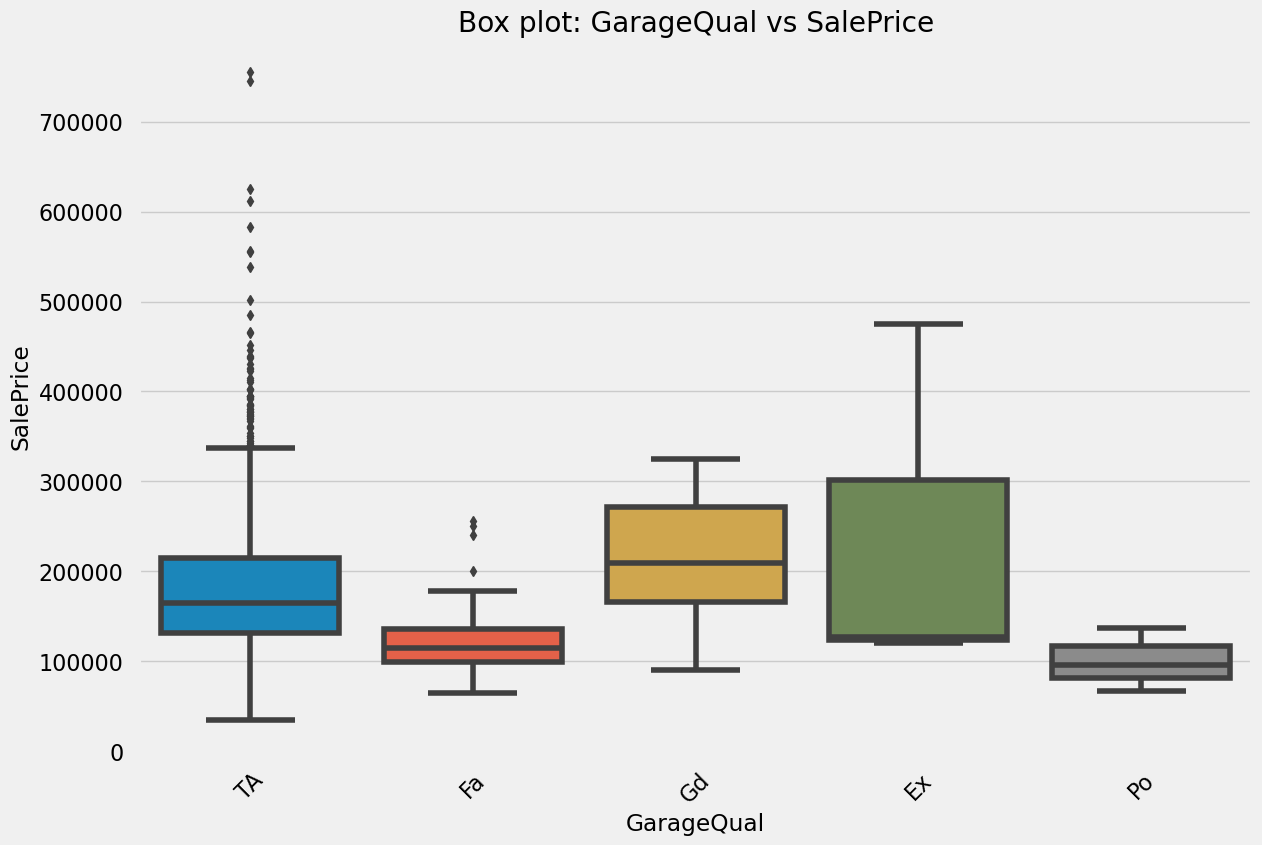

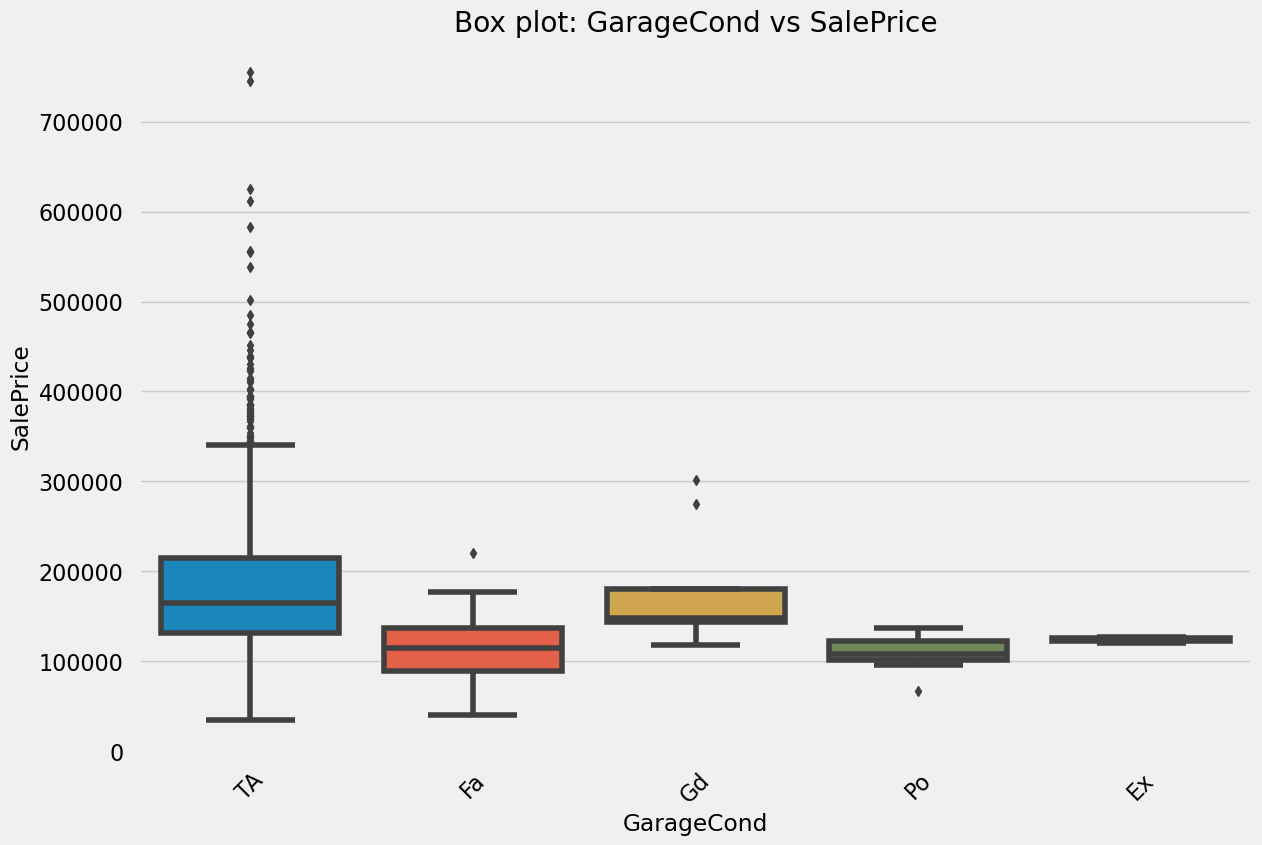

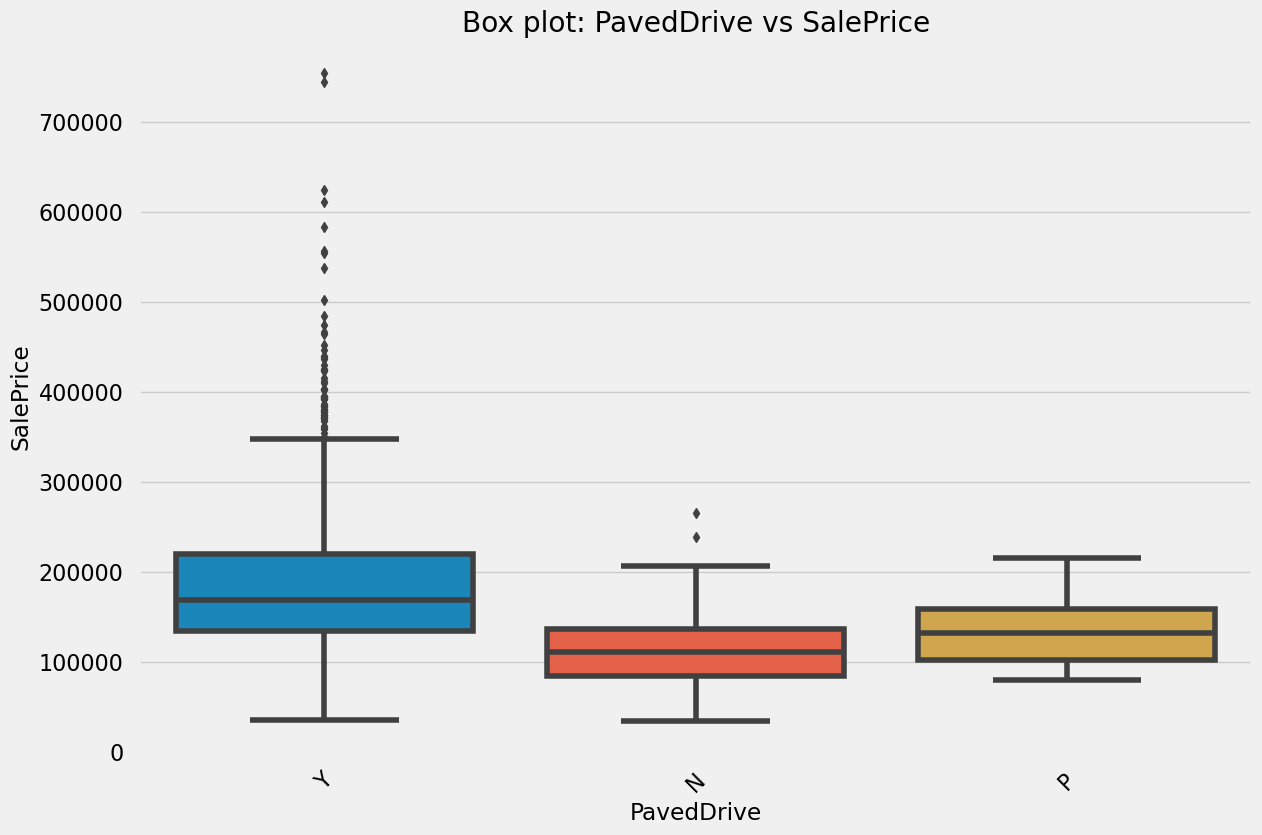

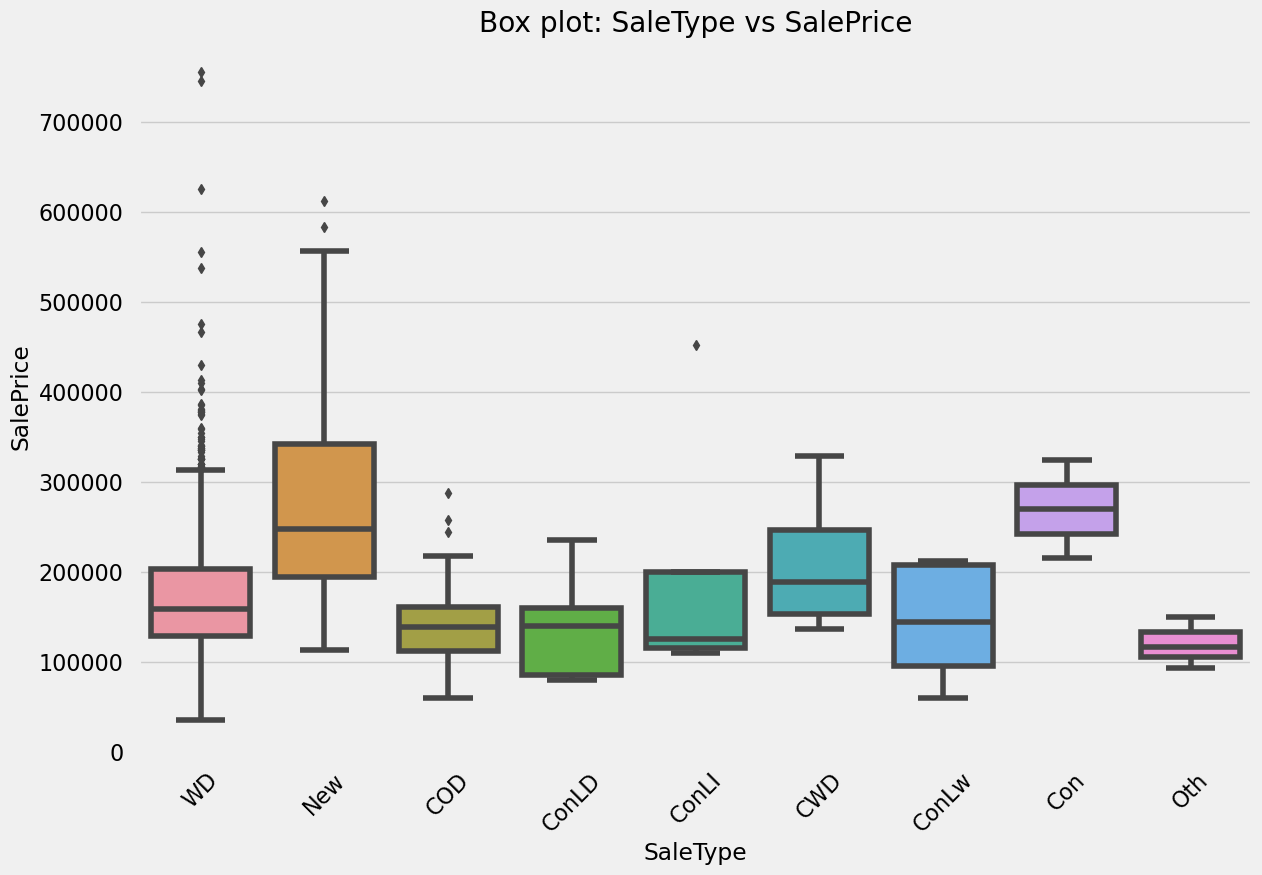

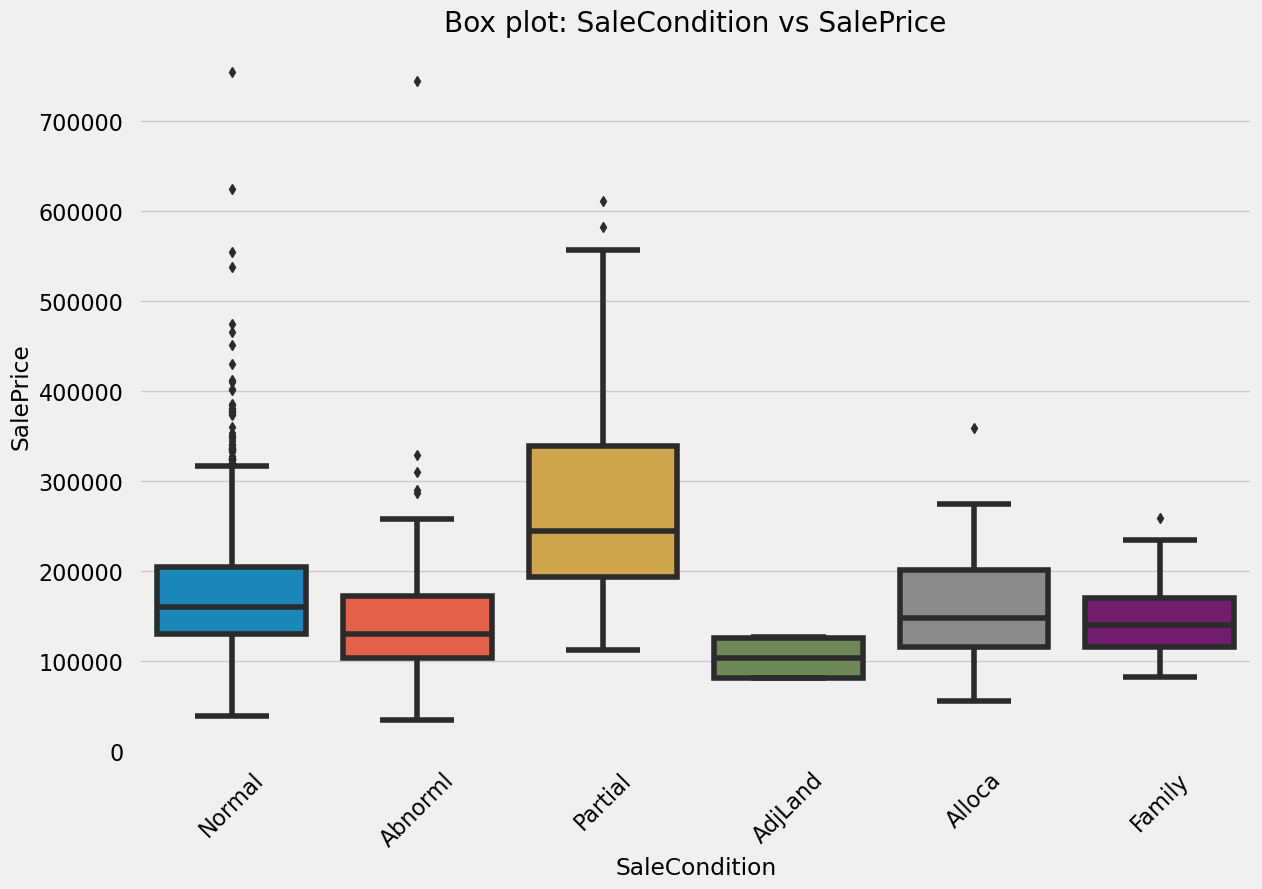

In [115]:
# Bivariate analysis
# Box plot: categorical vs numerical (our target variable 'SalePrice')

for cat_var in categorical_variables:
    plt.figure()
    ax = sns.boxplot(data=houseDF, x=cat_var, y='SalePrice')
    plt.title(f"Box plot: {cat_var} vs SalePrice")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observation: </b><br>
        
- SalePrice fluctuates extensively with 'MSSubClass' (i.e. the type of dwelling involved in the sale),  'Neighborhood', 'Condition1' & 'Condition1' (i.e. proximity to various conditions), HouseStyle (i.e. style of dwelling), roof material 'RoofMatl', exterior coverings ('Exterior1st' and 'Exterior2nd'), the total rooms above grade ('TotRmsAbvGrd'), and the type of sale ('SaleType').
- The median SalePrice is maximum for Floating Village Residential (FV) and mimimum for Commercial (C). Nonetheless, the saleprice distribution reaches the peak in case of Residential Low Density (RL)
- The median SalePrice is higher in case of paved street than in case of graveled street.
- The median SalePrice increases consistently from regular-shaped to moderately iregular-shaped property, decreasing slightly in case of irregular property.
- The median SalePrice is maximum for HLS property-flatness-type at hillsides, wherein there is a significant slope from side to side and mimimum in case of Banked type (BNK) with abrupt  significant rise from street grade to building
- The median SalePrice changes only moderately with the lot configuration and the land slope
- All records exhibit all public utilies except one with only electricity and gas, as conveyed by the 'Utilities' variable. This is also why we could drop the 'Utilities' variable, as it cannot be a significant predictor of the sale price
- The median SalePrice is higher in the cases of Townhouse-End-Unit ('1Fam') and Single-Family-Detached (TwnhsE) building types than those in other types of dwelling
- The median SalePrice fluctuates substantially across different styles of dwelling and is high for one-story and split-level type dwelling 
- While the median SalePrice increases consistently with the 'OverallQual' variable that captures the rates according to the overall material and finish of the house and the kitchen quality ('KitchenQual'), the median sale price does not exhibit a consistent linear increase in the saleprice with the overallcond (i.e. the rate of the overall condition of the house) 
- The median SalePrice is maximum for the shed 'RoofStyle' and minimum for the gambrel 'RoofStyle'
- The median SalePrice is maximum for the stone masonry veneer type ('MasVnrType') and minimum for brick common type ('BrkCmn')
- The median SalePrice is maximum for the excellent quality of the material on the exterior (ExterQual) and minimum for the fair quality, with no records for the poor quality
- The median SalePrice is maximum for the excellent present condition of the material on the exterior (ExterCond) and minimum for the poor present condition of the material on the exterior
- The median SalePrice is maximum for the Poured Contrete-type foundation and minimum for Slab type
- The median SalePrice is maximum for the Excellent (100+ inches) basement height, and minimum for the Fair (70-79 inches) level of 'BsmtQual'. No records in the dataset exhibit <70 inches basement height or any absence of basement
- The median SalePrice is maximum for good basement condition ('BsmtCond'), and minimum for poor basement condition featured by severe cracking, settling, or wetness
- The median SalePrice increases consistently with increasing exposure ('BsmtExposure') such as walkout or garden-level walls
- The median SalePrice exhibits moderate changes with the rating of basement finished area (BsmtFinType1 and BsmtFinType2)
- The median SalePrice is maximum for gas-forced warm-air-furnace-type heating and minimum for gravity furnace
- The median SalePrice is maximum for excellent heating quality ('HeatingQC') and condition and minimum for poor quality
- The median SalePrice is higher in the presence of central air conditioning than without air conditioning
- The median SalePrice is maximum for the electrical system equipped with standard Circuit Breakers & Romex and minimum for mixed-type electrical system
- The median SalePrice does not fluctuate significantly with the home functionality ('Functional')
- The median SalePrice is maximum for the BuiltIn-type garage location ('GarageType') and minimum for Car Port-type garage location
- The median SalePrice is maximum for finished interiors of garage ('GarageFinish') and minimum for unfinished
- The median SalePrice is maximum for good garage quality ('GarageQual') and typical/average garage condition ('GarageCond') and minimum for poor garage quality and fair garage condition
- The median SalePrice is maximum for paved driveway ('PavedDrive') and minimum for dirt/gravel paved driveway 
- The median SalePrice is maximum for partial-type sale condition ('SaleCondition') and minimum for adjoining-land-purchase-type sale condition
    </span>    
</div>

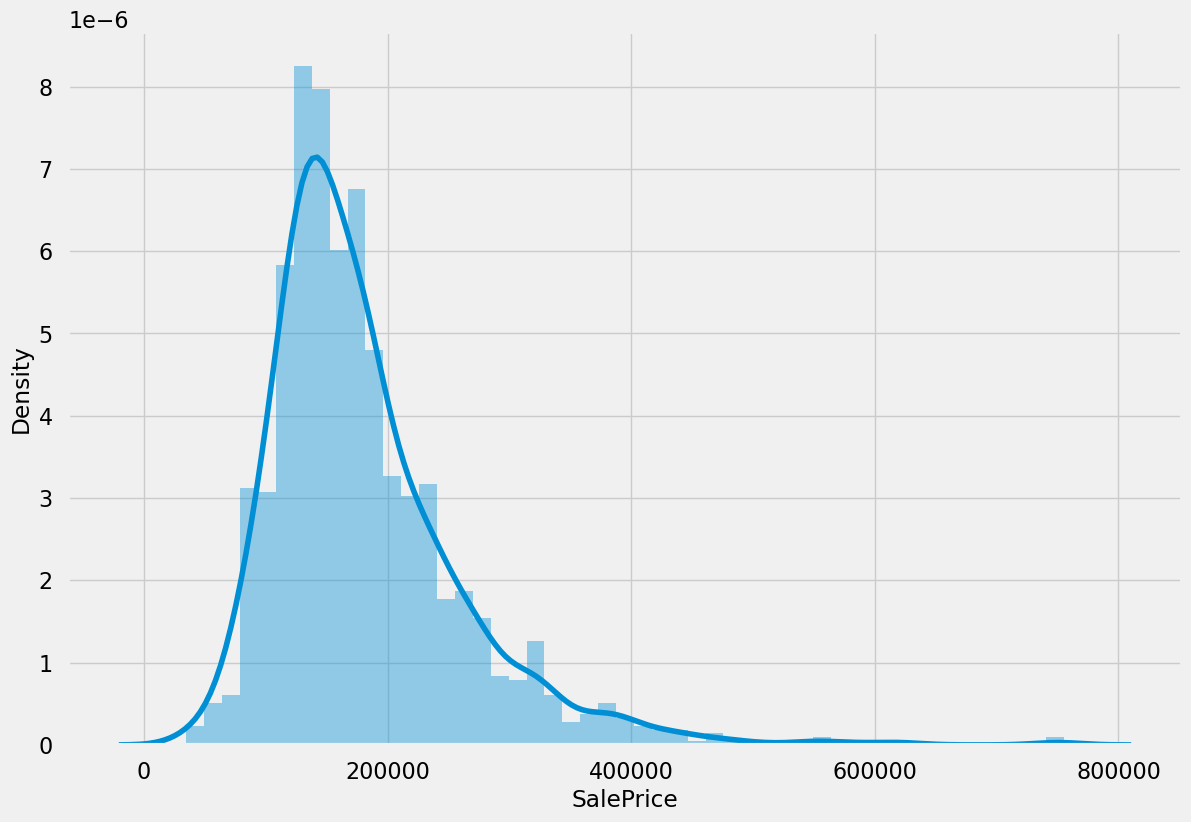

In [50]:
# Plotting distplot for salesprice
sns.distplot(house['SalePrice'])
plt.show()

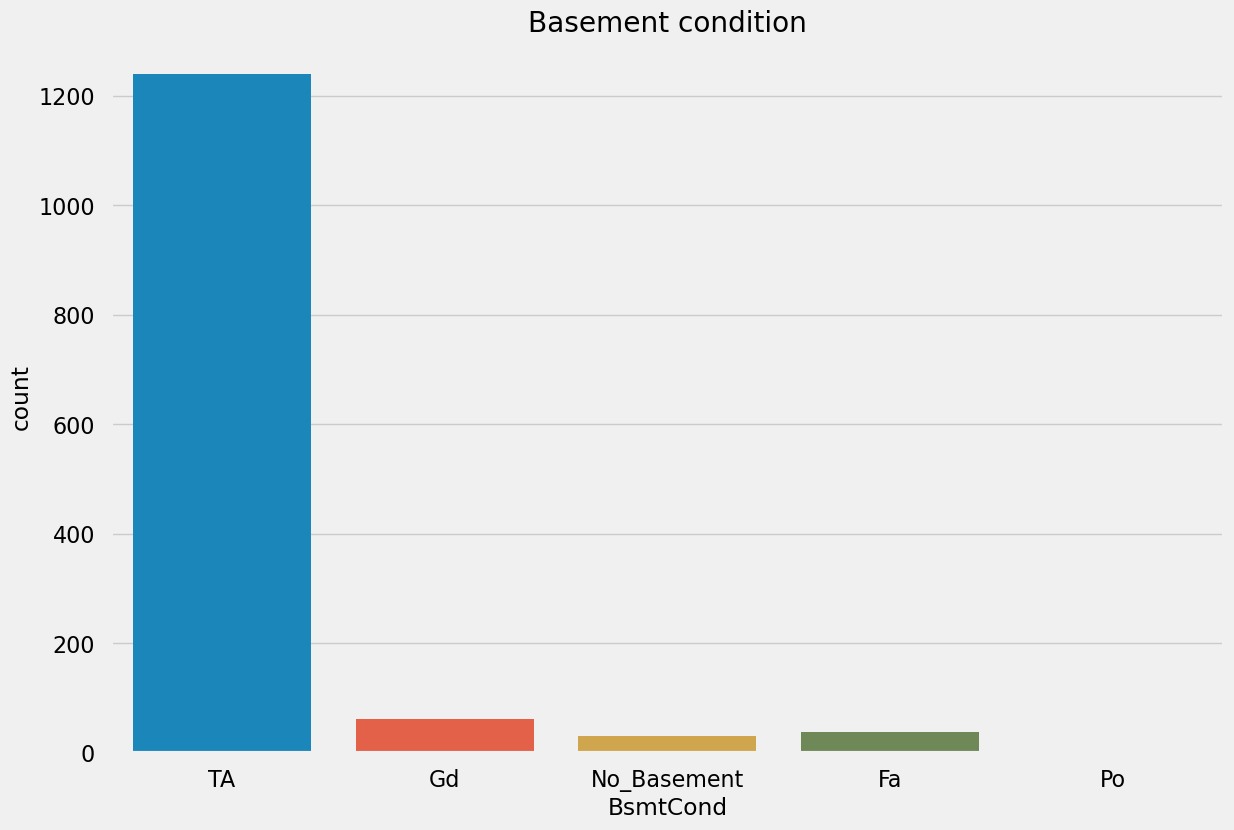

In [52]:
# Checking basement count
sns.countplot(x='BsmtCond',data=houseDF)
plt.title('Basement condition')
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observation: </b><br>
        Typical - Slight dampness allowed has highest basement condition
    </span>    
</div>

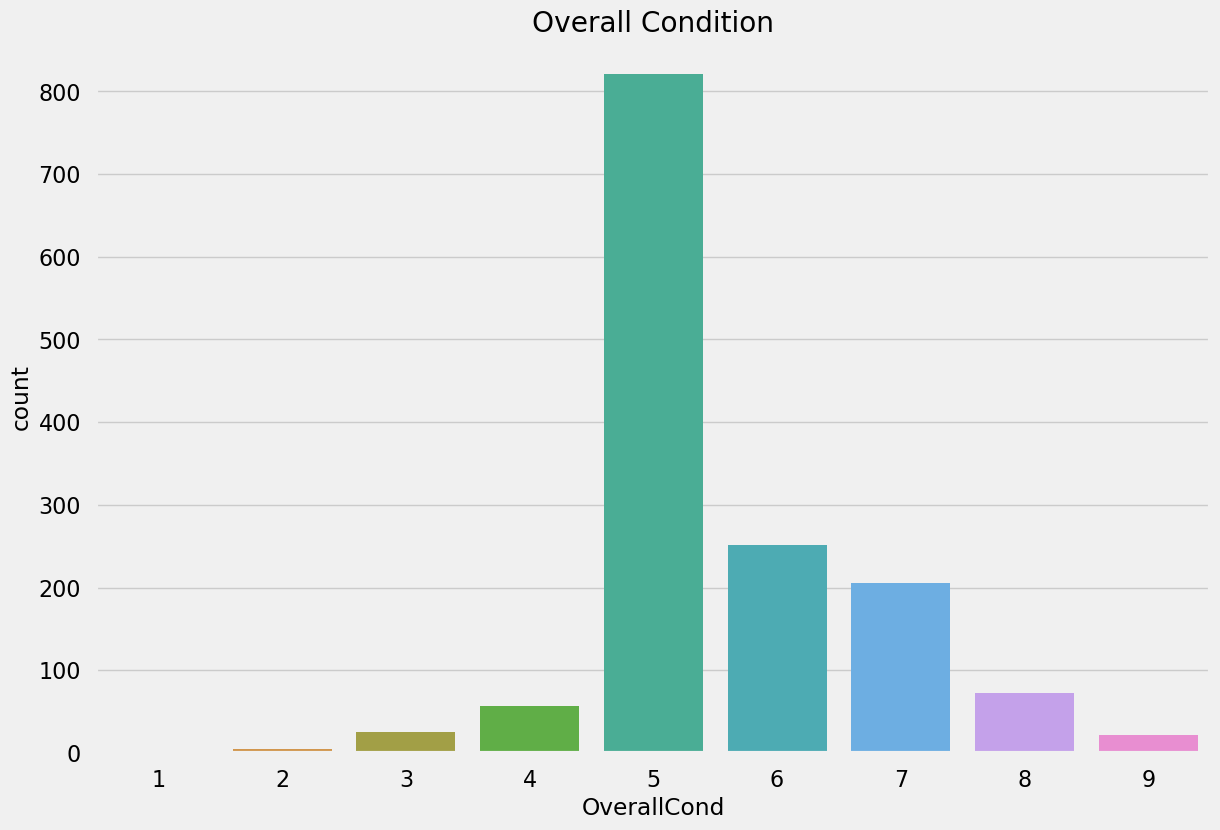

In [53]:
sns.countplot(x='OverallCond',data=house)
plt.title('Overall Condition')
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observation: </b><br>
        5 rating is given to most of the house
    </span>    
</div>

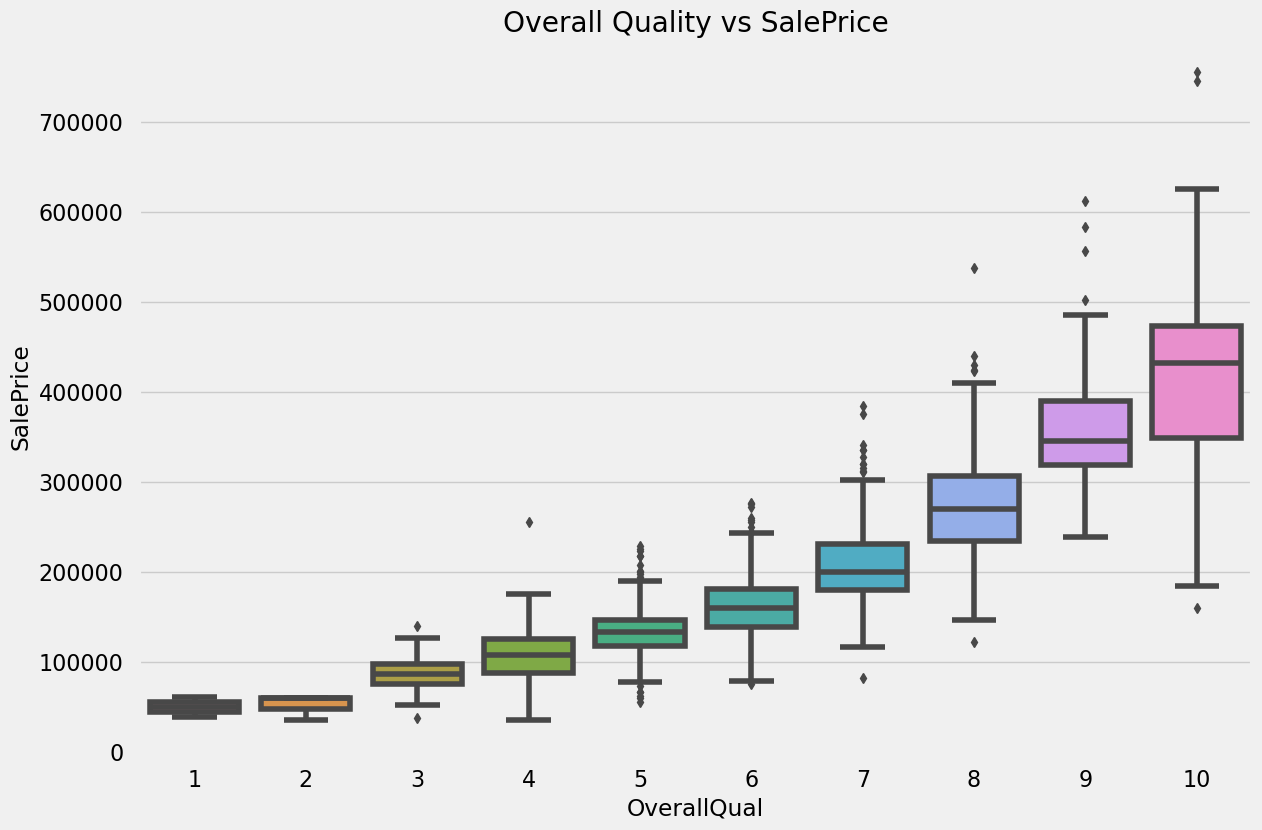

In [56]:
sns.boxplot(x='OverallQual', y='SalePrice', data=house)
plt.title("Overall Quality vs SalePrice")
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observation: </b><br>
        Median value of Sale price increases with increase in Over all Quality of house
    </span>    
</div>

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
             Visualizing the numerical variable
            </span>   
        </font>    
</h3>

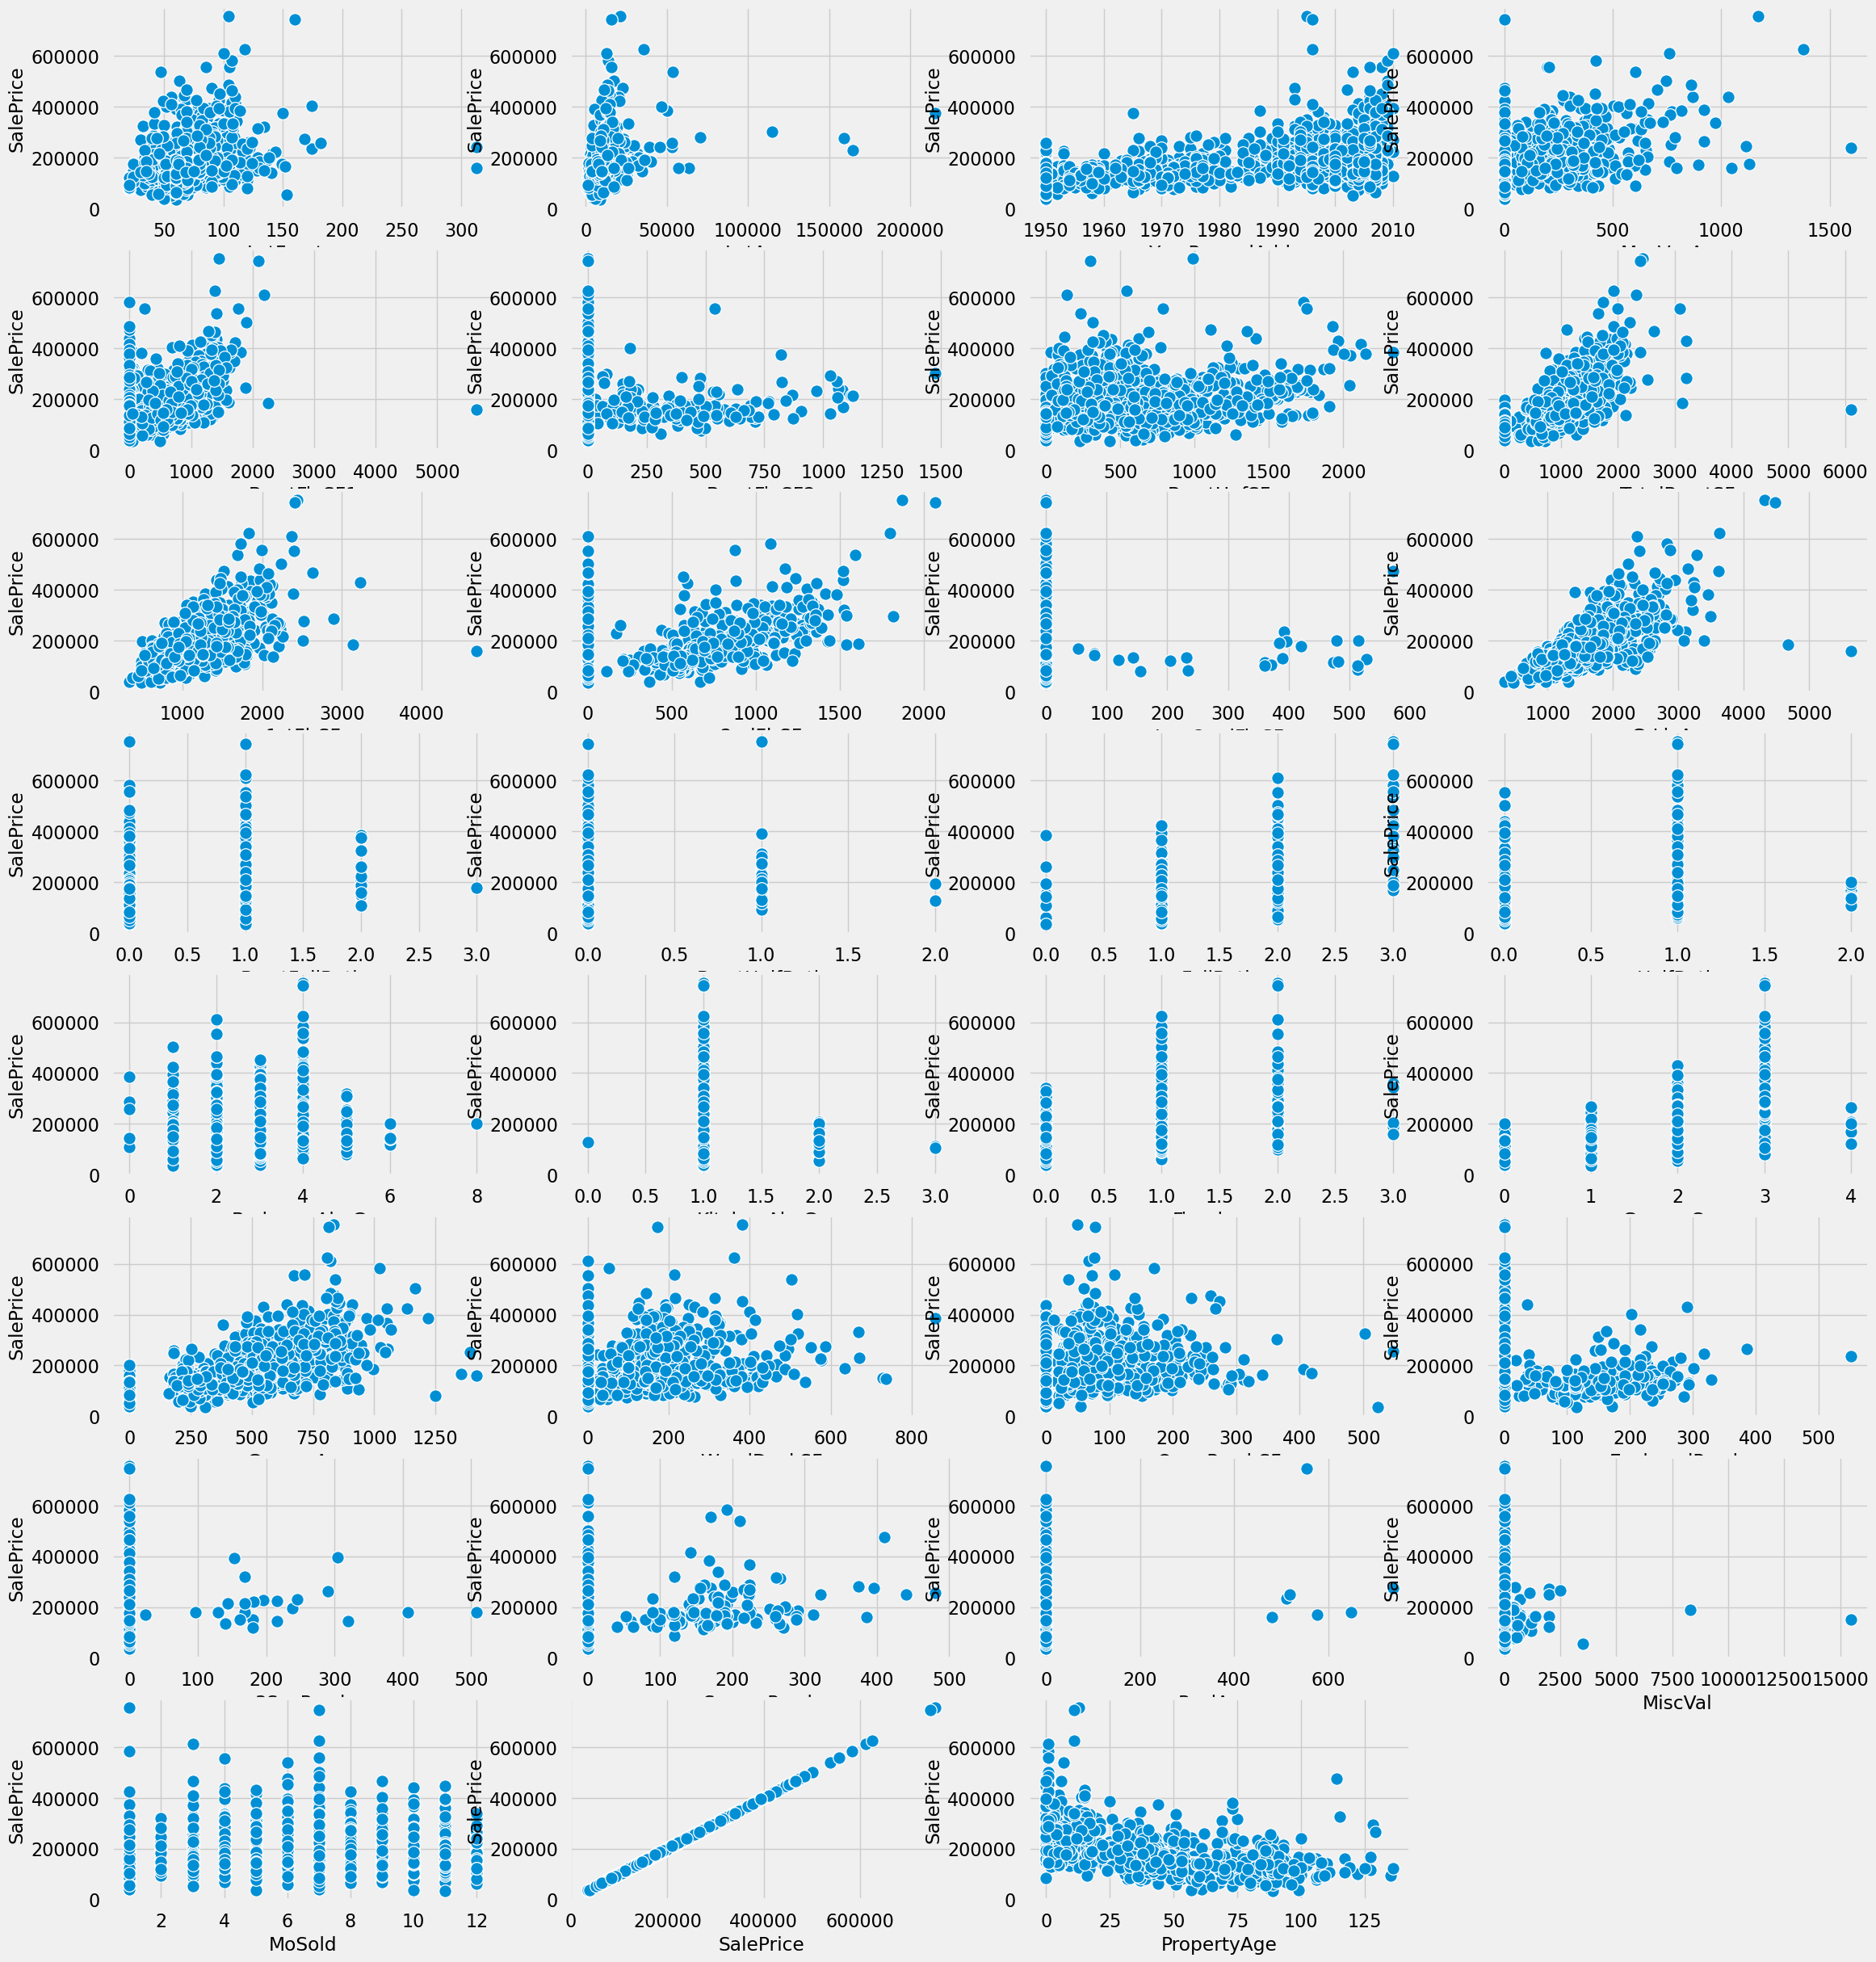

In [118]:
# Check relationship between target variable "Sale Price" and the predictor variables
cols = (houseDF.select_dtypes(include=['float64','int64']))

count = 1

plt.subplots(figsize=(25, 40))
                      
for col in cols.columns:
    plt.subplot(11,4,count)
    sns.scatterplot(x=cols[col], y=cols['SalePrice'])
    
    count+=1
    
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Observation: </b><br>
        
- With increase in OverallQual (Rates the overall material and finish of the house), price of house increases.
- 1stFlrSF(First Floor square feet) and GrLivArea(Above ground living area square feet) showing correlation towards right
- Price of the house increases with increase in GarageCars (Size of garage in car capacity)
- Other variables are too scattered and hence can be understood during further analysis
    </span>    
</div>

<a id="clean"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            6. Data Preparation
            </span>   
        </font>    
</h2>

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
             Handling of Categorical Variables
            </span>   
        </font>    
</h3>

In [164]:
# Separating categorical variables into two lists based on the number of unique values

categorical_variables_with_two_levels = []
categorical_variables_with_more_than_two_levels = []

for var in categorical_variables:
    num_unique_values = len(houseDF[var].unique())
    if num_unique_values == 2:
        categorical_variables_with_two_levels.append(var)
    elif num_unique_values > 2:
        categorical_variables_with_more_than_two_levels.append(var)

print("Categorical variables with two levels:")
print(categorical_variables_with_two_levels)

print("\nCategorical variables with more than two levels:")
print(categorical_variables_with_more_than_two_levels)

Categorical variables with two levels:
['Street', 'Utilities', 'CentralAir']

Categorical variables with more than two levels:
['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [165]:
# Mapping the levels of binary catagorical variables to 0 and 1
houseDF['Street'] = houseDF['Street'].map({'Pave': 1, 'Grvl': 0})
houseDF['Utilities'] = houseDF['Utilities'].map({'AllPub': 1, 'NoSeWa': 0})
houseDF['CentralAir'] = houseDF['CentralAir'].map({'Y': 1, 'N': 0})

In [166]:
# Encoding non-binary catagorical variables using dummy variables
dummy_df = pd.get_dummies(houseDF[categorical_variables_with_more_than_two_levels], drop_first=True) #  The information that is eliminated by dropping the first column is already implicit in the combination of the remaining n-1 column values 
houseDF = pd.concat([houseDF, dummy_df], axis = 1)  # Adding the encoded features to the original dataframe df
houseDF.drop(categorical_variables_with_more_than_two_levels, axis=1, inplace=True) # As we have now created the dummies for the non-binary catagorical variables, we can drop the categorical_variables_with_more_than_two_levels 
houseDF.head()

LotFrontage  LotArea  Street  Utilities  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  PropertyAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  Condition2_RRNn  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl  OverallQual_2  OverallQual_3  OverallQual_4  OverallQual_5  OverallQual_6  OverallQual_7  OverallQual_8  OverallQual_9  OverallQual_10  OverallCond_2  OverallCond_3  OverallCond_4  OverallCond_5  OverallCond_6  OverallCond_7  OverallCond_8  OverallCond_9  RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  RoofMatl_Roll  RoofMatl_Tar&Grv  RoofMatl_WdShake  RoofMatl_WdShngl  Exterior1st_AsphShn  Exterior1st_BrkComm  Exterior1st_BrkFace  Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_HdBoard  Exterior1st_ImStucc  Exterior1st_MetalSd  Exterior1st_Plywood  Exterior1st_Stone  Exterior1st_Stucco  Exterior1st_VinylSd  Exterior1st_Wd Sdng  Exterior1st_WdShing  Exterior2nd_AsphShn  Exterior2nd_Brk Cmn  Exterior2nd_BrkFace  Exterior2nd_CBlock  Exterior2nd_CmentBd  Exterior2nd_HdBoard  Exterior2nd_ImStucc  Exterior2nd_MetalSd  Exterior2nd_Other  Exterior2nd_Plywood  Exterior2nd_Stone  Exterior2nd_Stucco  Exterior2nd_VinylSd  Exterior2nd_Wd Sdng  Exterior2nd_Wd Shng  MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  ExterQual_Fa  ExterQual_Gd  ExterQual_TA  ExterCond_Fa  ExterCond_Gd  ExterCond_Po  ExterCond_TA  Foundation_CBlock  Foundation_PConc  Foundation_Slab  Foundation_Stone  Foundation_Wood  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  BsmtCond_Gd  BsmtCond_Po  BsmtCond_TA  BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Rec  BsmtFinType1_Unf  BsmtFinType2_BLQ  BsmtFinType2_GLQ  BsmtFinType2_LwQ  BsmtFinType2_Rec  BsmtFinType2_Unf  Heating_GasA  Heating_GasW  Heating_Grav  Heating_OthW  Heating_Wall  HeatingQC_Fa  HeatingQC_Gd  HeatingQC_Po  HeatingQC_TA  Electrical_FuseF  Electrical_FuseP  Electrical_Mix  Electrical_SBrkr  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  TotRmsAbvGrd_3  TotRmsAbvGrd_4  TotRmsAbvGrd_5  TotRmsAbvGrd_6  TotRmsAbvGrd_7  TotRmsAbvGrd_8  TotRmsAbvGrd_9  TotRmsAbvGrd_10  TotRmsAbvGrd_11  TotRmsAbvGrd_12  TotRmsAbvGrd_14  Functional_Maj2  Functional_Min1  Functional_Min2  Functional_Mod  Functional_Sev  Functional_Typ  GarageType_Attchd  GarageType_Basme

In [167]:
houseDF.shape

(1460, 269)

#### Dividing into X (independent variables) and Y (dependent variable) sets for model building

In [168]:
y = houseDF.pop('SalePrice')   # 'SalePrice' is our target variable
X = houseDF
numeric_variables.remove('SalePrice')  # Updating the list of numeric variables in the dataframe

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
             Data splitting into Test and Train datasets
            </span>   
        </font>    
</h3>

- The data is split into 2 parts:
  - Train Datasets (on which model will be build and is ~70% of the total data
  - Test Dataset (on which build model will be tested and is ~30% of the total data

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state =42)
print ("Shape of X test dataset ", X_test.shape)
print ("Shape of X train dataset ", X_train.shape)
print ("Shape of Y test dataset ", y_test.shape)
print ("Shape of Y train dataset ", y_train.shape)

Shape of X test dataset  (438, 268)
Shape of X train dataset  (1021, 268)
Shape of Y test dataset  (438,)
Shape of Y train dataset  (1021,)


<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
             Scaling numeric features
            </span>   
        </font>    
</h3>

In [170]:
print (numeric_variables)
# Checking the range of variables to see if scaling is required
houseDF[numeric_variables].describe()

['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'PropertyAge']


LotFrontage        LotArea  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr   Fireplaces   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold  PropertyAge
count  1460.000000    1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000
mean     69.863699   10516.828082   1984.865753   103.117123   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575     0.613014     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918    36.547945
std      22.027677    9981.264932     20.645407   180.731373   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338     0.644666     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626    30.250152
min      21.000000    1300.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000     0.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000     0.000000
25%      60.000000    7553.500000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000     0.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000     8.000000
50%      69.000000    9478.500000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000     1.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000    35.000000
75%      79.000000   11601.500000   2004.000000   164.250000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000     1.000000     2.000000   576.000000   168.000000    68.000000       0.000000     0.000000     0.000000     0.000000      0.000000     8.000000    54.000000
max     313.000000  215245.000000   2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  6110.000000  4692.000000  2065.000000    572.000000  5642.000000      3.000000      2.000000     3.000000     2.000000      8.000000      3.000000     3.000000     4.000000  1418.000000   857.000000   547.000000     552.000000   508.000000   480.000000   738.000000  15500.000000    12.000000   136.000000

- It would be convenient at the time of model evaluation if the units of the coefficients obtained are all on the same scale.
- Therefore, we proceed with rescaling the numerical features, excluding the yes-no/0-1 and dummy variables (as we would otherwise lose their interpretability).

In [171]:
scaler = MinMaxScaler()   #instantiating an object of the MinMaxScaler class 
X_train[numeric_variables] = scaler.fit_transform(X_train[numeric_variables])
X_test[numeric_variables] = scaler.transform(X_test[numeric_variables])
X_train.head()

LotFrontage   LotArea  Street  Utilities  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  PropertyAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  Condition2_RRNn  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl  OverallQual_2  OverallQual_3  OverallQual_4  OverallQual_5  OverallQual_6  OverallQual_7  OverallQual_8  OverallQual_9  OverallQual_10  OverallCond_2  OverallCond_3  OverallCond_4  OverallCond_5  OverallCond_6  OverallCond_7  OverallCond_8  OverallCond_9  RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  RoofMatl_Roll  RoofMatl_Tar&Grv  RoofMatl_WdShake  RoofMatl_WdShngl  Exterior1st_AsphShn  Exterior1st_BrkComm  Exterior1st_BrkFace  Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_HdBoard  Exterior1st_ImStucc  Exterior1st_MetalSd  Exterior1st_Plywood  Exterior1st_Stone  Exterior1st_Stucco  Exterior1st_VinylSd  Exterior1st_Wd Sdng  Exterior1st_WdShing  Exterior2nd_AsphShn  Exterior2nd_Brk Cmn  Exterior2nd_BrkFace  Exterior2nd_CBlock  Exterior2nd_CmentBd  Exterior2nd_HdBoard  Exterior2nd_ImStucc  Exterior2nd_MetalSd  Exterior2nd_Other  Exterior2nd_Plywood  Exterior2nd_Stone  Exterior2nd_Stucco  Exterior2nd_VinylSd  Exterior2nd_Wd Sdng  Exterior2nd_Wd Shng  MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  ExterQual_Fa  ExterQual_Gd  ExterQual_TA  ExterCond_Fa  ExterCond_Gd  ExterCond_Po  ExterCond_TA  Foundation_CBlock  Foundation_PConc  Foundation_Slab  Foundation_Stone  Foundation_Wood  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  BsmtCond_Gd  BsmtCond_Po  BsmtCond_TA  BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_Rec  BsmtFinType1_Unf  BsmtFinType2_BLQ  BsmtFinType2_GLQ  BsmtFinType2_LwQ  BsmtFinType2_Rec  BsmtFinType2_Unf  Heating_GasA  Heating_GasW  Heating_Grav  Heating_OthW  Heating_Wall  HeatingQC_Fa  HeatingQC_Gd  HeatingQC_Po  HeatingQC_TA  Electrical_FuseF  Electrical_FuseP  Electrical_Mix  Electrical_SBrkr  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  TotRmsAbvGrd_3  TotRmsAbvGrd_4  TotRmsAbvGrd_5  TotRmsAbvGrd_6  TotRmsAbvGrd_7  TotRmsAbvGrd_8  TotRmsAbvGrd_9  TotRmsAbvGrd_10  TotRmsAbvGrd_11  TotRmsAbvGrd_12  TotRmsAbvGrd_14  Functional_Maj2  Functional_Min1  Functional_Min2  Functional_Mod  Functional_Sev  Functional_Typ  GarageType_Attchd  GarageType_Basment  Gara

In [172]:
X_train[numeric_variables].describe()

LotFrontage      LotArea  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr   Fireplaces   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea      MiscVal       MoSold  PropertyAge
count  1021.000000  1021.000000   1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   1021.000000  1021.000000   1021.000000   1021.000000  1021.000000  1021.000000   1021.000000   1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000    1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000
mean      0.168274     0.044181      0.578926     0.076145     0.079131     0.037631     0.244194     0.173398     0.191684     0.171470      0.010091     0.225173      0.141038      0.029873     0.527261     0.187561      0.361410      0.522527     0.204375     0.445642     0.336348     0.113774     0.090593       0.038631     0.007648     0.032460     0.003721     0.005013     0.487668     0.270979
std       0.078928     0.052972      0.345760     0.125276     0.081500     0.134231     0.190717     0.073246     0.089388     0.213657      0.083868     0.100081      0.173147      0.120615     0.181503     0.247204      0.101379      0.106098     0.216977     0.182529     0.147015     0.153732     0.126570       0.111523     0.064101     0.117649     0.053782     0.040759     0.241035     0.226278
min       0.000000     0.000000      0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000      0.000000     0.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000     0.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.133562     0.029339      0.266667     0.000000     0.000000     0.000000     0.095462     0.130115     0.127352     0.000000      0.000000     0.152223      0.000000      0.000000     0.333333     0.000000      0.250000      0.500000     0.000000     0.250000     0.246827     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000     0.000000     0.363636     0.051471
50%       0.164384     0.038795      0.733333     0.000000     0.069100     0.000000     0.206764     0.162684     0.174851     0.000000      0.000000     0.214959      0.000000      0.000000     0.666667     0.000000      0.375000      0.500000     0.333333     0.500000     0.341326     0.000000     0.049360       0.000000     0.000000     0.000000     0.000000     0.000000     0.454545     0.257353
75%       0.198630     0.048611      0.900000     0.123367     0.128278     0.000000     0.345890     0.210802     0.242772     0.354479      0.000000     0.275245      0.333333      0.000000     0.666667     0.500000      0.375000      0.500000     0.333333     0.500000     0.406206     0.199533     0.133455       0.000000     0.000000     0.000000     0.000000     0.000000     0.636364     0.404412
max       1.000000     1.000000      1.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000      1.000000     1.000000      1.000000      1.000000     1.000000     1.000000      1.000000      1.000000     1.000000     1.000000     1.000000     1.000000     1.000000       1.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000

- We can see that the scaled variables now range between 0 and 1

In [173]:
X_train.info(verbose=True)   # Ensuring that all are numeric-type features prior to model building

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 135 to 860
Data columns (total 268 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    LotFrontage            float64
 1    LotArea                float64
 2    Street                 int64  
 3    Utilities              int64  
 4    YearRemodAdd           float64
 5    MasVnrArea             float64
 6    BsmtFinSF1             float64
 7    BsmtFinSF2             float64
 8    BsmtUnfSF              float64
 9    TotalBsmtSF            float64
 10   CentralAir             int64  
 11   1stFlrSF               float64
 12   2ndFlrSF               float64
 13   LowQualFinSF           float64
 14   GrLivArea              float64
 15   BsmtFullBath           float64
 16   BsmtHalfBath           float64
 17   FullBath               float64
 18   HalfBath               float64
 19   BedroomAbvGr           float64
 20   KitchenAbvGr           float64
 21   Fireplaces             float64
 22

<a id="clean"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            7. Model Building
            </span>   
        </font>    
</h2>

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
             Recursive Feature Selection-based Linear Regression Model Building
            </span>   
        </font>    
</h3>

In [174]:
lm = LinearRegression()   # creating an instance of the LinearRegression class
lm.fit(X_train, y_train)  # fitting the model to the training data. (The fit method is used to train the model by finding the optimal coefficients that minimize the sum of squared residuals between the predicted values and the actual target values.)

# running RFE seeking 14 selected output variables
rfe = RFE(estimator=lm, n_features_to_select=14)     # creating an instance of the RFE class         
rfe = rfe.fit(X_train, y_train)   # fitting the RFE model to the training data (The fit method is called to perform the feature selection process. It uses the specified linear regression model (lm) to train and evaluate the importance of each feature based on their coefficients.)

In [175]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

Predictor  Select Status  Ranking
120          OverallQual_9           True        1
115          OverallQual_4           True        1
116          OverallQual_5           True        1
117          OverallQual_6           True        1
118          OverallQual_7           True        1
119          OverallQual_8           True        1
121         OverallQual_10           True        1
123          OverallCond_3           True        1
124          OverallCond_4           True        1
223         TotRmsAbvGrd_5           True        1
221         TotRmsAbvGrd_3           True        1
114          OverallQual_3           True        1
113          OverallQual_2           True        1
222         TotRmsAbvGrd_4           True        1
122          OverallCond_2          False        2
126          OverallCond_6          False        3
125          OverallCond_5          False        4
128          OverallCond_8          False        5
127          OverallCond_7          False        6
129          OverallCond_9          False        7
224         TotRmsAbvGrd_6          False        8
225         TotRmsAbvGrd_7          False        9
226         TotRmsAbvGrd_8          False       10
227         TotRmsAbvGrd_9          False       11
229        TotRmsAbvGrd_11          False       12
231        TotRmsAbvGrd_14          False       13
228        TotRmsAbvGrd_10          False       14
230        TotRmsAbvGrd_12          False       15
190            BsmtCond_Po          False       16
101        Condition2_RRNn          False       17
97         Condition2_PosA          False       18
9              TotalBsmtSF          False       19
8                BsmtUnfSF          False       20
6               BsmtFinSF1          False       21
7               BsmtFinSF2          False       22
148    Exterior1st_ImStucc          False       23
103        BldgType_Duplex          False       24
42           MSSubClass_90          False       25
11                1stFlrSF          False       26
12                2ndFlrSF          False       27
14               GrLivArea          False       28
13            LowQualFinSF          False       29
136       RoofMatl_Membran          False       30
104         BldgType_Twnhs          False       31
45          MSSubClass_180          False       32
105        BldgType_TwnhsE          False       33
43          MSSubClass_120          False       34
44          MSSubClass_160          False       35
159     Exterior2nd_CBlock          False       36
145     Exterior1st_CBlock          False       37
137         RoofMatl_Metal          False       38
141       RoofMatl_WdShngl          False       39
139       RoofMatl_Tar&Grv          False       40
140       RoofMatl_WdShake          False       41
135       RoofMatl_CompShg          False       42
138          RoofMatl_Roll          False       43
98         Condition2_PosN          False       44
1                  LotArea          False       45
236         Functional_Sev          False       46
32             PropertyAge          False       47
19            BedroomAbvGr          False       48
30                 MiscVal          False       49
185        Foundation_Wood          False       50
208           Heating_OthW          False       51
258         SaleType_ConLI          False       52
20            KitchenAbvGr          False       53
27               3SsnPorch          False       54
151      Exterior1st_Stone          False       55
261           SaleType_Oth          False       56
209           Heating_Wall          False       57
23              GarageArea          False       58
188            BsmtQual_TA          False       59
186            BsmtQual_Fa          False       60
187            BsmtQual_Gd          False       61
162    Exterior2nd_ImStucc          False       62
84    Neighborhood_StoneBr          False       63
260           SaleType_New          False       64
77    Neighborhood_NoRidge          Fal

In [179]:
col = X_train.columns[rfe.support_]
print ("The top 14 features selected", col)

The top 14 features selected Index(['OverallQual_2', 'OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'OverallCond_3', 'OverallCond_4', 'TotRmsAbvGrd_3', 'TotRmsAbvGrd_4', 'TotRmsAbvGrd_5'], dtype='object')


<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
        Iteration: 1
            </span>   
        </font>    
</h3>

In [180]:
X_train_rfe = X_train[col]   # Creating dataframe with RFE selected variables
X_train_sm = sm.add_constant(X_train_rfe) # Adding a constant variable
lr = sm.OLS(y_train, X_train_sm)  # creates an instance of the OLS class which represents the Ordinary Least Squares regression model 
lr_model = lr.fit() # Fits the OLS model to the training data by estimating the coefficients of the linear regression model
lr_model.summary() # Displays a summary of the various statistical metrics and information about the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     157.3
Date:                Mon, 20 May 2024   Prob (F-statistic):          1.23e-241
Time:                        17:25:41   Log-Likelihood:                -12353.
No. Observations:                1021   AIC:                         2.474e+04
Df Residuals:                    1006   BIC:                         2.481e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           7.825e+04   3.16e+04      2.478      0.013    1.63e+04     1.4e+05
OverallQual_2   1.395e+04   5.57e+04      0.250      0.802   -9.54e+04    1.23e+05
OverallQual_3   2.057e+04   3.34e+04      0.616      0.538    -4.5e+04    8.61e+04
OverallQual_4   4.702e+04   3.18e+04      1.478      0.140   -1.54e+04    1.09e+05
OverallQual_5   6.519e+04   3.16e+04      2.061      0.040    3118.311    1.27e+05
OverallQual_6   8.984e+04   3.16e+04      2.840      0.005    2.78e+04    1.52e+05
OverallQual_7   1.306e+05   3.17e+04      4.123      0.000    6.85e+04    1.93e+05
OverallQual_8    1.98e+05   3.18e+04      6.223      0.000    1.36e+05     2.6e+05
OverallQual_9   2.788e+05   3.26e+04      8.558      0.000    2.15e+05    3.43e+05
OverallQual_10  3.591e+05   3.42e+04     10.493      0.000    2.92e+05    4.26e+05
OverallCond_3  -2.921e+04   1.08e+04     -2.712      0.007   -5.03e+04   -8077.430
OverallCond_4    -1.6e+04   7596.218     -2.107      0.035   -3.09e+04   -1097.033
TotRmsAbvGrd_3  -3.22e+04   1.42e+04     -2.267      0.024   -6.01e+04   -4326.882
TotRmsAbvGrd_4 -2.699e+04   5738.591     -4.703      0.000   -3.83e+04   -1.57e+04
TotRmsAbvGrd_5 -1.787e+04   3798.984     -4.703      0.000   -2.53e+04   -1.04e+04
==============================================================================
Omnibus:                      247.366   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2781.038
Skew:                           0.772   Prob(JB):                         0.00
Kurtosis:                      10.937   Cond. No.                         82.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13  TotRmsAbvGrd_5  1.38
2    OverallQual_4  1.27
11  TotRmsAbvGrd_3  1.16
12  TotRmsAbvGrd_4  1.14
0    OverallQual_2  1.11
10   OverallCond_4  1.11
9    OverallCond_3  1.06
1    OverallQual_3  1.04
5    OverallQual_7  1.01
6    OverallQual_8  1.01
7    OverallQual_9  1.00
8   OverallQual_10  1.00
4    OverallQual_6  0.06
3    OverallQual_5  0.02

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
        Iteration: 2
            </span>   
        </font>    
</h3>

In [182]:
col = list(col)
col.remove('OverallQual_2') # Removing 'OverallQual_2' owing to high p value

X_train_rfe = X_train[col]   #Creating dataframe with RFE selected variables
X_train_sm = sm.add_constant(X_train_rfe) # Adding a constant variable
lr = sm.OLS(y_train, X_train_sm)  # creates an instance of the OLS class which represents the Ordinary Least Squares regression model 
lr_model = lr.fit() # fits the OLS model to the training data by estimating the coefficients of the linear regression model
lr_model.summary() #displays a summary of the various statistical metrics and information about the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     169.5
Date:                Mon, 20 May 2024   Prob (F-statistic):          9.54e-243
Time:                        17:26:54   Log-Likelihood:                -12353.
No. Observations:                1021   AIC:                         2.473e+04
Df Residuals:                    1007   BIC:                         2.480e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            8.27e+04   2.61e+04      3.173      0.002    3.16e+04    1.34e+05
OverallQual_3   1.615e+04   2.84e+04      0.570      0.569   -3.95e+04    7.18e+04
OverallQual_4   4.253e+04   2.63e+04      1.620      0.106   -8997.304    9.41e+04
OverallQual_5   6.073e+04   2.61e+04      2.323      0.020    9429.077    1.12e+05
OverallQual_6   8.538e+04   2.61e+04      3.270      0.001    3.41e+04    1.37e+05
OverallQual_7   1.262e+05   2.62e+04      4.816      0.000    7.48e+04    1.78e+05
OverallQual_8   1.935e+05   2.64e+04      7.344      0.000    1.42e+05    2.45e+05
OverallQual_9   2.743e+05   2.73e+04     10.062      0.000    2.21e+05    3.28e+05
OverallQual_10  3.547e+05   2.92e+04     12.140      0.000    2.97e+05    4.12e+05
OverallCond_3  -2.946e+04   1.07e+04     -2.748      0.006   -5.05e+04   -8423.466
OverallCond_4  -1.602e+04   7592.522     -2.109      0.035   -3.09e+04   -1116.634
TotRmsAbvGrd_3 -3.131e+04   1.38e+04     -2.277      0.023   -5.83e+04   -4331.866
TotRmsAbvGrd_4 -2.704e+04   5731.726     -4.718      0.000   -3.83e+04   -1.58e+04
TotRmsAbvGrd_5 -1.785e+04   3796.689     -4.702      0.000   -2.53e+04   -1.04e+04
==============================================================================
Omnibus:                      247.383   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2780.271
Skew:                           0.772   Prob(JB):                         0.00
Kurtosis:                      10.935   Cond. No.                         64.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12  TotRmsAbvGrd_5  1.38
1    OverallQual_4  1.27
11  TotRmsAbvGrd_4  1.14
9    OverallCond_4  1.11
8    OverallCond_3  1.06
10  TotRmsAbvGrd_3  1.05
0    OverallQual_3  1.04
4    OverallQual_7  1.01
5    OverallQual_8  1.01
6    OverallQual_9  1.00
7   OverallQual_10  1.00
3    OverallQual_6  0.06
2    OverallQual_5  0.02

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
        Iteration: 3
            </span>   
        </font>    
</h3>

In [184]:
col = list(col)
col.remove('OverallQual_3') # Removing 'OverallQual_3' owing to high p value

X_train_rfe = X_train[col]   #Creating dataframe with RFE selected variables
X_train_sm = sm.add_constant(X_train_rfe) # Adding a constant variable
lr = sm.OLS(y_train, X_train_sm)  # creates an instance of the OLS class which represents the Ordinary Least Squares regression model 
lr_model = lr.fit() # fits the OLS model to the training data by estimating the coefficients of the linear regression model
lr_model.summary() #displays a summary of the various statistical metrics and information about the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     183.7
Date:                Mon, 20 May 2024   Prob (F-statistic):          8.10e-244
Time:                        17:28:32   Log-Likelihood:                -12353.
No. Observations:                1021   AIC:                         2.473e+04
Df Residuals:                    1008   BIC:                         2.480e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           9.618e+04   1.09e+04      8.796      0.000    7.47e+04    1.18e+05
OverallQual_4   2.916e+04   1.18e+04      2.475      0.013    6041.108    5.23e+04
OverallQual_5   4.727e+04   1.12e+04      4.234      0.000    2.54e+04    6.92e+04
OverallQual_6   7.193e+04   1.12e+04      6.444      0.000       5e+04    9.38e+04
OverallQual_7   1.127e+05   1.13e+04     10.004      0.000    9.06e+04    1.35e+05
OverallQual_8     1.8e+05   1.16e+04     15.521      0.000    1.57e+05    2.03e+05
OverallQual_9   2.608e+05   1.35e+04     19.274      0.000    2.34e+05    2.87e+05
OverallQual_10  3.412e+05   1.71e+04     19.913      0.000    3.08e+05    3.75e+05
OverallCond_3  -2.995e+04   1.07e+04     -2.804      0.005   -5.09e+04   -8988.459
OverallCond_4  -1.587e+04   7585.753     -2.092      0.037   -3.08e+04    -985.672
TotRmsAbvGrd_3 -3.262e+04   1.36e+04     -2.407      0.016   -5.92e+04   -6024.041
TotRmsAbvGrd_4 -2.721e+04   5722.820     -4.754      0.000   -3.84e+04    -1.6e+04
TotRmsAbvGrd_5 -1.784e+04   3795.334     -4.700      0.000   -2.53e+04   -1.04e+04
==============================================================================
Omnibus:                      247.271   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2775.151
Skew:                           0.772   Prob(JB):                         0.00
Kurtosis:                      10.928   Cond. No.                         25.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11  TotRmsAbvGrd_5  1.38
0    OverallQual_4  1.26
10  TotRmsAbvGrd_4  1.13
8    OverallCond_4  1.10
9   TotRmsAbvGrd_3  1.05
7    OverallCond_3  1.04
3    OverallQual_7  1.01
4    OverallQual_8  1.01
5    OverallQual_9  1.00
6   OverallQual_10  1.00
2    OverallQual_6  0.06
1    OverallQual_5  0.02

- Finally, after three iterations of linear regression model building, we obtain a fair R-squared value (68%) of the model, near zero p-value of the coefficients, and exceedingly low probability of f-value,all of which indicate the suitability of the final model with 12 independents variables.

In [188]:
X_test_new = X_test[X_train_rfe.columns]  # Retaining only the 12 variables in our model determined previously

X_test_sm = sm.add_constant(X_test_new)  # adding a constant
X_test_sm.head()

const  OverallQual_4  OverallQual_5  OverallQual_6  OverallQual_7  OverallQual_8  OverallQual_9  OverallQual_10  OverallCond_3  OverallCond_4  TotRmsAbvGrd_3  TotRmsAbvGrd_4  TotRmsAbvGrd_5
892     1.0              0              0              1              0              0              0               0              0              0               0               0               0
1105    1.0              0              0              0              0              1              0               0              0              0               0               0               0
413     1.0              0              1              0              0              0              0               0              0              0               0               0               1
522     1.0              0              0              1              0              0              0               0              0              0               0               0               0
1036    1.0              0              0              0              0              0              1               0              0              0               0               0               0

In [189]:
y_pred_train = lr_model.predict(X_train_sm) # predicting on the train set
y_pred_test = lr_model.predict(X_test_sm)  # predicting on the test set

print ("Linear Regression Model Evaluation Metrics:")
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R-squared value on the train set",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R-squared value on the test set",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS on the train set",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS on the test set",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Mean Sq. Error on the train set",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Mean Sq. Error on the test set",mse_test_lr)
metric.append(mse_test_lr**0.5)

Linear Regression Model Evaluation Metrics:
R-squared value on the train set 0.686250293471588
R-squared value on the test set 0.7239975801748135
RSS on the train set 1929852670737.8682
RSS on the test set 843575194538.393
Mean Sq. Error on the train set 1890159324.9146602
Mean Sq. Error on the test set 1925970763.7862852


- While this linear regression model exhibits fair performance with only 12 independents variables.
- We can considerable difference between the R-squared values on the train and test sets.
- Furthermore, the entire process has been time intensive and required manual intervention at each iteration.

### Model Building with Regularization using Ridge and Lasso

In [190]:
print ("Shape of X test dataset ", X_test.shape)
print ("Shape of X train dataset ", X_train.shape)
print ("Shape of Y test dataset ", y_test.shape)
print ("Shape of Y train dataset ", y_train.shape)

Shape of X test dataset  (438, 268)
Shape of X train dataset  (1021, 268)
Shape of Y test dataset  (438,)
Shape of Y train dataset  (1021,)


In [191]:
# Defining the range of alpha values for ridge and lasso by generating a numpy array with 13 logarithmically spaced values 
alpha_range = np.logspace(-3, 3, 13)

In [193]:
# Defining model dictionary
models_to_fit = {
    'Ridge': GridSearchCV(Ridge(), {'alpha': alpha_range}),
    'Lasso': GridSearchCV(Lasso(), {'alpha': alpha_range})
}

In [194]:
# Fitting each model to the training data and prints the best alpha value for each
for name, model in models_to_fit.items():
    model.fit(X_train, y_train)
    print(f"Best alpha for {name}: ", model.best_params_)

Best alpha for Ridge:  {'alpha': 10.0}
Best alpha for Lasso:  {'alpha': 316.22776601683796}


In [196]:
# Defining models with the optimal alpha
# The linear regression model doesn't need alpha, hence it is initialized without any arguments.

models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=models_to_fit['Ridge'].best_params_['alpha']),
    'Lasso': Lasso(alpha=models_to_fit['Lasso'].best_params_['alpha'])
}

In [197]:
'''creating a dictionary of pipelines, where each pipeline consists of a feature selection step 
(using RFE - Recursive Feature Elimination) and a model fitting step.'''

pipelines = {
    name: Pipeline([
        ('feature_selection', RFE(estimator=model, n_features_to_select=9)),
        ('m', model)
    ]) for name, model in models.items()
}

In [198]:
performance_table = pd.DataFrame()


for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    
    # Creating the transformed dataset
    Xt_train = pipeline.named_steps['feature_selection'].transform(X_train)
    
    # Adding the intercept (constant term)
    intercept = pipeline.named_steps['m'].intercept_
    
    summary_table = pd.DataFrame()
    summary_table = summary_table.append({
        'Regression': name,
        'Variables': 'Intercept',
        'Coef.': intercept,
        'Std.E.': np.nan,
        '𝒕': np.nan,
        '𝒑': np.nan}, ignore_index=True)

    for i in range(Xt_train.shape[1]):
        coef = pipeline.named_steps['m'].coef_[i]
        std_error = np.sqrt(np.diagonal(np.linalg.pinv(Xt_train.T.dot(Xt_train))))[i]
        t_val = coef/std_error
        p_val = (1 - stats.t.cdf(abs(t_val), y_train.shape[0] - Xt_train.shape[1] - 1)) * 2
        
        summary_table = summary_table.append({
            'Regression': name,
            'Variables': X_train.columns[pipeline.named_steps['feature_selection'].support_][i],
            'Coef.': coef,
            'Std.E.': std_error,
            '𝒕': t_val,
            '𝒑': p_val}, ignore_index=True)

    print(f'\n{name} Regression Summary Table')
    print(summary_table[['Regression', 'Variables', 'Coef.', 'Std.E.', '𝒕', '𝒑']])
    
    # Evaluating the performance on train and test separately
    for dataset, dataset_name in [(X_train, 'Train'), (X_test, 'Test')]:
        y_true = y_train if dataset_name == 'Train' else y_test
        y_pred = pipeline.predict(dataset)
        
        rss = np.sum((y_pred - y_true)**2)
        r2 = r2_score(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        nrmse = -np.sqrt(mse)
        
        n = len(dataset)
        k = pipeline.named_steps['feature_selection'].get_support().sum()  # Obtaining the number of selected features
        adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))  # computing the Adjusted R²
        
        performance_table = performance_table.append({
            'Regression': name,
            'Dataset': dataset_name,
            'RSS': rss,
            'R2': r2,
            'Adj. R2': adj_r2,
            'MSE': mse,
            'NRMSE': nrmse}, ignore_index=True)

performance_table = performance_table[['Regression', 'Dataset', 'RSS', 'R2', 'Adj. R2', 'MSE', 'NRMSE']]
print('\nPerformance Table')
print(performance_table)


Linear Regression Summary Table
  Regression       Variables          Coef.    Std.E.             𝒕    𝒑
0     Linear       Intercept   86954.944820       NaN           NaN  NaN
1     Linear   OverallQual_4   24437.530743  0.114489  2.134492e+05  0.0
2     Linear   OverallQual_5   47717.895635  0.062142  7.678859e+05  0.0
3     Linear   OverallQual_6   75904.832272  0.061074  1.242839e+06  0.0
4     Linear   OverallQual_7  119751.545251  0.066090  1.811944e+06  0.0
5     Linear   OverallQual_8  187157.243704  0.090536  2.067219e+06  0.0
6     Linear   OverallQual_9  268870.421846  0.182574  1.472664e+06  0.0
7     Linear  OverallQual_10  350441.509725  0.301511  1.162283e+06  0.0
8     Linear   OverallCond_3  -30047.226465  0.239051 -1.256938e+05  0.0
9     Linear  TotRmsAbvGrd_3  -24492.382555  0.307328 -7.969447e+04  0.0

Ridge Regression Summary Table
  Regression       Variables         Coef.    Std.E.              𝒕    𝒑
0      Ridge       Intercept  70893.825436       NaN       

### Here are the implications of the results obtained here:

1. **Best alpha for Ridge: {'alpha': 10.0}**: The optimal regularization strength for Ridge regression, determined through hyperparameter tuning, is 10.0.

2. **Best alpha for Lasso: {'alpha': 316.23}**: The optimal regularization strength for Lasso regression, determined through hyperparameter tuning, is approximately 316.23.

The nine variables in the summary tables are the most significant predictors of the target sale price. 
The goodness of fit for these variables and how well they describe the price of a house can be assessed from the R-squared (R2) and Adjusted R-squared (Adj. R2) values.

For the Linear model, the R2 is 0.673 and Adj. R2 is 0.670 for the training dataset, and 0.709 and 0.703 for the test dataset, respectively. This suggests that about 67.3% and 70.9% of the variance in the house prices can be explained by the model on the training and test datasets, respectively. The substantial difference between the R2 values on the test and train data indicates underfitting.

For the Ridge model, the R2 is 0.744 and Adj. R2 is 0.742 for the training dataset, and 0.759 and 0.754 for the test dataset, respectively. This suggests that about 74.2% and 75.9% of the variance in the house prices can be explained by the model on the training and test datasets, respectively. The metrics for training and testing datasets are relatively close, which is a good sign of generalizability.

For the Lasso model, the R2 is 0.775 and Adj. R2 is 0.773 for the training dataset, and 0.803 and 0.799 for the test dataset, respectively. This suggests that about 77.5% and 80.3% of the variance in the house prices can be explained by the model on the training and test datasets, respectively.

Since there is no significant difference between the R2 values on the test and train data, we can say that the rigde and lasso models have addressed the issue of overfitting through regularization.

#### Performance Table

This table compares the performance of the three regression models (Linear, Ridge, and Lasso) using various metrics such as Residual Sum of Squares (RSS), R-squared (R2), Adjusted R-squared (Adj. R2), Mean Squared Error (MSE), and Negative Root Mean Squared Error (NRMSE). 

**Lower values of RSS, MSE, and NRMSE and higher values of R2 and Adj. R2 indicate better model performance.**

- From the output, it appears that the Lasso Regression model exhibits the best performance, as it has the lowest RSS, MSE, and NRMSE and the highest R2 and Adj. R2 scores on both the training and testing datasets. 


- The second-best performance is exhibited by Ridge Regression.

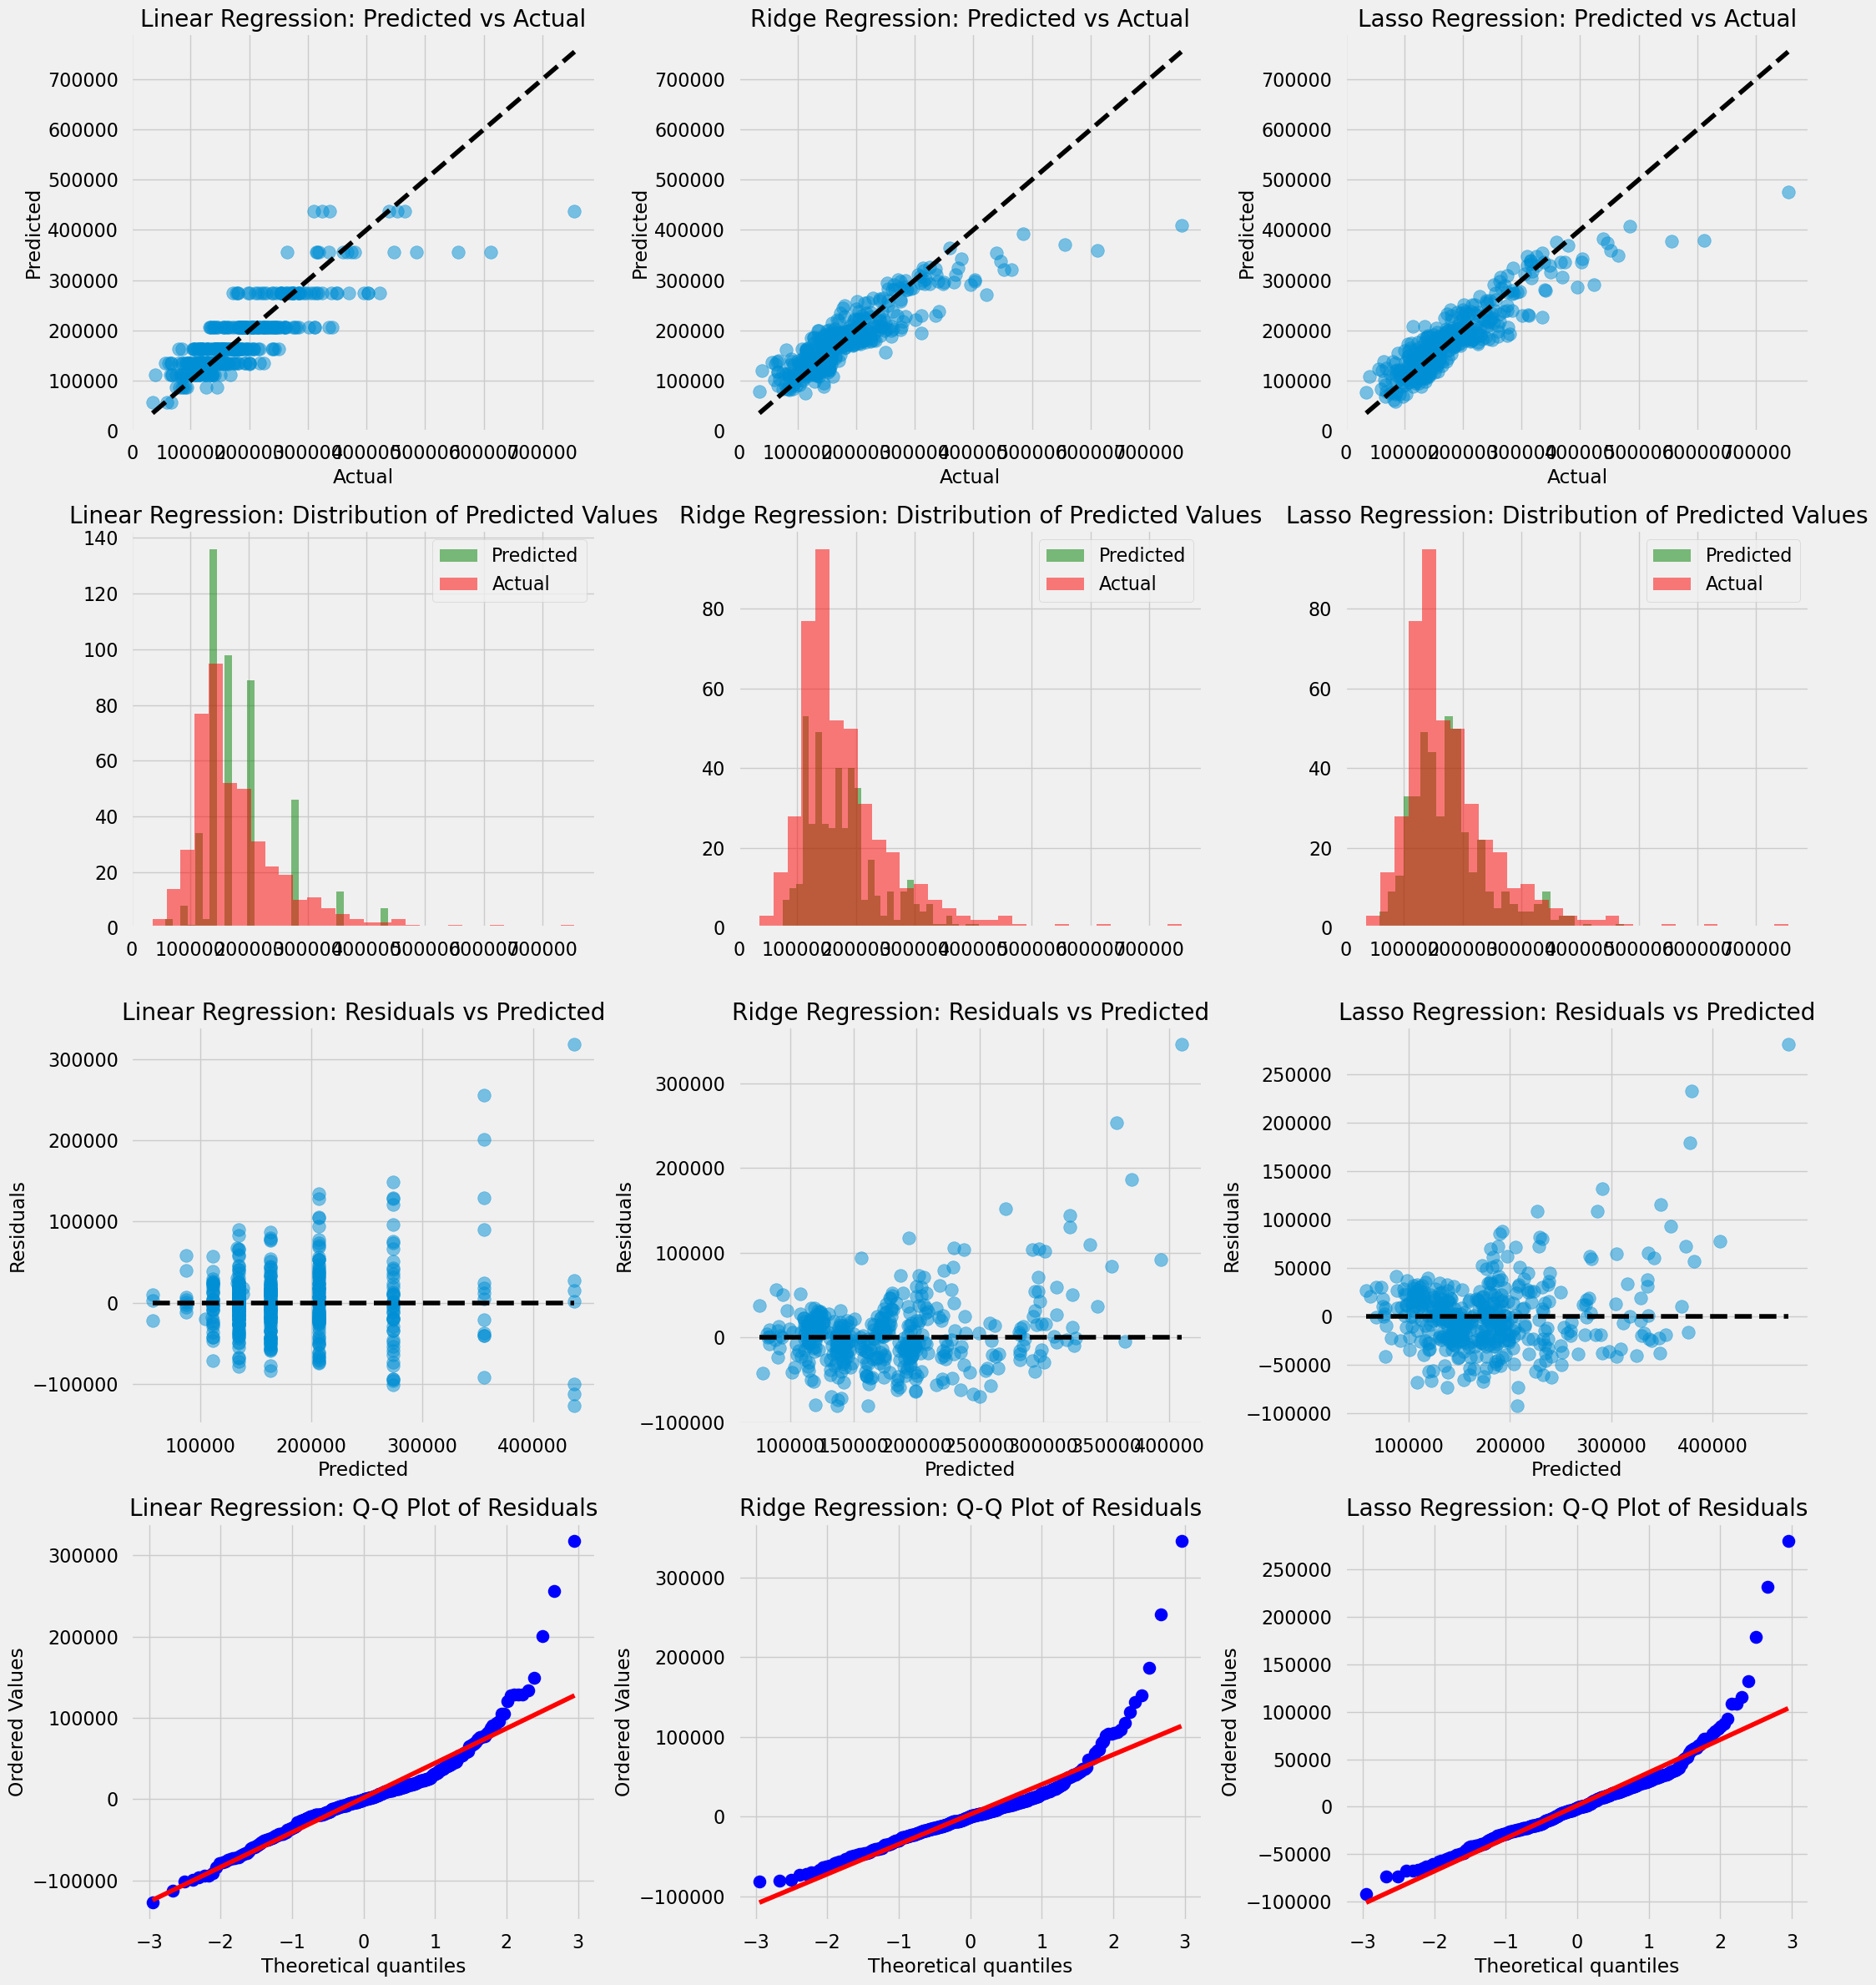

In [218]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(22, 24))

for idx, (name, pipeline) in enumerate(pipelines.items()):

    # Plotting regression line against actual data
    y_pred = pipeline.predict(X_test) #uses the current pipeline model to make predictions on the test set, and stores the predictions in y_pred
    axes[0, idx].scatter(y_test, y_pred, alpha=0.5)
    axes[0, idx].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    axes[0, idx].set_xlabel('Actual')
    axes[0, idx].set_ylabel('Predicted')
    axes[0, idx].set_title(f'{name} Regression: Predicted vs Actual')

    # Plotting the distribution of predicted values
    axes[1, idx].hist(y_pred, bins=30, alpha=0.5, color='g', label='Predicted')
    axes[1, idx].hist(y_test, bins=30, alpha=0.5, color='r', label='Actual')
    axes[1, idx].legend(loc='upper right')
    axes[1, idx].set_title(f'{name} Regression: Distribution of Predicted Values')

    # Plot of residuals vs predicted values
    residuals = y_test - y_pred
    axes[2, idx].scatter(y_pred, residuals, alpha=0.5)
    axes[2, idx].hlines(0, xmin=min(y_pred), xmax=max(y_pred), colors='k', linestyles='dashed')
    axes[2, idx].set_xlabel('Predicted')
    axes[2, idx].set_ylabel('Residuals')
    axes[2, idx].set_title(f'{name} Regression: Residuals vs Predicted')
    
    # QQ plot of residuals
    stats.probplot(residuals, dist="norm", plot=axes[3, idx])
    axes[3, idx].set_title(f'{name} Regression: Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

**The first row of plots visually presents the evaluation of the models' performance by comparing the predicted values with the actual values.** <br>
If the points cluster closely around the line, then the model's predictions are close to the actual values and the model is said to be performing well. Points scattered far from the line indicate large discrepancies between the predicted and actual values, suggesting poor model performing.

**The second row of plots visually presents the distribution of predicted values as a histogram to identify systematic bias in the models' prediction, not merely in terms of individual predictions but in terms of the overall distribution of values.** <br>
If the predicted and actual histograms align well, it suggests that the model is accurately capturing the underlying distribution of the target variable.
If the predicted distribution is skewed compared to the actual distribution, or if it fails to capture the shape of the actual distribution, then the model may be systematically over- or under-estimating the target variable. 


**The third row of plots presents the plot of residuals versus predicted values for assessment of the assumption of homoscedasticity.** <br>
Any point on the horizontal line at zero implies the prediction is exactly correct for that observation. If the residuals are randomly and evenly scattered around the horizontal line, the the assumption of homoscedasticity is validated. A pattern noted in the residuals is an indication of heteroscedasticity, which means the model's performance varies across the range of the predictor variable, suggesting that a linear model might not be the best fit for the data.


**The fourth row of plots presents the Q-Q plot of the residuals for checking whether the residuals are normally distributed.** <br>
If the residuals are normally distributed, the points on the Q-Q plot roughly lie along a straight diagonal line from the bottom left to the top right of the plot. 
Any substantial deviations from this straight line indicate departure from normality. This could be due to outliers in the data or the data might be heavy-tailed or light-tailed.
Points curving upwards away from the diagonal line suggest that the tails of the residual distribution are heavier than those of the normal distribution (the residuals have more large values than would be expected if they truly had an underlying normal distribution).
Points curving downwards towards the line suggest the tails are lighter than those of the normal distribution (there are fewer large residuals than we would expect if they truly had an underlying normal distribution).

# Advance Regression Problem Statement: Part 2

- Certain questions required compilation in this environment

### Question1: What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

The optimal alpha values for Ridge and Lasso were found to be 10 and 316.23, respectively.

The alpha parameter in Ridge and Lasso regressions is a regularization term that influences the size of the model's coefficients. Regularization helps prevent overfitting by adding a penalty term to the loss function that the model aims to minimize.

In Ridge regression (L2 regularization), this penalty term is the sum of the squares of the coefficients, scaled by alpha. Increasing alpha makes the penalty for large coefficients more significant, which discourages the model from assigning large weights to any single feature, thereby reducing the risk of overfitting. However, if alpha is too high, the model can become overly simplistic and underfit the data, resulting in higher bias.

In Lasso regression (L1 regularization), the penalty term is the sum of the absolute values of the coefficients, also scaled by alpha. Similar to Ridge, increasing alpha reduces overfitting. A unique aspect of Lasso is its ability to shrink some coefficients to exactly zero, effectively performing feature selection. With a high alpha, more coefficients may be eliminated, simplifying the model excessively and causing underfitting.

Generally, doubling the value of alpha for both Ridge and Lasso regression increases regularization, decreasing the likelihood of overfitting and typically resulting in smaller coefficients. In Lasso regression, this could mean some coefficients becoming zero, simplifying the model further. This increased regularization can make the model less sensitive to variations in individual features, which can be advantageous for robustness. However, if alpha is too high, the model may become overly simplistic, decreasing its predictive performance on both the training and test sets, leading to underfitting.

In [219]:
#What will be the most important predictor variables after the change is implemented?
#Since the best alpha for Ridge was 10 and for Lasso was 316.23, we will use 20 for Ridge and 632.46 for Lasso.

pd.set_option('display.max_rows', None)

alpha_ridge = 10 * 2
alpha_lasso = 316.23 *2 

models = {'Ridge': Ridge(alpha=alpha_ridge), 'Lasso': Lasso(alpha=alpha_lasso)}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Creating a DataFrame to store the model coefficients
    coef_df = pd.DataFrame()
    coef_df['Variable'] = X_train.columns  # Ensuring all features are included
    coef_df['Coefficient'] = model.coef_
    
    # Filtering the coefficients that are exactly zero (for Lasso)
    coef_df = coef_df[coef_df['Coefficient'] != 0]
    
    # Sorting the DataFrame by the absolute value of the coefficients
    coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)
    
    print(f'\n{name} Regression with alpha={model.alpha}')
    print('Most important predictors after doubling the alpha value:')
    print(coef_df)


Ridge Regression with alpha=20
Most important predictors after doubling the alpha value:
                  Variable   Coefficient
228        TotRmsAbvGrd_10  27833.546671
120          OverallQual_9  27166.736629
22              GarageCars  27038.462784
12                2ndFlrSF  26323.607518
121         OverallQual_10  25357.733328
77    Neighborhood_NoRidge  25320.548754
14               GrLivArea  25225.083723
21              Fireplaces  23708.329805
17                FullBath  23653.409088
188            BsmtQual_TA -20433.307276
84    Neighborhood_StoneBr  20383.507466
23              GarageArea  19612.633758
220         KitchenQual_TA -18703.732828
187            BsmtQual_Gd -18316.904381
11                1stFlrSF  17678.074732
192        BsmtExposure_Gd  17642.777892
78    Neighborhood_NridgHt  15967.245265
69    Neighborhood_Edwards -15501.046482
219         KitchenQual_Gd -15450.655079
116          OverallQual_5 -14877.477870
144    Exterior1st_BrkFace  14431.888447
115     

### Question 3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [220]:
'''In the Lasso Regression output, the five variables with the highest absolute coefficients are
GrLivArea: 198,576.09
OverallQual_10: 107,261.58
OverallQual_9: 106,321.40
GarageCars: 92,760.89
Fireplaces: 51,766.97

These predictors have the highest coefficients, indicating that they contribute the most 
to predicting the dependent variable in the model.'''


'''To determine the five most important predictor variables after excluding the previous ones, 
we would need to rerun the Lasso regression model with the remaining variables. '''

from sklearn.linear_model import LassoCV
# creating a list of the variables to be excluded
excluded_vars = ['GrLivArea', 'OverallQual_10', 'OverallQual_9', 'GarageCars', 'Fireplaces']

# creating a new DataFrame that does not include these variables
X_train_new = X_train.drop(excluded_vars, axis=1)
X_test_new = X_test.drop(excluded_vars, axis=1)

# creating a new Lasso model
lasso_new = LassoCV(cv=5, random_state=0)

# fitting the model
lasso_new.fit(X_train_new, y_train)

# obtaining the coefficients
coef_new = pd.Series(lasso_new.coef_, index = X_train_new.columns)

# printing the coefficients
print(coef_new.sort_values(ascending=False).head(5))

1stFlrSF                125924.638196
2ndFlrSF                 83108.233741
GarageArea               50829.213281
Neighborhood_NoRidge     40560.554650
Neighborhood_StoneBr     36733.618876
dtype: float64
